In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
# Load the data
file_path = '/content/drive/MyDrive/UC Berkeley MA AI /capstone_project/data/healthcare/train_data.csv'

df = pd.read_csv(file_path)  # Replace with your actual file path


In [ ]:
df.describe()

case_id  Hospital_code  City_Code_Hospital  \
count  318438.000000  318438.000000       318438.000000   
mean   159219.500000      18.318841            4.771717   
std     91925.276848       8.633755            3.102535   
min         1.000000       1.000000            1.000000   
25%     79610.250000      11.000000            2.000000   
50%    159219.500000      19.000000            5.000000   
75%    238828.750000      26.000000            7.000000   
max    318438.000000      32.000000           13.000000   

       Available Extra Rooms in Hospital      Bed Grade      patientid  \
count                      318438.000000  318438.000000  318438.000000   
mean                            3.197627       2.625940   65747.579472   
std                             1.168171       0.873019   37979.936440   
min                             0.000000       1.000000       1.000000   
25%                             2.000000       2.000000   32847.000000   
50%                             3.000000       3.000000   65724.500000   
75%                             4.000000       3.000000   98470.000000   
max                            24.000000       4.000000  131624.000000   

       City_Code_Patient  Visitors with Patient  Admission_Deposit  \
count      318438.000000          318438.000000      318438.000000   
mean            7.262506               3.284099        4880.749392   
std             4.712210               1.764061        1086.776254   
min             1.000000               0.000000        1800.000000   
25%             4.000000               2.000000        4186.000000   
50%             8.000000               3.000000        4741.000000   
75%             8.000000               4.000000        5409.000000   
max            38.000000              32.000000       11008.000000   

             Cluster   Stay_encoded  
count  318438.000000  318438.000000  
mean        1.175639       2.698550  
std         1.213161       2.150075  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         1.000000       2.000000  
75%         2.000000       3.000000  
max         3.000000      10.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [11]:

# Filling missing values for numerical columns with the median
df['Bed Grade'].fillna(df['Bed Grade'].median(), inplace=True)

# Filling missing values for categorical columns with the mode
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0], inplace=True)

In [ ]:
df.describe()

case_id  Hospital_code  City_Code_Hospital  \
count  318438.000000  318438.000000       318438.000000   
mean   159219.500000      18.318841            4.771717   
std     91925.276848       8.633755            3.102535   
min         1.000000       1.000000            1.000000   
25%     79610.250000      11.000000            2.000000   
50%    159219.500000      19.000000            5.000000   
75%    238828.750000      26.000000            7.000000   
max    318438.000000      32.000000           13.000000   

       Available Extra Rooms in Hospital      Bed Grade      patientid  \
count                      318438.000000  318438.000000  318438.000000   
mean                            3.197627       2.624520   65747.579472   
std                             1.168171       0.875658   37979.936440   
min                             0.000000      -1.000000       1.000000   
25%                             2.000000       2.000000   32847.000000   
50%                             3.000000       3.000000   65724.500000   
75%                             4.000000       3.000000   98470.000000   
max                            24.000000       4.000000  131624.000000   

       City_Code_Patient  Visitors with Patient  Admission_Deposit  
count      318438.000000          318438.000000      318438.000000  
mean            7.134419               3.284099        4880.749392  
std             4.811693               1.764061        1086.776254  
min            -1.000000               0.000000        1800.000000  
25%             4.000000               2.000000        4186.000000  
50%             8.000000               3.000000        4741.000000  
75%             8.000000               4.000000        5409.000000  
max            38.000000              32.000000       11008.000000

In [ ]:
import pandas as pd


# Identify categorical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness', 'Age']

# Identify numerical features
numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Verify the identified features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age']
Numerical Features: ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']


#### This code snippet is an example of how you would typically one hot encoding and label encoding

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# # One-Hot Encoding for categorical features
# one_hot_cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
#                 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
#                 'Severity of Illness', 'Hospital_code', 'City_Code_Patient']

# # Apply One-Hot Encoding
# one_hot_encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_cols])
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# # Drop original columns and concatenate one-hot encoded columns
# df = df.drop(one_hot_cols, axis=1)
# df = pd.concat([df, one_hot_encoded_df], axis=1)

# # Label Encoding for specific features
# label_cols = ['Age']

# label_encoder = LabelEncoder()
# for col in label_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# # Verify encoding
# print(df.head())

# from sklearn.preprocessing import StandardScaler

# # Apply StandardScaler only on numerical features
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Verify scaling
# print(df[numerical_features].head())



### Encoding Report

#### Label Encoding

| Feature   | Original Value | Encoded Value |
|-----------|----------------|---------------|
| **Bed Grade** | 1.0            | 0             |
|           | 2.0            | 1             |
|           | 3.0            | 2             |
|           | 4.0            | 3             |
|           | -1.0            | 4             |
| **Age**   | 0-10           | 0             |
|           | 11-20          | 1             |
|           | 21-30          | 2             |
|           | 31-40          | 3             |
|           | 41-50          | 4             |
|           | 51-60          | 5             |
|           | 61-70          | 6             |
|           | 71-80          | 7             |
|           | 81-90          | 8             |
|           | 91-100         | 9             |

#### One-Hot Encoding

| Feature                  | Categories                               |
|--------------------------|------------------------------------------|
| **Hospital_type_code**   | a, b, c, d, e, f, g                      |
| **City_Code_Hospital**   | 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13       |
| **Hospital_region_code** | X, Y, Z                                  |
| **Department**           | TB & Chest disease, anesthesia, gynecology, radiotherapy, surgery |
| **Ward_Type**            | P, Q, R, S, T, U                         |
| **Ward_Facility_Code**   | A, B, C, D, E, F                         |
| **Type of Admission**    | Emergency, Trauma, Urgent                |
| **Severity of Illness**  | Extreme, Minor, Moderate                 |
| **Hospital_code**        | 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32 |
| **City_Code_Patient**    | 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, -1.0 |

#### Detailed Encoding Report

| Type of Encoding | Feature   | Categories/Values                                                                                                                                                                                                                     |
|------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Label Encoding   | Bed Grade | {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, -1.0: 4}                                                                                                                                                                                             |
|                  | Age       | {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}                                                                                                                |
| One-Hot Encoding | Hospital_type_code   | ['a', 'b', 'c', 'd', 'e', 'f', 'g']                                                                                                                                                                                    |
|                  | City_Code_Hospital   | [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13]                                                                                                                                                                                   |
|                  | Hospital_region_code | ['X', 'Y', 'Z']                                                                                                                                                                                                         |
|                  | Department           | ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery']                                                                                                                                             |
|                  | Ward_Type            | ['P', 'Q', 'R', 'S', 'T', 'U']                                                                                                                                                                                          |
|                  | Ward_Facility_Code   | ['A', 'B', 'C', 'D', 'E', 'F']                                                                                                                                                                                          |
|                  | Type of Admission    | ['Emergency', 'Trauma', 'Urgent']                                                                                                                                                                                       |
|                  | Severity of Illness  | ['Extreme', 'Minor', 'Moderate']                                                                                                                                                                                        |
|                  | Hospital_code        | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]                                                                                                   |
|                  | City_Code_Patient    | [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, -1.0] |

This markdown report provides a clear reference to interpret the encoded features in your dataset. Let me know if you need further assistance or specific insights!

# EDA

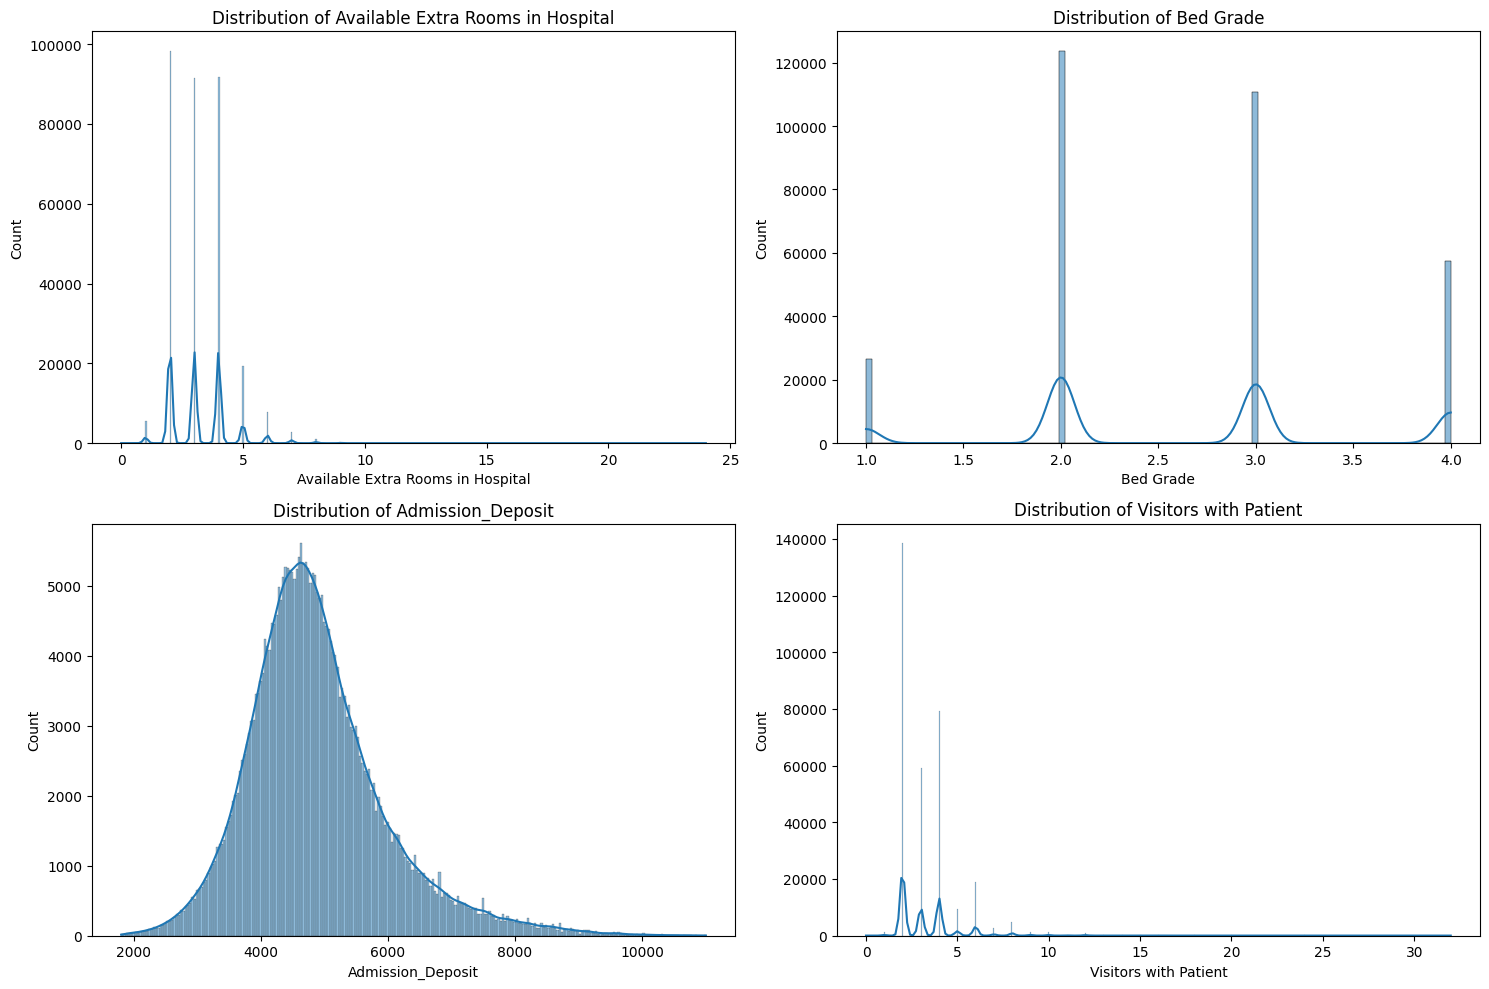

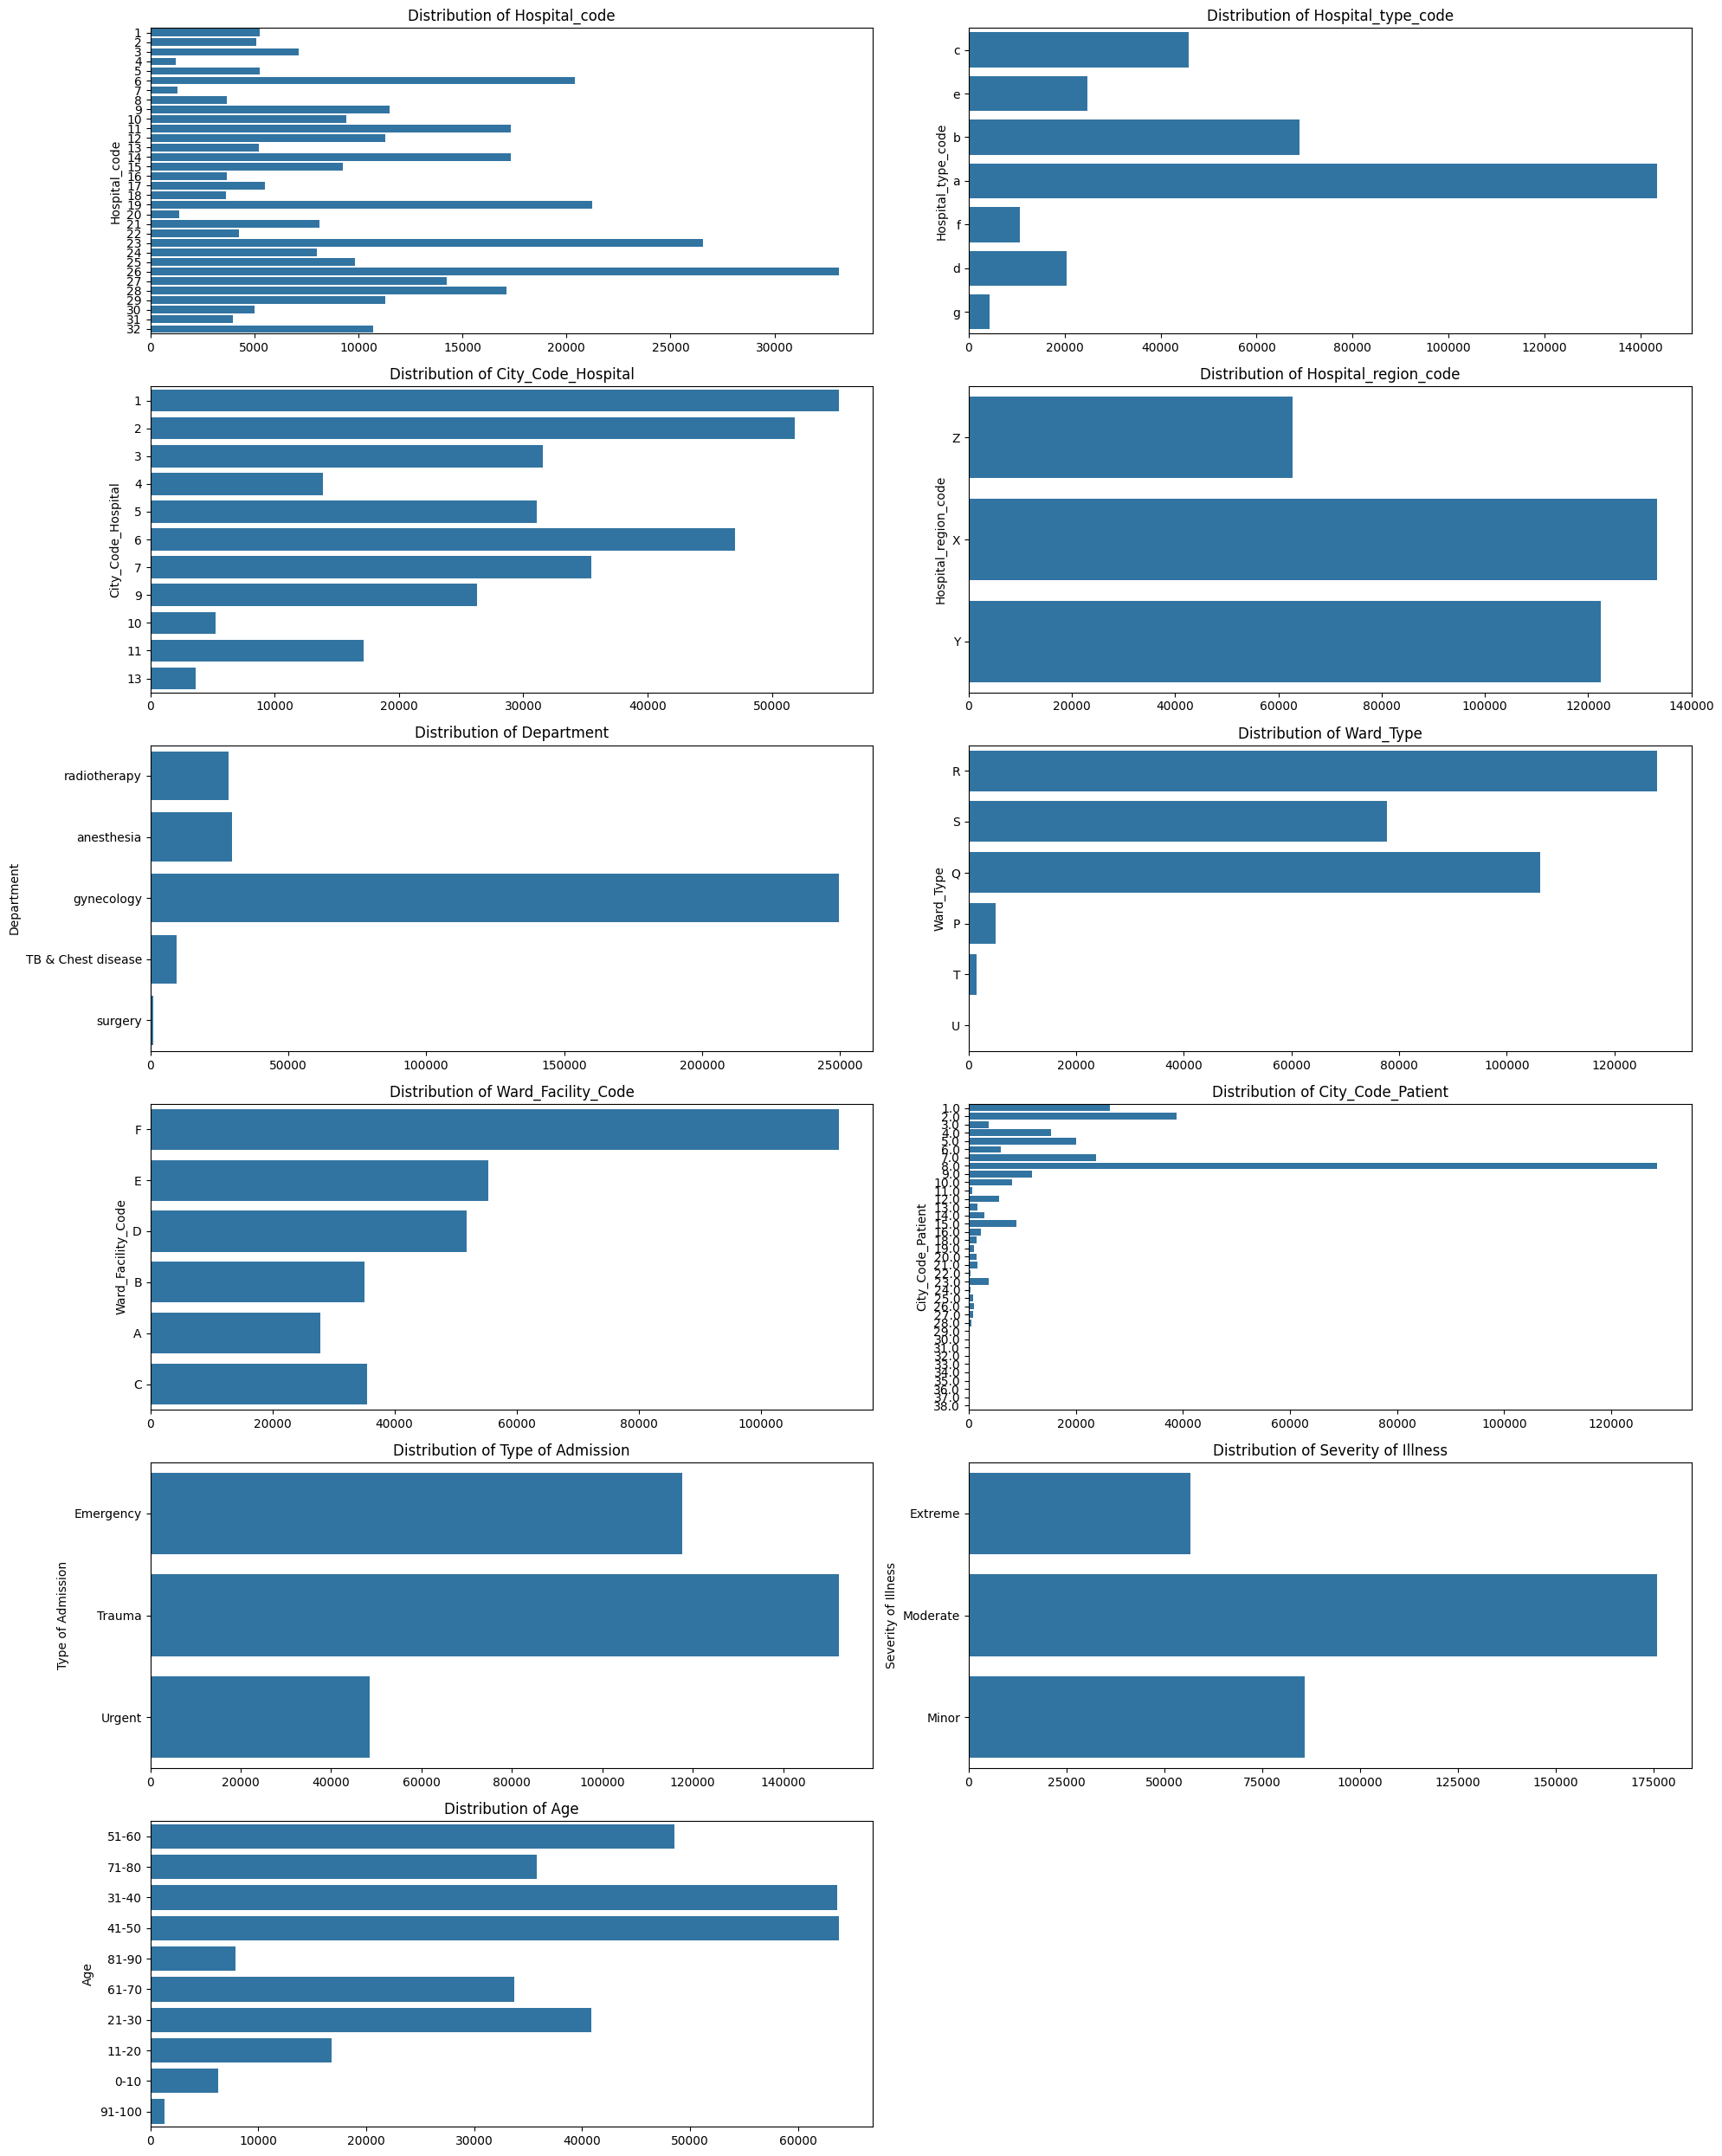

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features as provided
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness', 'Age']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plotting distributions of categorical features
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(6, 2, i)
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Correlation Analysis for numerical features
corr_matrix = df[numerical_features].corr()


### Distribution Analysis for Numerical Features

The histograms for the numerical features show the following:

- **Available Extra Rooms in Hospital**:
  - The distribution is right-skewed with a peak around 2-4 rooms. There are a few outliers with significantly more rooms.

- **Bed Grade**:
  - The distribution is fairly even, with most grades being 2 or 3. There are fewer hospitals with grade 1 or 4 beds.

- **Admission_Deposit**:
  - The distribution is right-skewed with most values between 4000 and 6000. There are a few higher deposit amounts.

- **Visitors with Patient**:
  - The distribution shows that most patients have around 2-4 visitors, with a few extreme cases having more than 10 visitors.

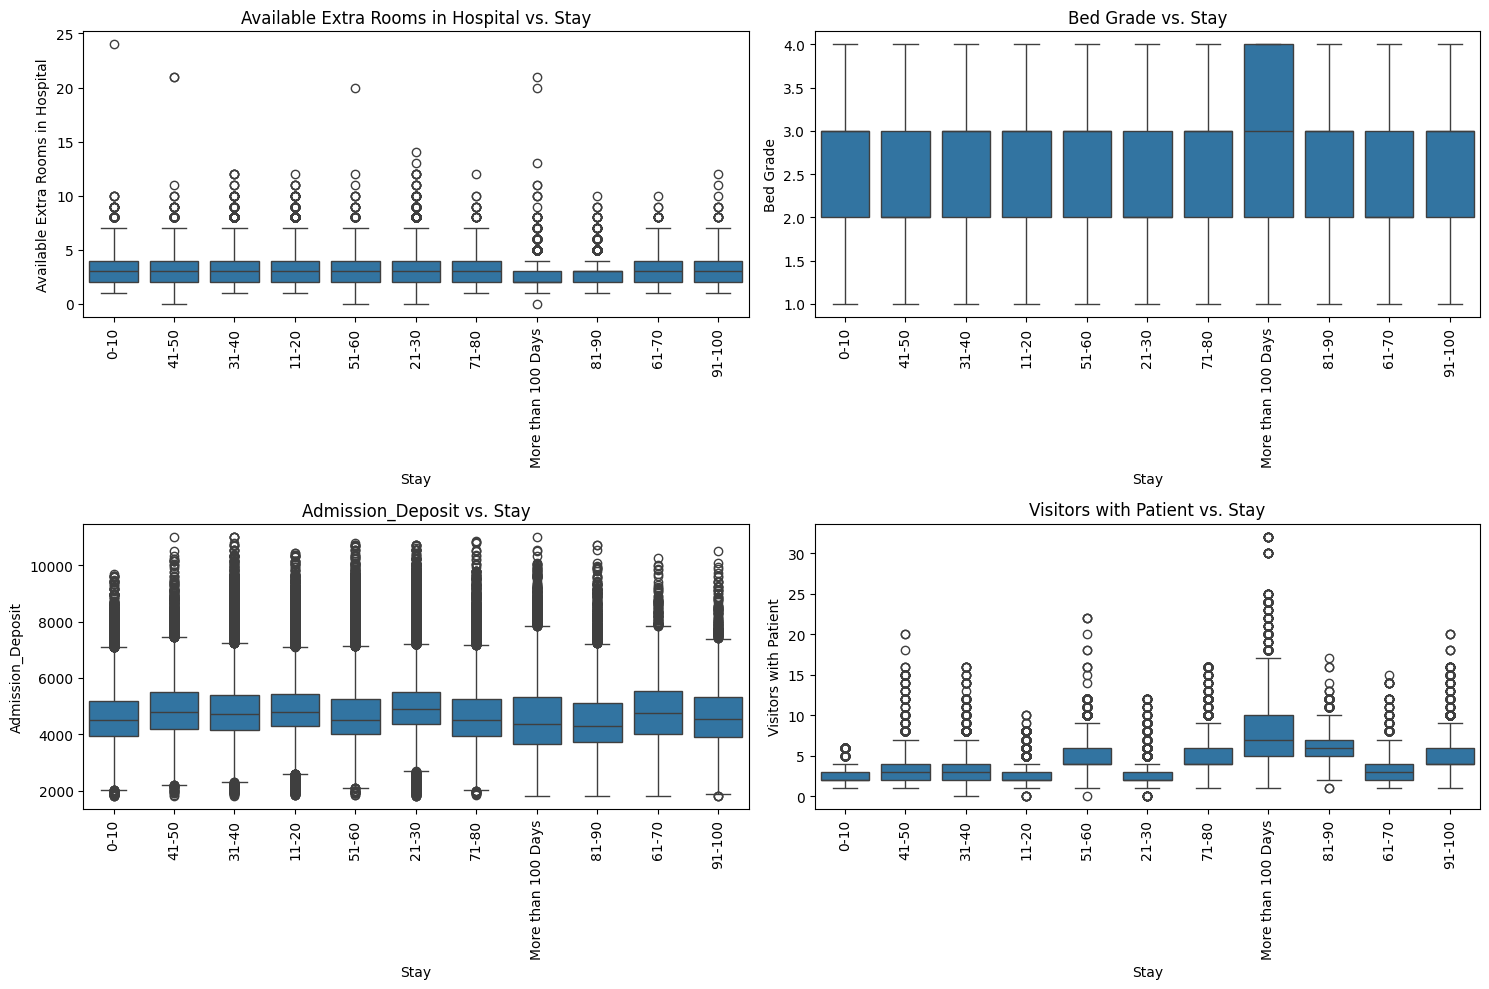

In [ ]:
# Plotting box plots for numerical features vs. Stay
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Stay', y=col, data=df)
    plt.title(f'{col} vs. Stay')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Box Plots for Numerical Features vs. Stay


### Relationships Between Numerical Features and the Target Variable 'Stay'

The box plots show the relationships between numerical features and the target variable 'Stay':

- **Available Extra Rooms in Hospital**:
  - There is no clear trend between the number of available extra rooms and the length of stay. The median number of extra rooms remains consistent across different stay durations.

- **Bed Grade**:
  - Bed grade distributions are relatively consistent across different stay durations, with no significant differences observed.

- **Admission_Deposit**:
  - Higher admission deposits tend to be associated with longer stays. Patients with 'More than 100 Days' stay have a higher median deposit compared to shorter stays.

- **Visitors with Patient**:
  - The number of visitors with the patient tends to increase with longer stays, particularly for 'More than 100 Days' stays, where the median number of visitors is higher.

### Summary

The EDA reveals important insights into the distribution and relationships of numerical and categorical features with the target variable 'Stay'. These insights can guide further analysis and modeling efforts:

- Numerical features like admission deposits and visitors with patients show trends with stay duration.
- Categorical features such as hospital code, department, and severity of illness significantly influence stay duration.

### Group Statistics Analysis

In [ ]:
# Group-wise statistics for numerical features based on the target variable 'Stay'
grouped_stats = df.groupby('Stay')[numerical_features].mean().reset_index()
grouped_stats


Stay  Available Extra Rooms in Hospital  Bed Grade  \
0                 0-10                           3.268599   2.583545   
1                11-20                           3.262814   2.731786   
2                21-30                           3.359008   2.496097   
3                31-40                           3.136242   2.662974   
4                41-50                           3.334412   2.539215   
5                51-60                           2.911731   2.611000   
6                61-70                           3.179300   2.559402   
7                71-80                           2.872733   2.654671   
8                81-90                           2.844977   2.841670   
9               91-100                           2.854611   2.661844   
10  More than 100 Days                           2.739638   2.907527   

    Admission_Deposit  Visitors with Patient  
0         4615.214625               2.565158  
1         4931.124829               2.738940  
2         5025.310329               2.679487  
3         4871.071067               3.453797  
4         4888.818530               3.032785  
5         4748.784397               4.390828  
6         4845.449344               3.566691  
7         4709.845426               4.892335  
8         4590.644688               6.100661  
9         4715.538879               5.315732  
10        4649.341763               7.891516

#### Group-wise Statistics for Numerical Features


### Group-wise Statistics for Numerical Features Based on 'Stay'

The group-wise statistics for numerical features provide insights into how these features vary with the duration of stay:

- **Available Extra Rooms in Hospital**:
  - Patients with shorter stays (0-10 days) have a higher average of extra rooms available compared to those with longer stays (more than 100 days).

- **Bed Grade**:
  - Patients with stays of 81-90 days and 'More than 100 Days' tend to have higher average bed grades.

- **Admission_Deposit**:
  - Admission deposits generally increase with the length of stay, peaking around 21-30 days.

- **Visitors with Patient**:
  - The number of visitors increases significantly with the length of stay. Patients with 'More than 100 Days' have the highest average number of visitors.


### Heatmap Categorical Analysis

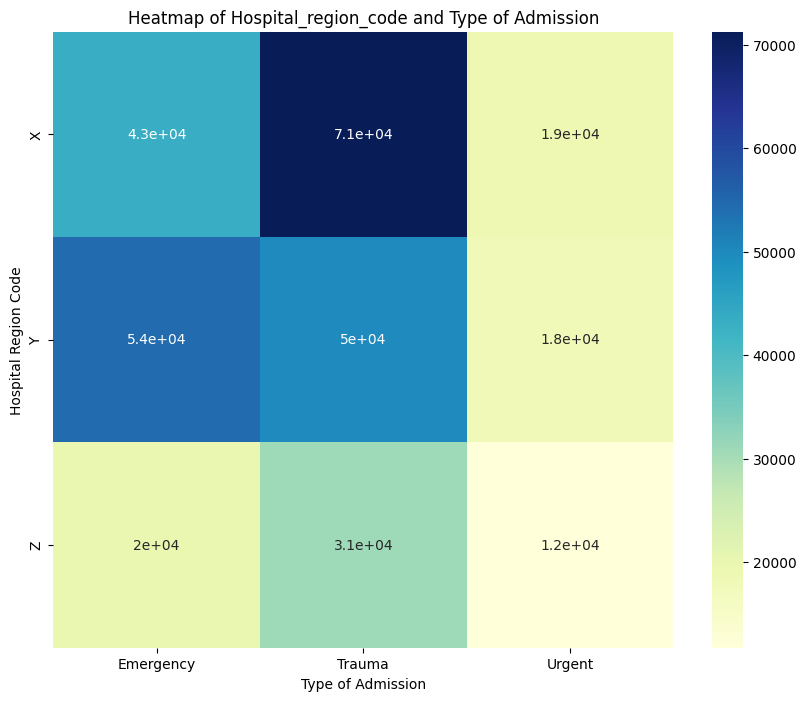

In [ ]:
# Creating a crosstab of categorical features and visualizing with a heatmap
categorical_pairs = pd.crosstab(df['Hospital_region_code'], df['Type of Admission'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Hospital_region_code and Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Hospital Region Code')
plt.show()



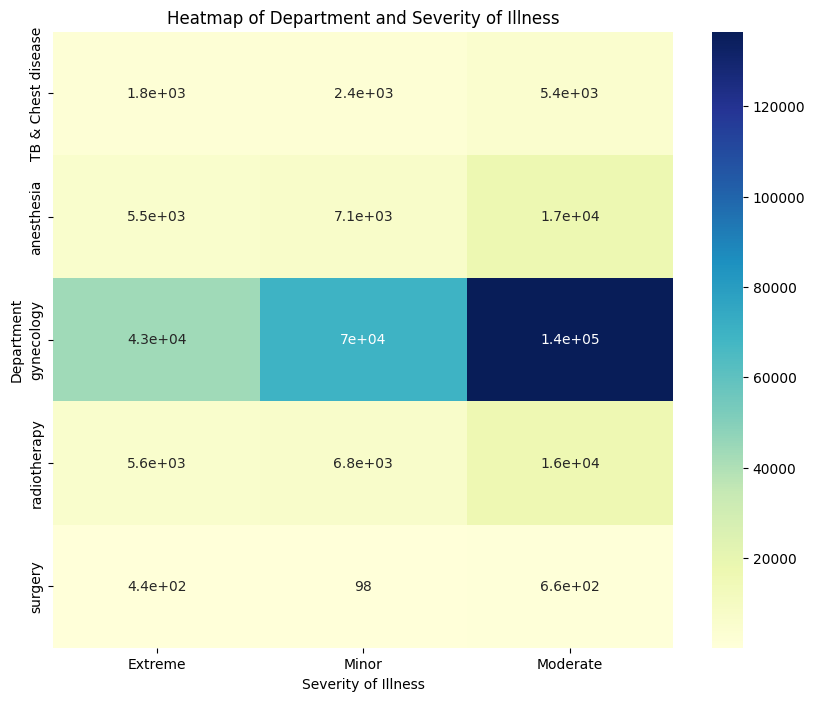

In [ ]:

# Another heatmap for 'Department' and 'Severity of Illness'
categorical_pairs = pd.crosstab(df['Department'], df['Severity of Illness'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Department and Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Department')
plt.show()

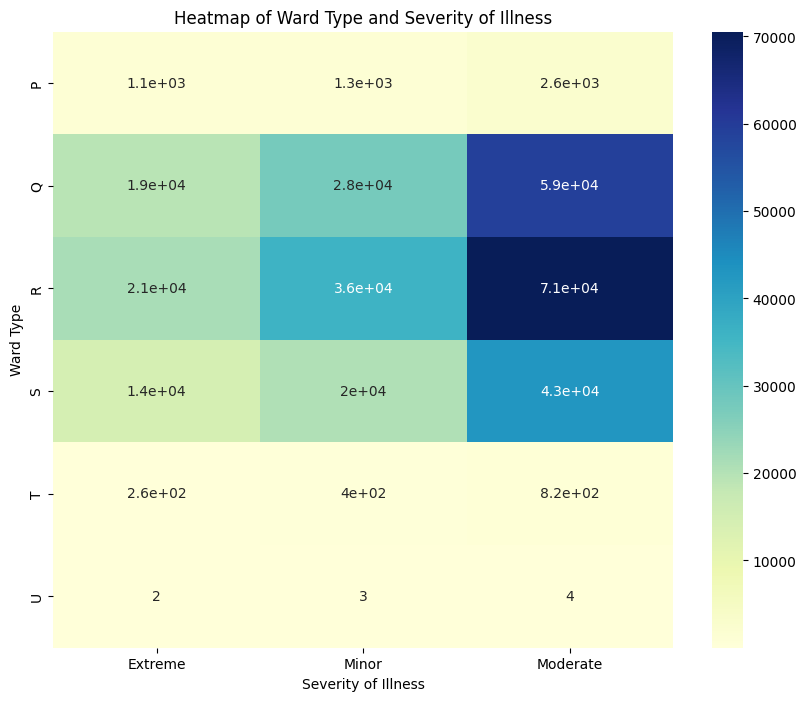

In [ ]:
categorical_pairs = pd.crosstab(df['Ward_Type'], df['Severity of Illness'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Ward Type and Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Ward Type')
plt.show()


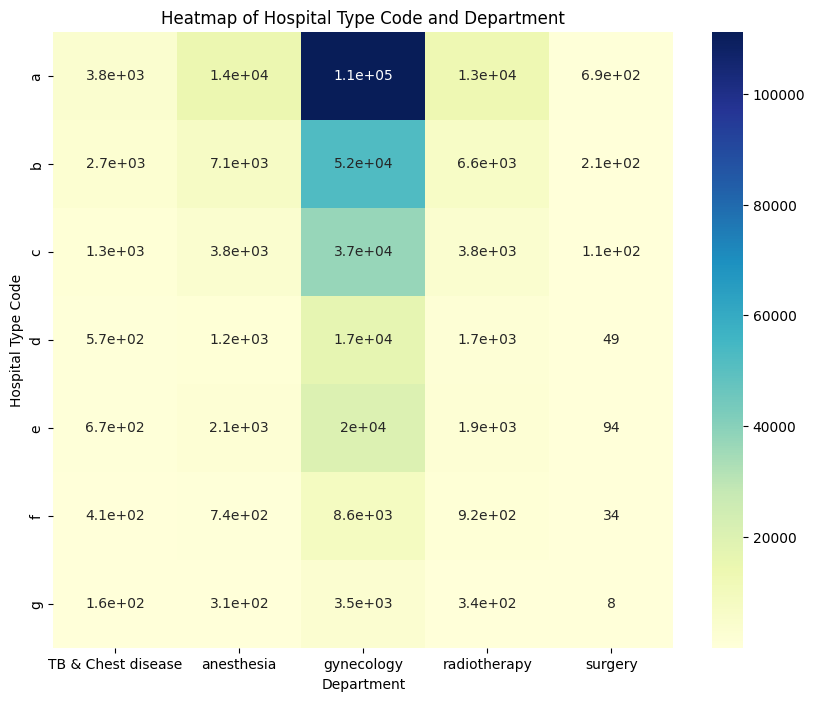

In [ ]:
categorical_pairs = pd.crosstab(df['Hospital_type_code'], df['Department'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Hospital Type Code and Department')
plt.xlabel('Department')
plt.ylabel('Hospital Type Code')
plt.show()


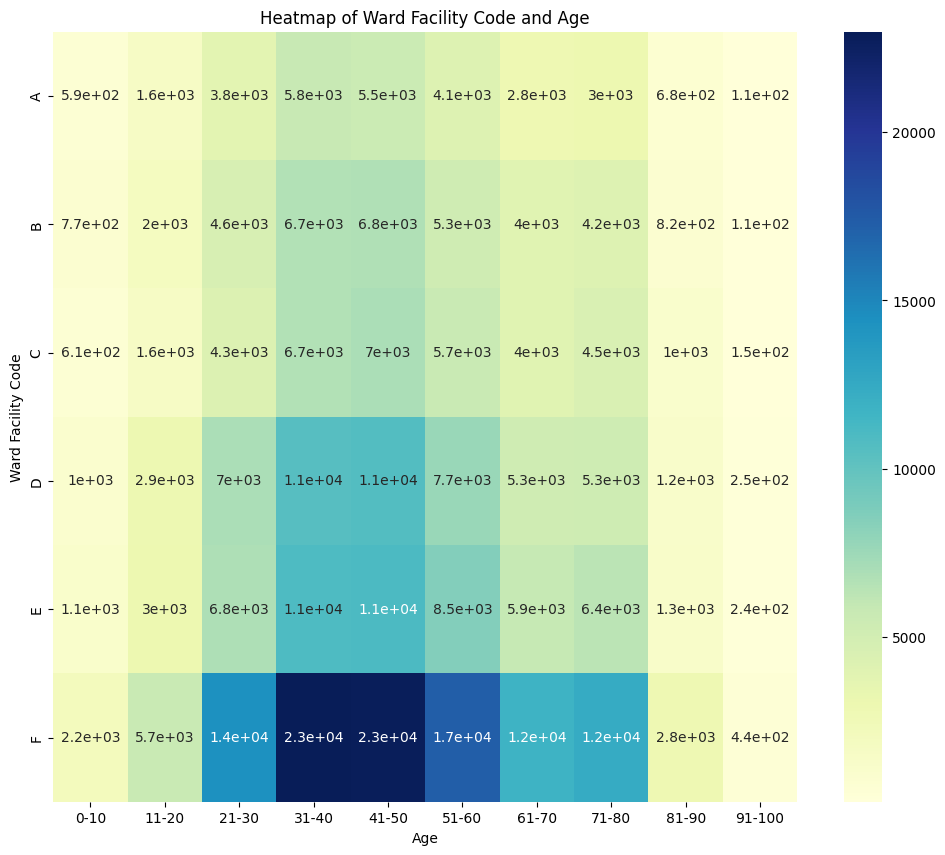

In [ ]:
categorical_pairs = pd.crosstab(df['Ward_Facility_Code'], df['Age'])
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Ward Facility Code and Age')
plt.xlabel('Age')
plt.ylabel('Ward Facility Code')
plt.show()


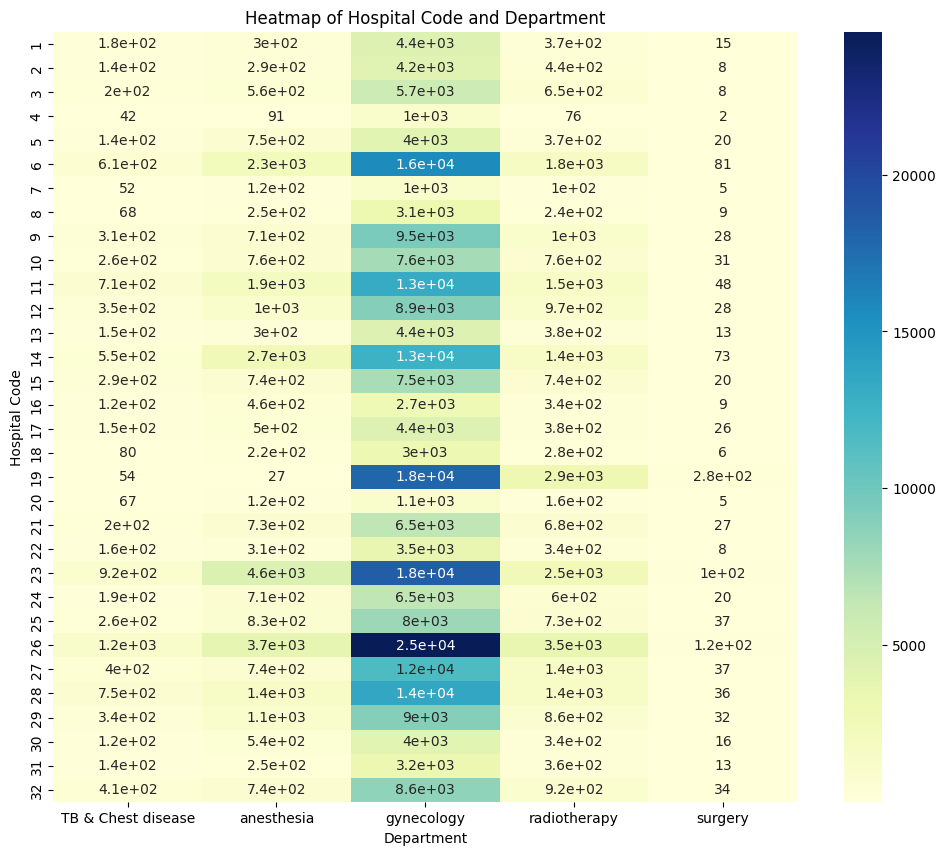

In [ ]:
categorical_pairs = pd.crosstab(df['Hospital_code'], df['Department'])
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Hospital Code and Department')
plt.xlabel('Department')
plt.ylabel('Hospital Code')
plt.show()


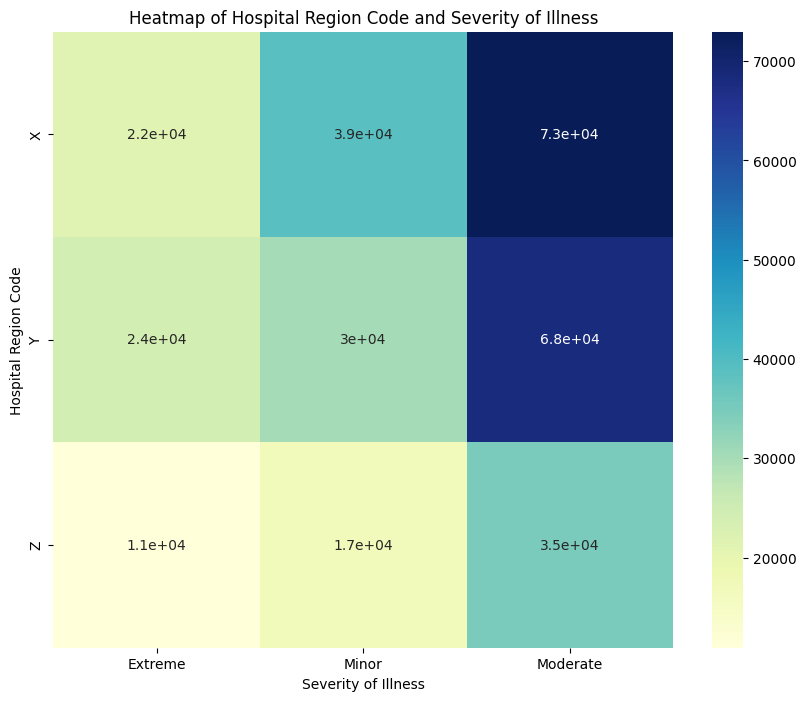

In [ ]:
categorical_pairs = pd.crosstab(df['Hospital_region_code'], df['Severity of Illness'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Hospital Region Code and Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Hospital Region Code')
plt.show()


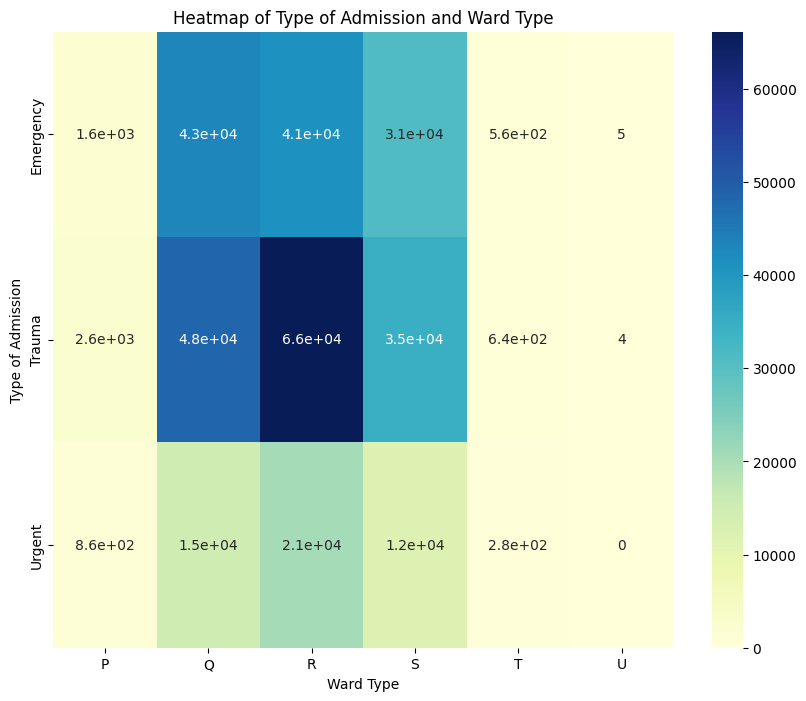

In [ ]:
categorical_pairs = pd.crosstab(df['Type of Admission'], df['Ward_Type'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Type of Admission and Ward Type')
plt.xlabel('Ward Type')
plt.ylabel('Type of Admission')
plt.show()


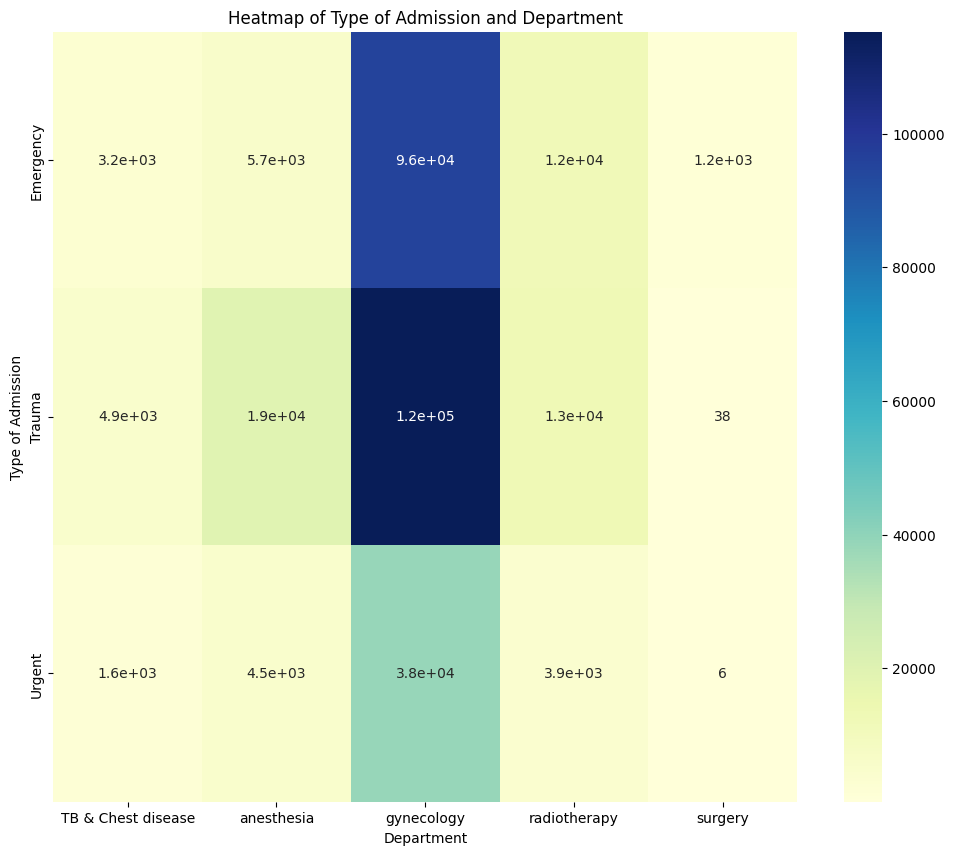

In [ ]:
categorical_pairs = pd.crosstab(df['Type of Admission'], df['Department'])
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Type of Admission and Department')
plt.xlabel('Department')
plt.ylabel('Type of Admission')
plt.show()


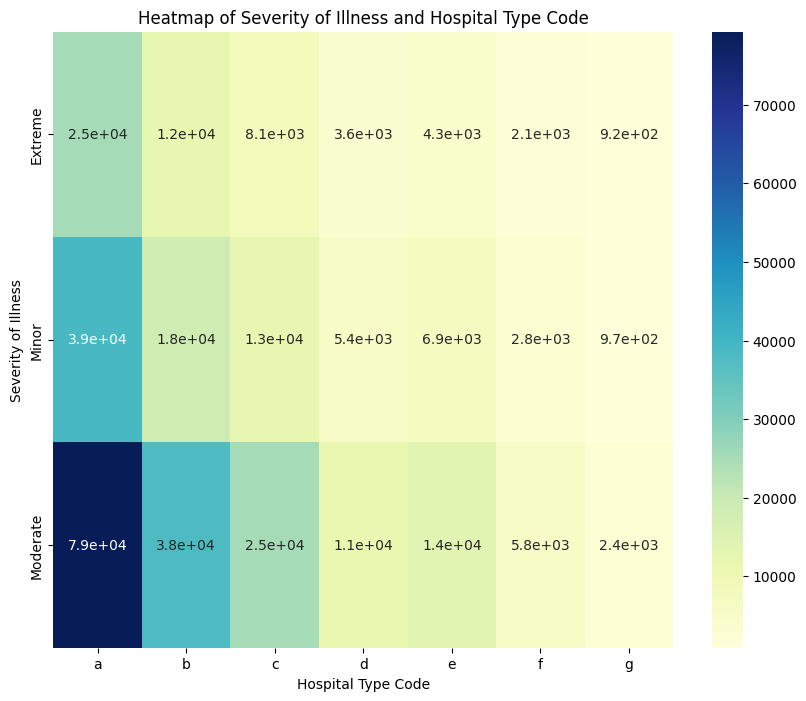

In [ ]:
categorical_pairs = pd.crosstab(df['Severity of Illness'], df['Hospital_type_code'])
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Severity of Illness and Hospital Type Code')
plt.xlabel('Hospital Type Code')
plt.ylabel('Severity of Illness')
plt.show()


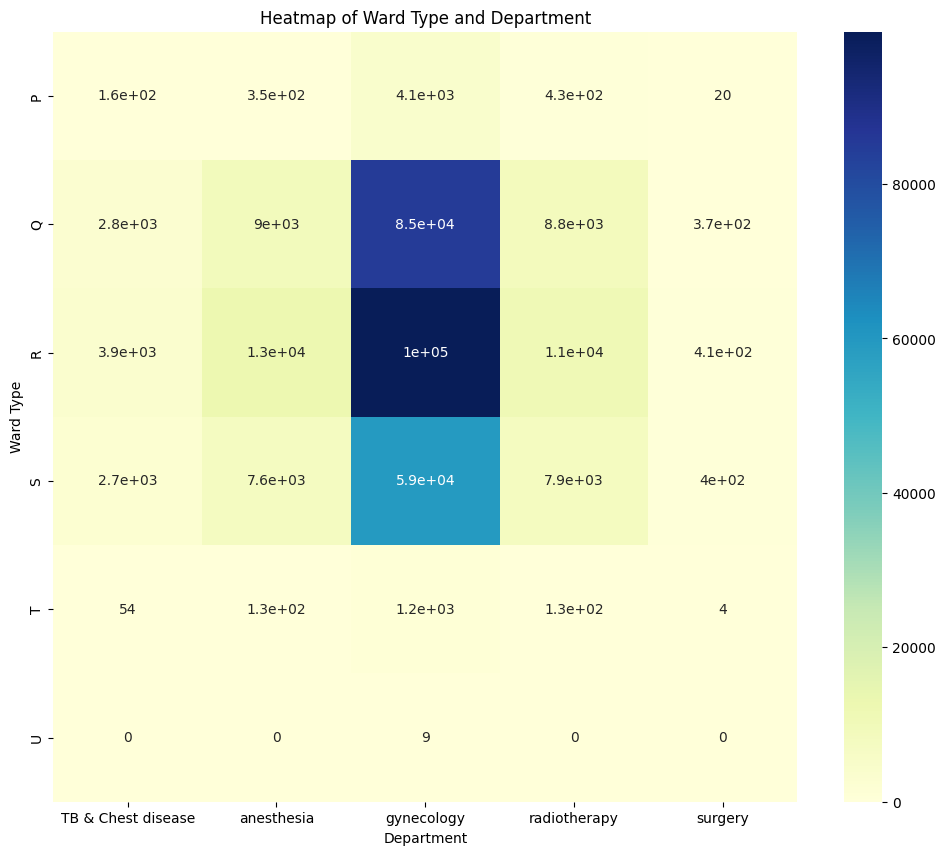

In [ ]:
categorical_pairs = pd.crosstab(df['Ward_Type'], df['Department'])
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_pairs, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Ward Type and Department')
plt.xlabel('Department')
plt.ylabel('Ward Type')
plt.show()


### Conclusion Summary

#### Valuable Insights

1. **Regional and Admission Insights**
   - **Region X**: Highest trauma admissions, indicating potential for higher accident rates or superior trauma facilities.
   - **Region Y**: Balanced emergency and trauma cases, suggesting varied demographics or multiple specialties.
   - **Region Z**: Least trauma cases, possibly due to fewer incidents or limited trauma care.

2. **Department and Severity of Illness Insights**
   - **Gynecology**: Manages many moderate severity patients, indicating complex but non-critical cases.
   - **Anesthesia and Radiotherapy**: Handle many minor cases, reflecting routine procedures.
   - **Surgery**: Fewer patients, likely focusing on specialized or critical operations.

3. **Ward Type and Severity of Illness Insights**
   - **Wards Q and R**: Manage most moderate severity patients, focusing on complex but stable conditions.
   - **Ward S**: Versatile, handling both minor and moderate cases.
   - **Wards T and U**: Few patients, indicating specialization or underutilization.

4. **Hospital Type and Department Insights**
   - **Hospital type 'a'**: Many gynecology patients, indicating a focus on this specialty.
   - **Type 'b'**: Diverse capabilities in gynecology and anesthesia.
   - **Other types**: Smaller or specialized facilities.

5. **Ward Facility and Age Insights**
   - **Ward facility F**: Handles many patients aged 21-50, likely due to specialized treatments.
   - **Other wards**: Evenly distributed ages, providing general or multi-specialty care.

6. **Hospital Code and Department Insights**
   - **Hospitals 13 and 25**: Specialize in gynecology, others offer balanced services across departments.

7. **Hospital Region and Severity of Illness Insights**
   - **Regions X and Y**: Handle many moderate severity cases, likely due to better facilities or more hospitals.
   - **Region Z**: Fewer patients, possibly due to fewer facilities or lower population density.

8. **Type of Admission and Ward Type Insights**
   - **Wards Q and R**: Specialize in trauma and emergency admissions, indicating specialized resources and staff.
   - **Urgent cases**: Evenly distributed, managed flexibly.

9. **Type of Admission and Department Insights**
   - **Gynecology**: Handles significant trauma cases, indicating a role in urgent and complex care.
   - **Anesthesia**: Manages many emergency cases due to urgent surgeries.

10. **Severity of Illness and Hospital Type Insights**
    - **Hospital type 'a'**: Focuses on moderate severity cases.
    - **Types 'b' and 'c'**: Offer versatile healthcare across severity levels.

11. **Ward Type and Department Insights**
    - **Wards R and Q**: Focus on gynecology and anesthesia.
    - **Ward S**: Versatile, handling diverse medical needs.
    - **Wards P, T, U**: Potentially specialized or less critical roles in patient management.

### Recommendations
- **Resource Allocation**: Focus on high-demand wards (R, Q) and evaluate underutilized wards (P, T, U) for potential repurposing.
- **Specialized Care**: Enhance trauma and emergency care in high-demand regions (X, Y).
- **Department Focus**: Prioritize resources in gynecology and anesthesia, particularly in hospitals with high patient volumes.
- **Age-Specific Care**: Develop specialized programs for working-age adults in ward facility F.

These insights can guide strategic decisions to optimize hospital operations, improve patient care, and enhance resource management.

### Clustering Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np

# Define preprocessing for numerical and categorical data
numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient',
                        'Type of Admission', 'Severity of Illness', 'Age']

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
data_preprocessed = preprocessor.fit_transform(df)

# Check the shape of the preprocessed data
data_preprocessed.shape


(318438, 128)

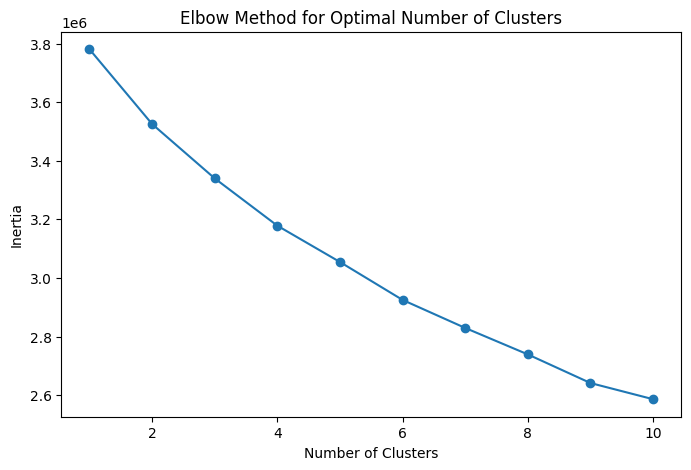

In [ ]:
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
def elbow_method(data, max_clusters=10):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init='auto')
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

# Compute the inertia for different numbers of clusters
inertia = elbow_method(data_preprocessed, max_clusters=10)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


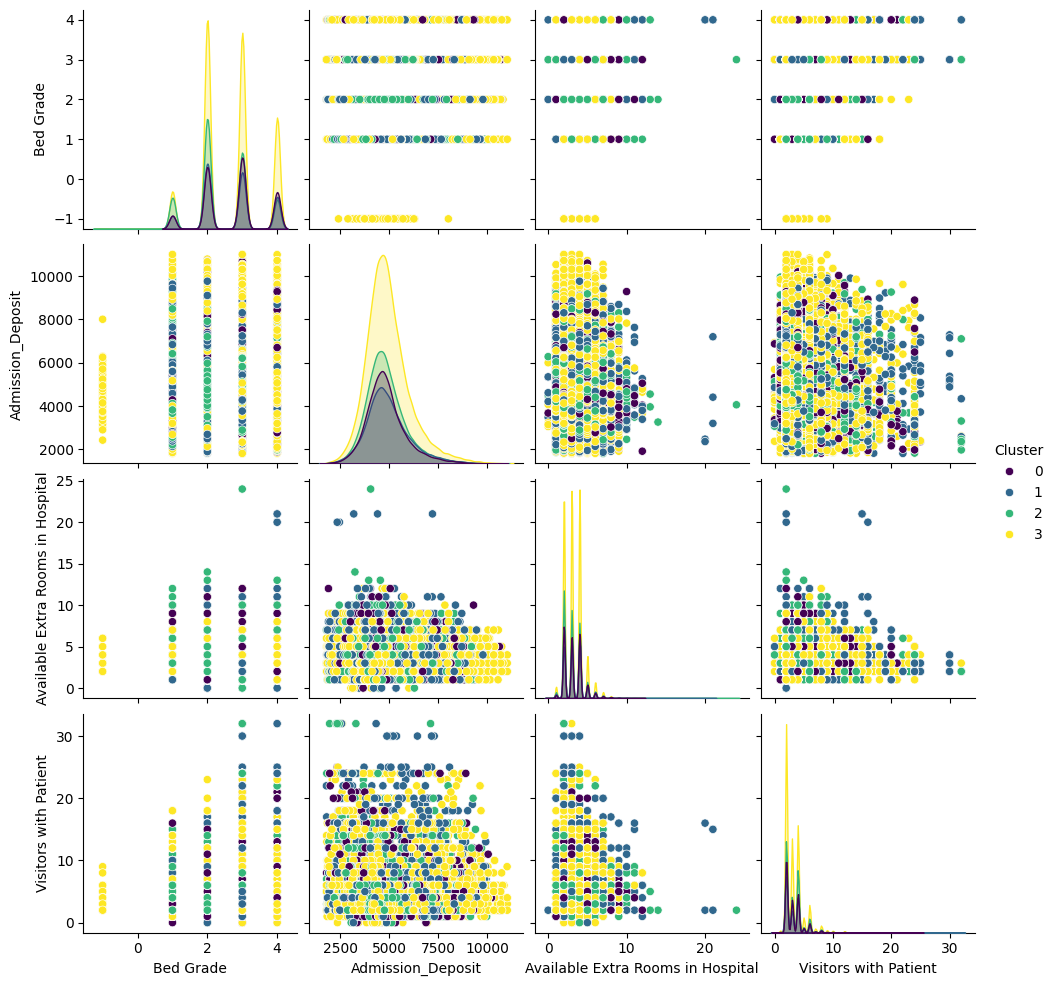

In [ ]:
# Drop 'case_id' and 'patientid' for clustering
data_for_clustering = df.drop(columns=['case_id', 'patientid', 'Stay'])
data_for_clustering = pd.get_dummies(data_for_clustering, drop_first=True)

# Handle missing values before scaling
imputer = SimpleImputer(strategy='median')
data_for_clustering_imputed = pd.DataFrame(imputer.fit_transform(data_for_clustering), columns=data_for_clustering.columns)

# Standardize the numerical features
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_for_clustering_scaled)

# Evaluate cluster characteristics
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=data_for_clustering.columns)

# Adding cluster information to the original data
df['Cluster'] = kmeans.labels_

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_characteristics_numeric = df.groupby('Cluster')[numeric_columns].mean()

# Visualize clusters with pair plot (limited features for better visualization)
numerical_features = ['Bed Grade', 'Admission_Deposit', 'Available Extra Rooms in Hospital', 'Visitors with Patient']
sns.pairplot(df, vars=numerical_features, hue='Cluster', palette='viridis')
plt.show()



In [ ]:


# Select relevant numerical columns for clustering characteristics
numeric_columns = ['Bed Grade', 'Admission_Deposit', 'Available Extra Rooms in Hospital', 'Visitors with Patient']

# Calculate the mean characteristics for each cluster
cluster_characteristics = df.groupby('Cluster')[numeric_columns].mean()


# Show the table in the output
cluster_characteristics


Bed Grade  Admission_Deposit  Available Extra Rooms in Hospital  \
Cluster                                                                    
0         2.718777        4822.332569                           3.191379   
1         2.643691        4915.111255                           3.326893   
2         2.418740        4814.594104                           3.076863   
3         2.683682        4924.294393                           3.213104   

         Visitors with Patient  
Cluster                         
0                     3.207386  
1                     3.353973  
2                     3.309846  
3                     3.275624

### Conclusion from Clustering Analysis Insights

Based on the detailed analysis and interpretation of the cluster characteristics and pairplot visualization, the following conclusions can be drawn:

#### 1. **Operational Efficiency and Resource Utilization:**
   - **Cluster 0** appears to be well-balanced with high bed grades, moderate admission deposits, moderate extra room availability, and consistent visitor numbers. This indicates efficient resource utilization and consistent operational practices, making it a benchmark for other clusters.
   - **Cluster 1** shows the highest admission deposits, highest extra room availability, and highest visitor numbers. This suggests that Cluster 1 hospitals have high capacity and cater to more expensive care needs, but this comes at a higher cost.
   - **Cluster 2** has the lowest bed grades and lowest extra room availability, indicating older or less-equipped facilities with higher occupancy rates. Improving bed grades and increasing extra room availability could enhance operational efficiency in this cluster.
   - **Cluster 3** exhibits high variability across all features, indicating diverse operational practices and patient demographics. Standardizing operational practices could reduce variability and improve overall efficiency and patient outcomes in this cluster.

#### 2. **Patient Demographics and Care Needs:**
   - **Cluster 1** and **Cluster 3** hospitals have higher admission deposits, suggesting they might be in regions with higher healthcare costs or cater to patients requiring more expensive care.
   - The consistent visitor numbers across clusters indicate that patient demographics and visitor policies are similar, which can be leveraged to design uniform visitor support services.

#### 3. **Service Quality and Capacity Management:**
   - The high bed grades in **Cluster 0** and **Cluster 1** suggest better-equipped facilities, potentially leading to better patient outcomes. Other clusters can aim to improve bed grades to match this standard.
   - Clusters with higher extra room availability (Cluster 1) indicate better capacity management. Clusters with lower availability (Cluster 2) need to focus on increasing hospital capacity to manage patient flow better.

#### 4. **Cost Structure and Affordability:**
   - The variation in admission deposits across clusters indicates differing cost structures. Clusters with higher costs (Cluster 1 and Cluster 3) might need to explore ways to optimize costs without compromising care quality, while clusters with lower costs (Cluster 0 and Cluster 2) can maintain affordability while improving facilities.

### Recommendations for Improvement:

1. **Standardize Operational Practices in Cluster 3**:
   - Implement consistent operational practices to reduce variability in bed grades, admission deposits, and visitor policies.
   - Improve infrastructure and facilities to match the standards seen in Cluster 0.

2. **Enhance Facilities in Cluster 2**:
   - Invest in upgrading bed grades and increasing the number of extra rooms to improve hospital capacity and patient care quality.
   - Focus on cost-effective strategies to balance affordability with improved services.

3. **Optimize Resource Utilization in Cluster 1**:
   - While Cluster 1 is well-equipped, focus on cost optimization to make care more affordable without reducing the quality of services.
   - Enhance patient care programs to leverage the high visitor support observed in this cluster.

4. **Maintain Balanced Practices in Cluster 0**:
   - Continue the balanced approach in Cluster 0, using it as a benchmark for other clusters.
   - Explore innovative practices and technologies to further improve efficiency and patient outcomes.

### Final Thoughts:

By leveraging these insights, healthcare management can tailor strategies to each cluster's unique characteristics, enhancing operational efficiency, patient care quality, and overall hospital performance. Focused improvements in specific areas, such as standardizing practices in Cluster 3 and enhancing facilities in Cluster 2, can lead to significant advancements in healthcare service delivery.

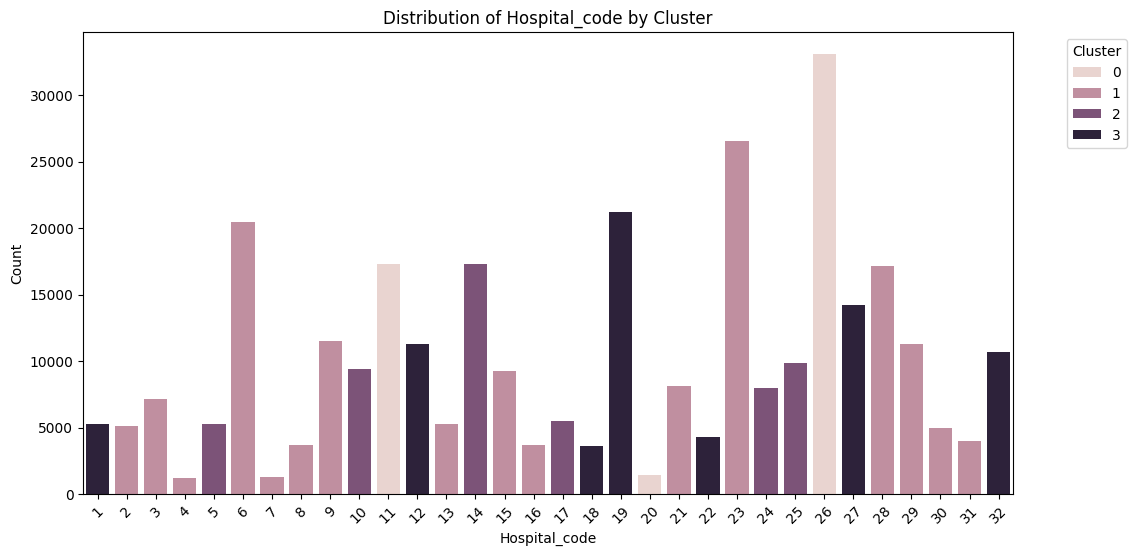

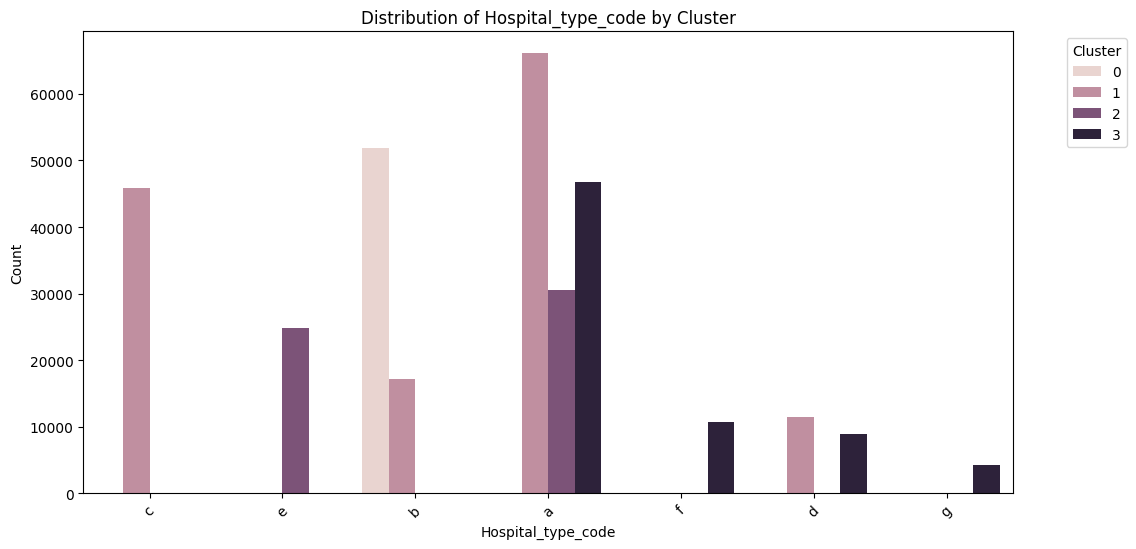

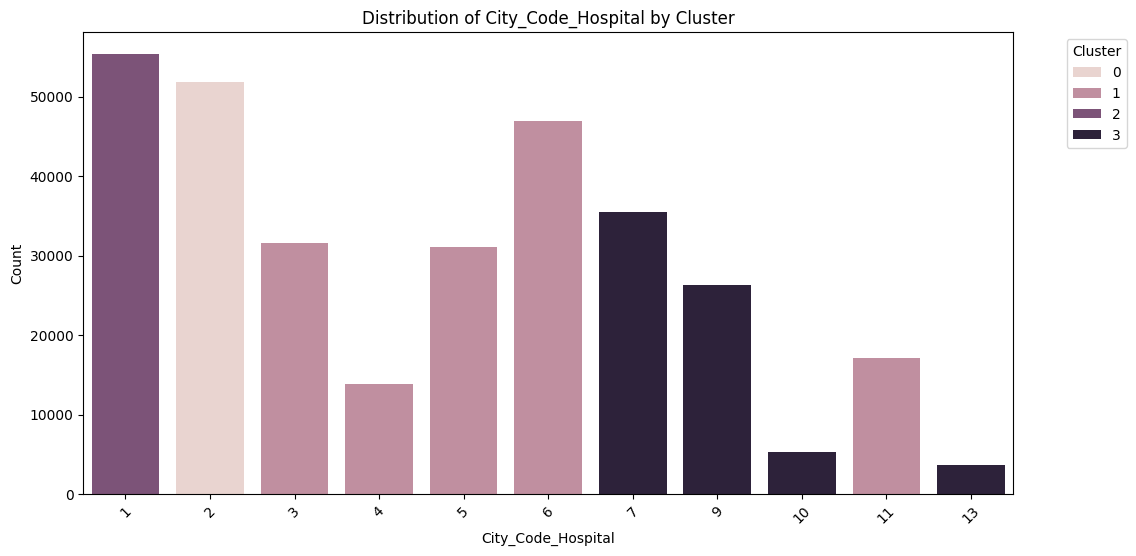

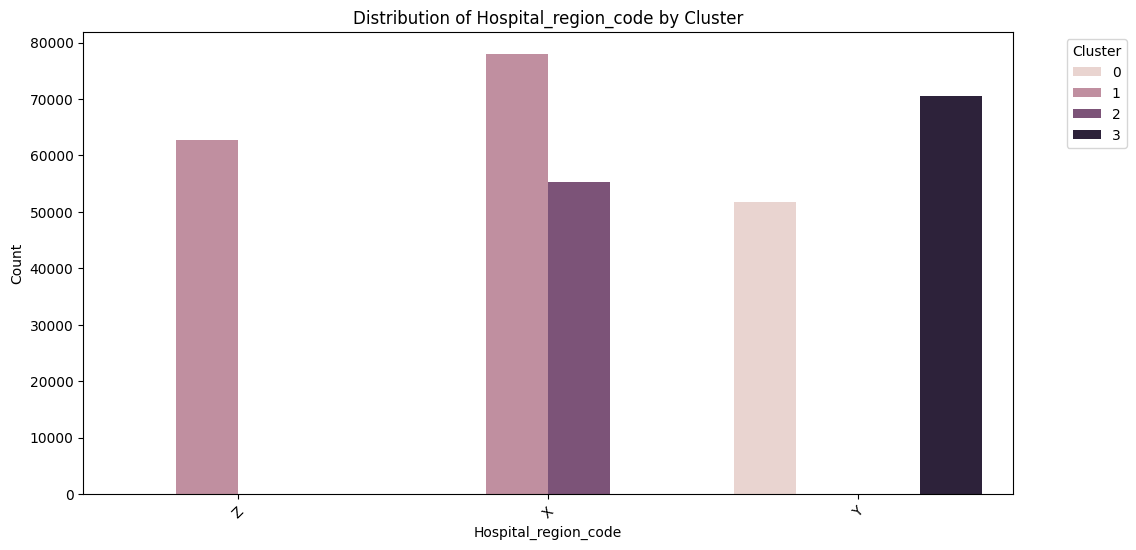

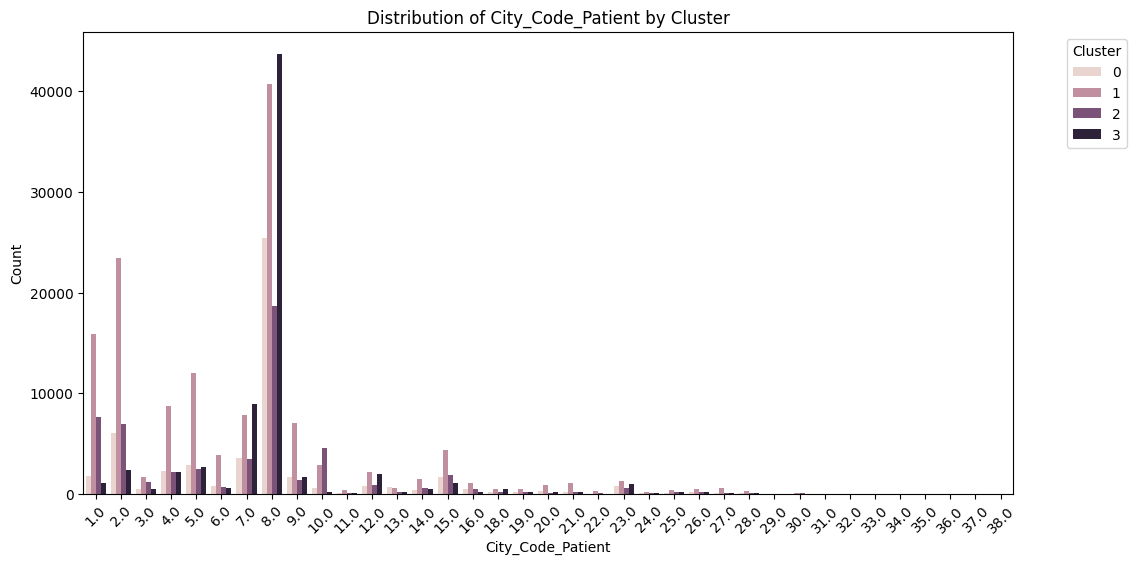

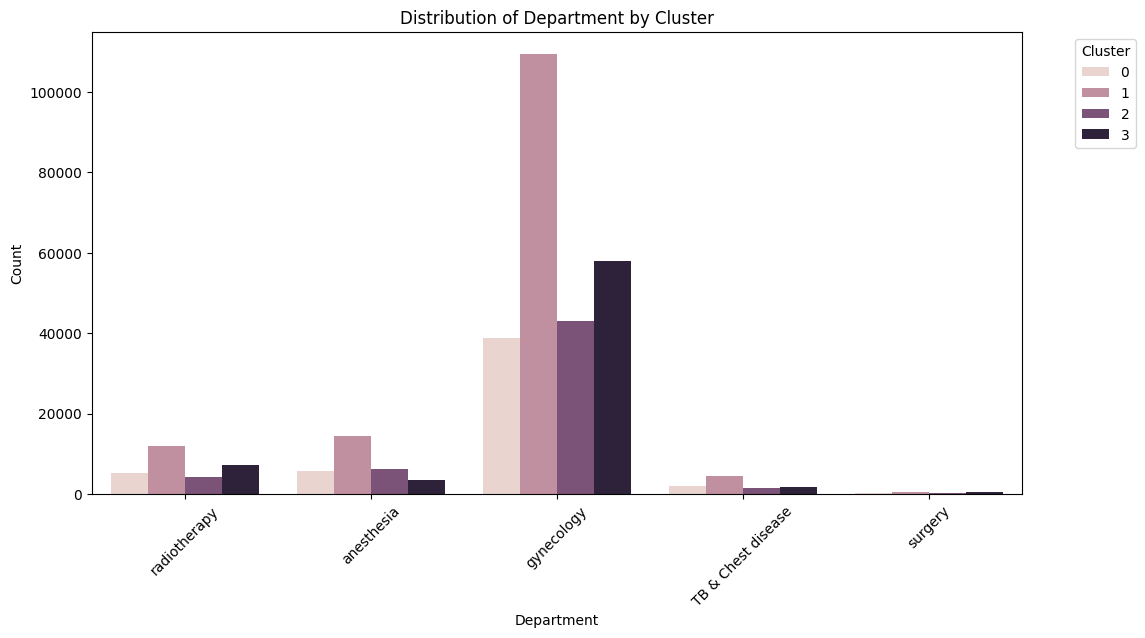

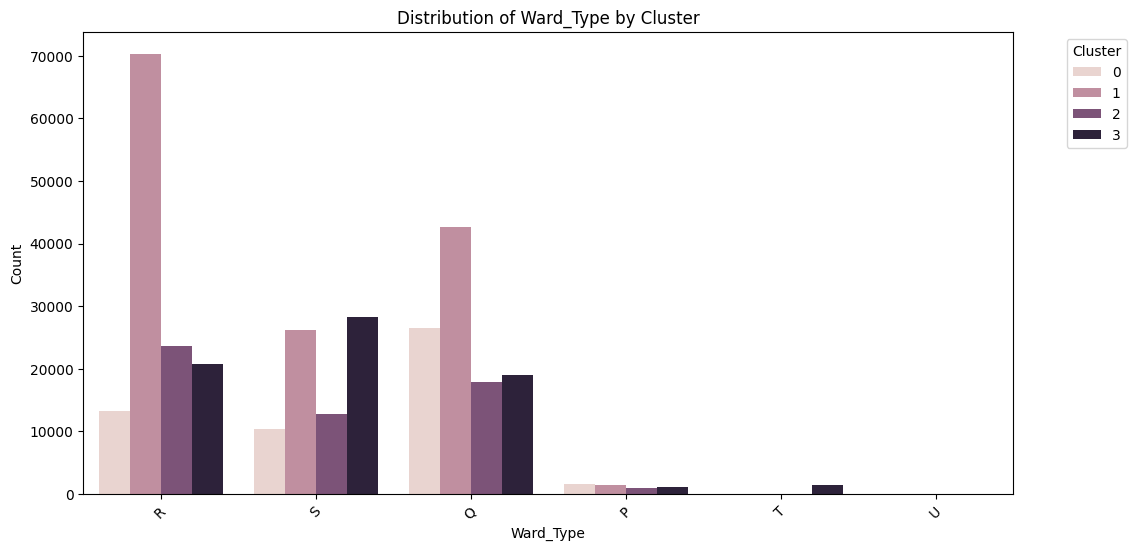

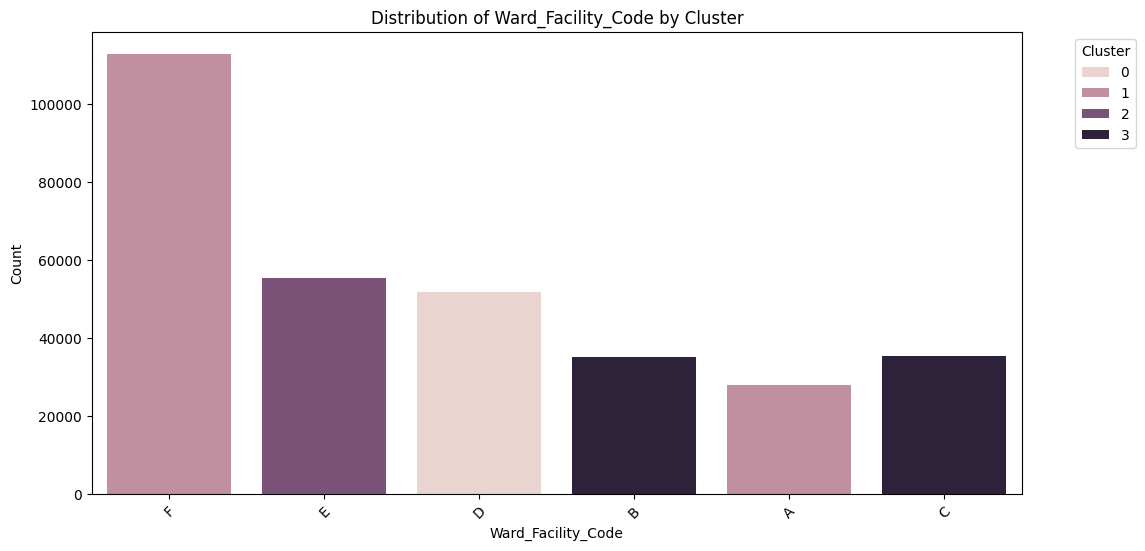

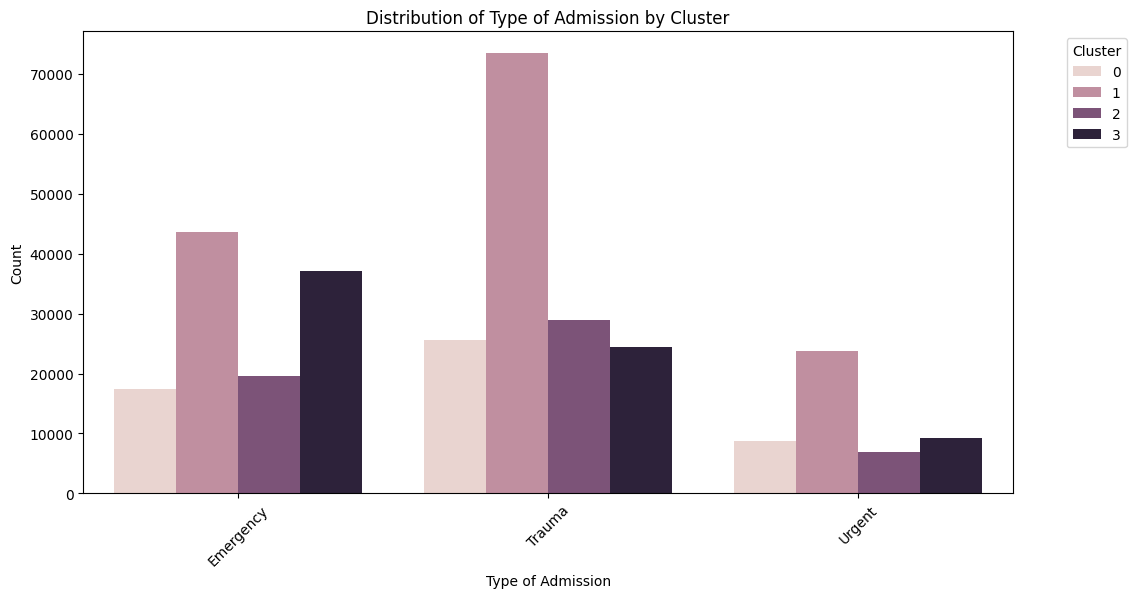

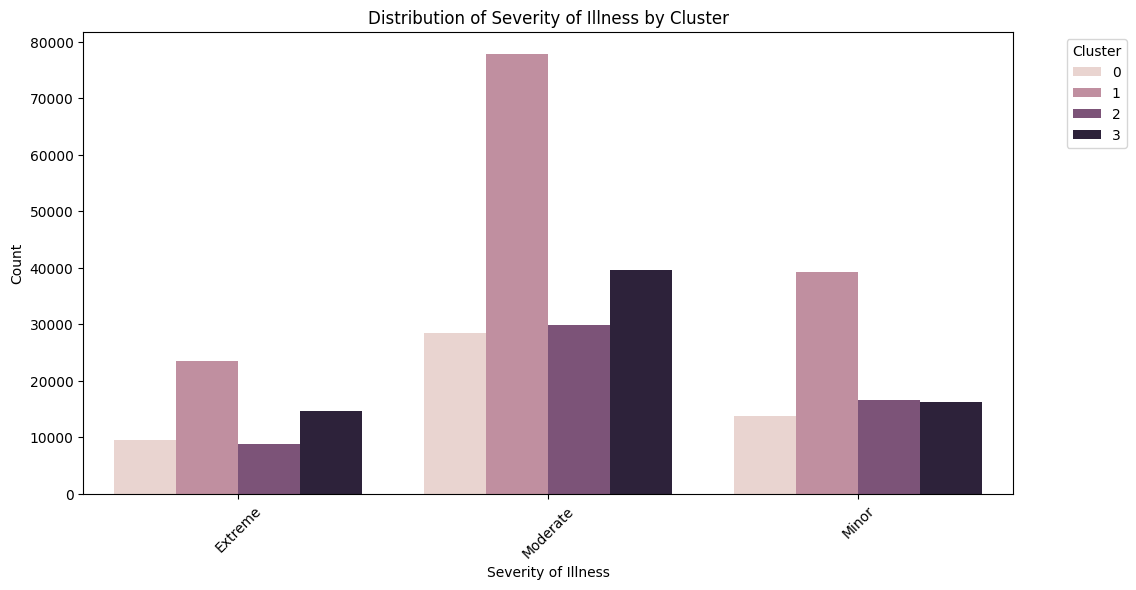

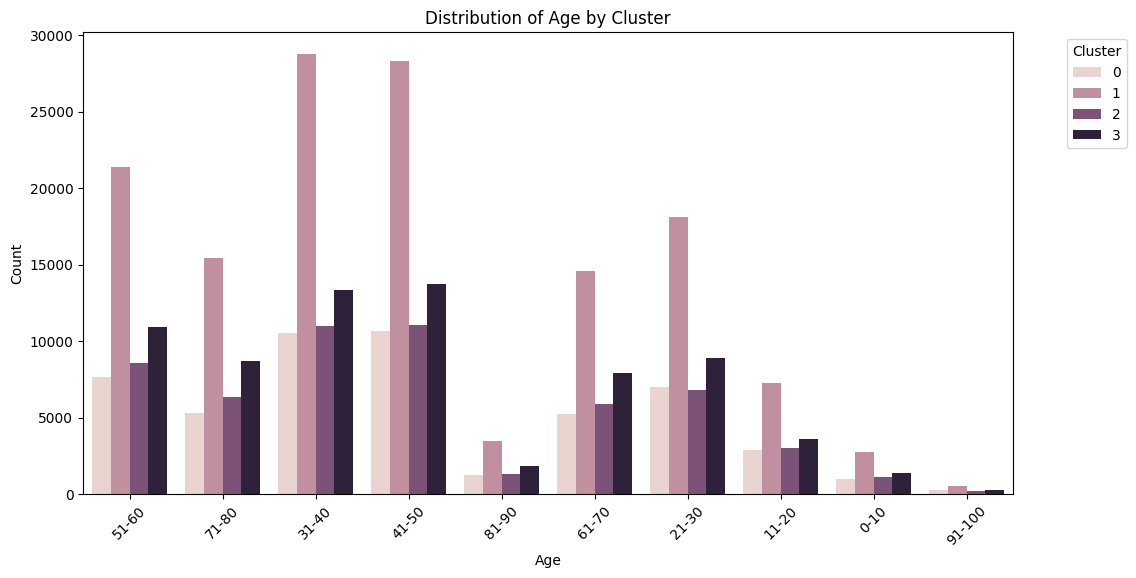

In [ ]:

# Dropping 'case_id' and 'patientid' for clustering
data_for_clustering = df.drop(columns=['case_id', 'patientid', 'Stay'])
data_for_clustering = pd.get_dummies(data_for_clustering, drop_first=True)

# Handle missing values before scaling
imputer = SimpleImputer(strategy='median')
data_for_clustering_imputed = pd.DataFrame(imputer.fit_transform(data_for_clustering), columns=data_for_clustering.columns)

# Standardize the numerical features
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_for_clustering_scaled)

# Categorical feature analysis by cluster
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'City_Code_Patient',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']

# Count plots for each categorical feature by cluster
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue='Cluster')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()



### Conclusion and Insights from Cluster Demographics and Patient Outcomes Analysis

#### Summary of Findings:

1. **Centralization and Specialization:**
   - **Cluster 1** appears to be centralized around specific hospital types and locations, suggesting a focus on specialized services or a central referral hospital model.
   - **Cluster 0 and 2** show diversity in hospital codes and types, indicating a broader patient base with varied services.

2. **Geographical Reach:**
   - **Cluster 2 and 3** have a broader geographical reach with diverse city and region codes, reflecting hospitals that serve a wider population or act as regional hubs.

3. **Service Distribution:**
   - Gynecology is the predominant department across all clusters, highlighting a high demand for these services. The diversity in other departments, especially in Cluster 2, suggests it might be a more general hospital.

4. **Admission and Severity:**
   - High proportions of emergency and trauma admissions across clusters emphasize the critical nature of cases handled. Moderate illness severity is predominant, with a balanced representation of minor and extreme cases, indicating a mix of routine and complex cases.

5. **Age Demographics:**
   - The relatively even age distribution across clusters shows that hospitals serve a wide age range, with no specific age group being overly dominant.

### Recommendations for Hospital Management and Policy-Makers:

1. **Targeted Services Expansion:**
   - For clusters with centralized services (e.g., Cluster 1), consider expanding specialized services based on the specific needs of patients in those clusters.

2. **Resource Allocation:**
   - Allocate resources and staff according to the geographical distribution and service demands, particularly in clusters that serve broader regions (e.g., Cluster 2 and 3).

3. **Departmental Focus:**
   - Given the high demand for gynecology, enhance facilities and staffing in this department across all clusters to meet patient needs effectively.

4. **Emergency Preparedness:**
   - Strengthen emergency and trauma services across all clusters due to their high incidence rates, ensuring hospitals are well-prepared to handle critical cases.

5. **Age-Specific Services:**
   - Develop targeted healthcare programs for different age groups, ensuring tailored care and preventive measures, particularly in clusters with diverse age demographics.

### Conclusion:

The cluster analysis reveals significant insights into the distribution of hospital codes, types, regions, departments, ward types, admission types, illness severity, and age demographics. These insights highlight the need for tailored strategies in resource allocation, service expansion, emergency preparedness, and age-specific healthcare programs. By focusing on the unique characteristics of each cluster, hospital management and policy-makers can make data-driven decisions to improve patient outcomes and optimize hospital operations effectively. The recommendations provided can guide strategic planning and ensure that healthcare services are aligned with the specific needs of the patient populations served by each cluster.

## Readmission Analysis

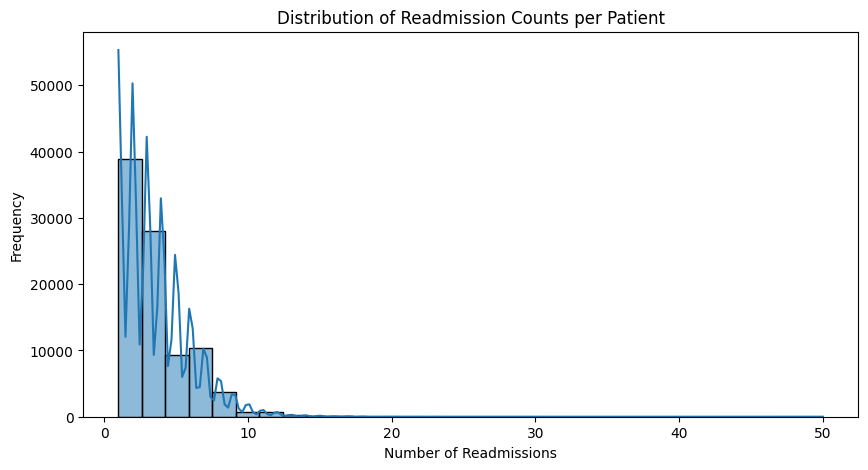

count    92017.000000
mean         3.460643
std          2.357492
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         50.000000
Name: count, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of readmissions per patient
readmission_counts = df['patientid'].value_counts()

# Plot the distribution of readmission counts
plt.figure(figsize=(10, 5))
sns.histplot(readmission_counts, bins=30, kde=True)
plt.title('Distribution of Readmission Counts per Patient')
plt.xlabel('Number of Readmissions')
plt.ylabel('Frequency')
plt.show()

# Describe the readmission counts
readmission_counts.describe()


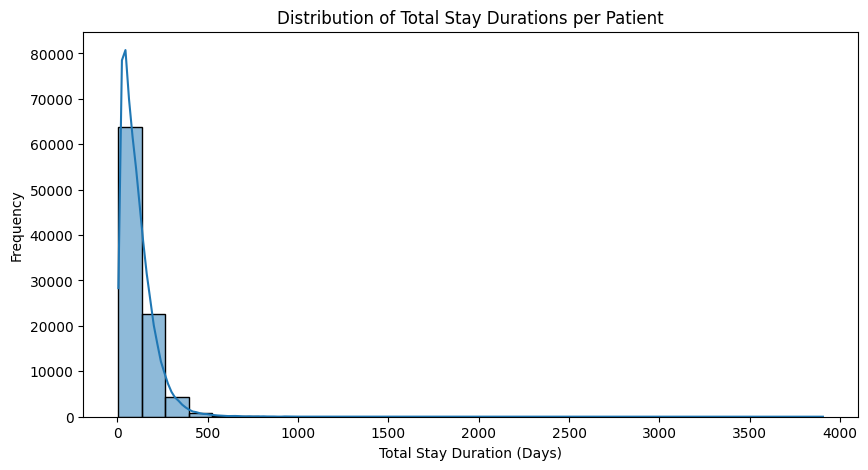

count    92017.000000
mean       111.053555
std         98.808589
min          5.000000
25%         45.000000
50%         90.000000
75%        150.000000
max       3905.000000
Name: Stay_num, dtype: float64

In [ ]:
# Convert 'Stay' to numerical ranges for summing up (assuming 'Stay' is categorical)
stay_mapping = {
    '0-10': 5,
    '11-20': 15,
    '21-30': 25,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '61-70': 65,
    '71-80': 75,
    '81-90': 85,
    '91-100': 95,
    'More than 100 Days': 110
}

df['Stay_num'] = df['Stay'].map(stay_mapping)

# Sum stay duration per patient
total_stay_per_patient = df.groupby('patientid')['Stay_num'].sum().reset_index()

# Plot the distribution of total stay durations per patient
plt.figure(figsize=(10, 5))
sns.histplot(total_stay_per_patient['Stay_num'], bins=30, kde=True)
plt.title('Distribution of Total Stay Durations per Patient')
plt.xlabel('Total Stay Duration (Days)')
plt.ylabel('Frequency')
plt.show()

# Describe the total stay durations
total_stay_per_patient['Stay_num'].describe()


In [ ]:
import pandas as pd

# List of categorical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
                        'Hospital_region_code', 'Department', 'Ward_Type',
                        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', "Age"]

# Dictionary to store the average readmission counts
average_readmission_stats = {}

# Calculate average readmission counts for each categorical feature
for feature in categorical_features:
    average_readmission_counts = df.groupby(feature)['patientid'].nunique().mean()
    average_readmission_stats[feature] = average_readmission_counts

# Convert the dictionary to a DataFrame for better visualization
average_readmission_stats_df = pd.DataFrame(list(average_readmission_stats.items()), columns=['Feature', 'Average Readmission Count'])

# Display the table
print(average_readmission_stats_df)


                Feature  Average Readmission Count
0         Hospital_code                8571.656250
1    Hospital_type_code               26907.428571
2    City_Code_Hospital               19431.636364
3  Hospital_region_code               50061.000000
4            Department               24772.200000
5             Ward_Type               29141.833333
6    Ward_Facility_Code               31710.666667
7     Type of Admission               49857.666667
8   Severity of Illness               31593.000000
9                   Age                9201.700000


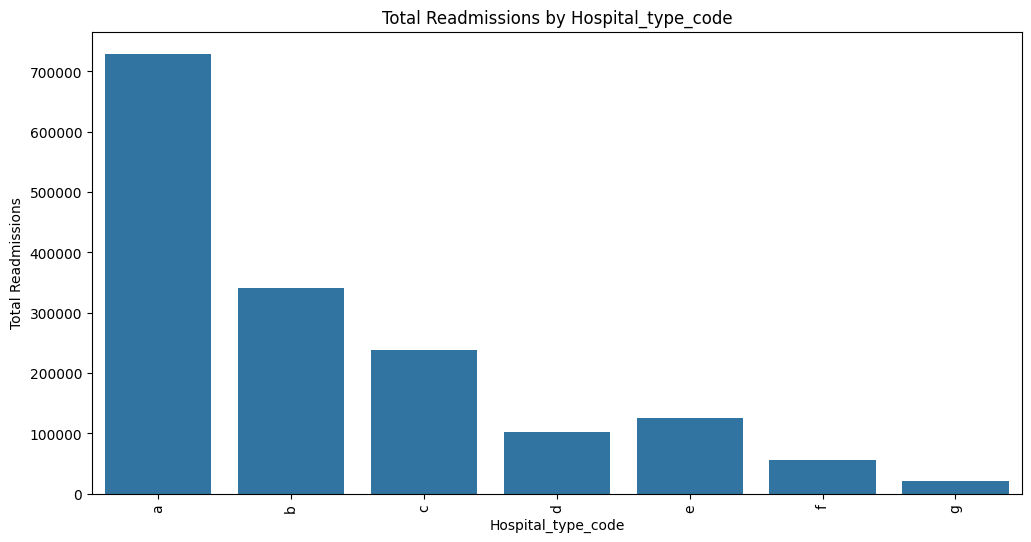

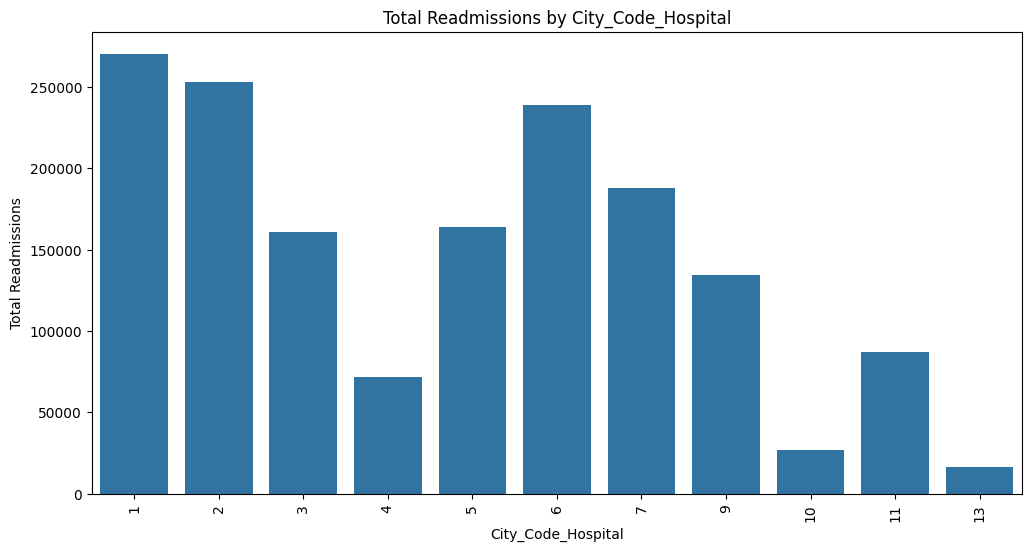

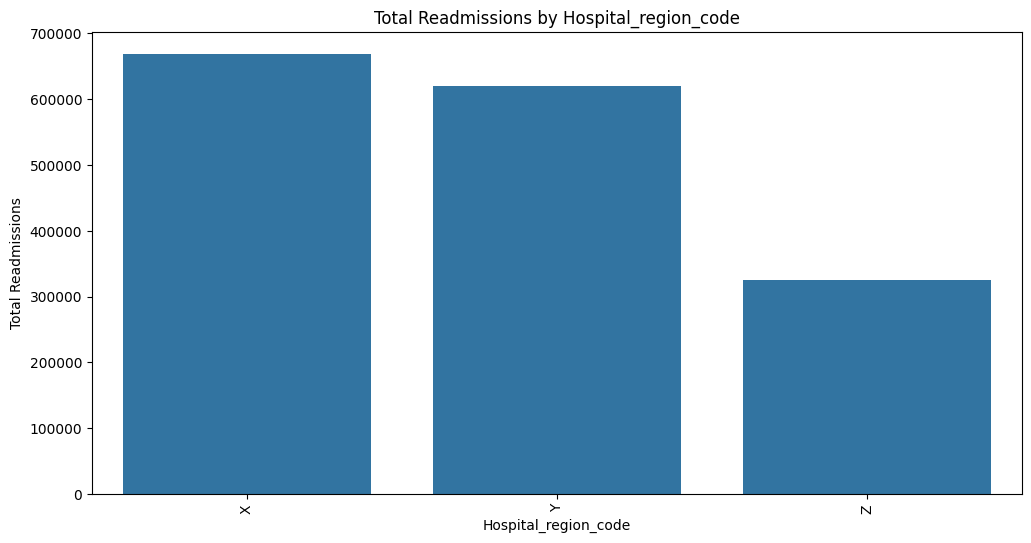

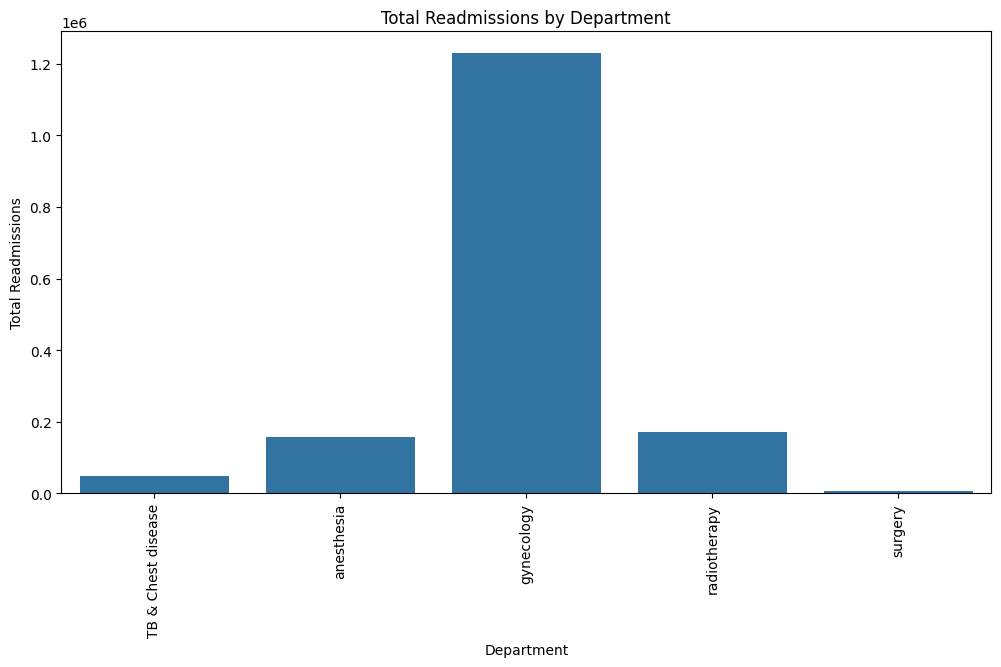

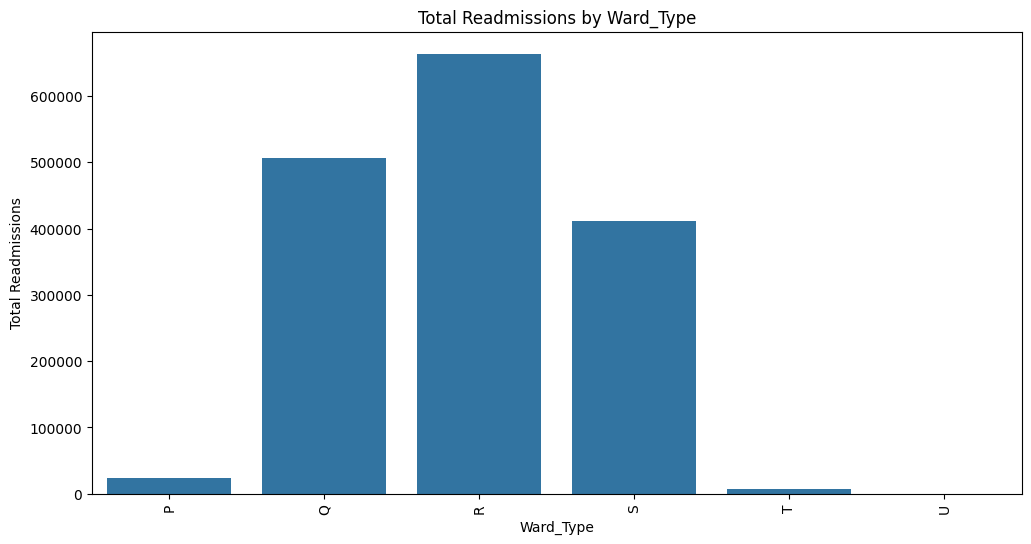

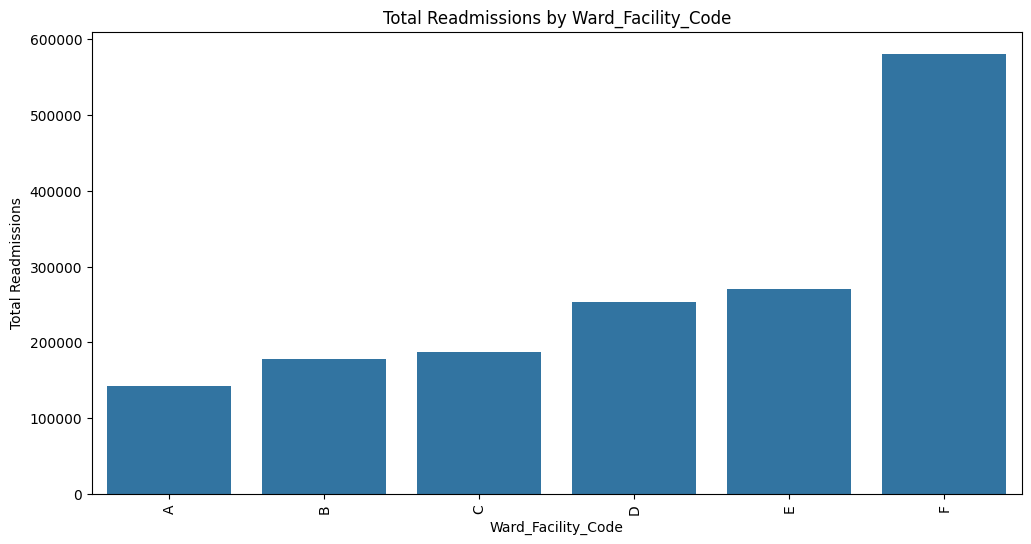

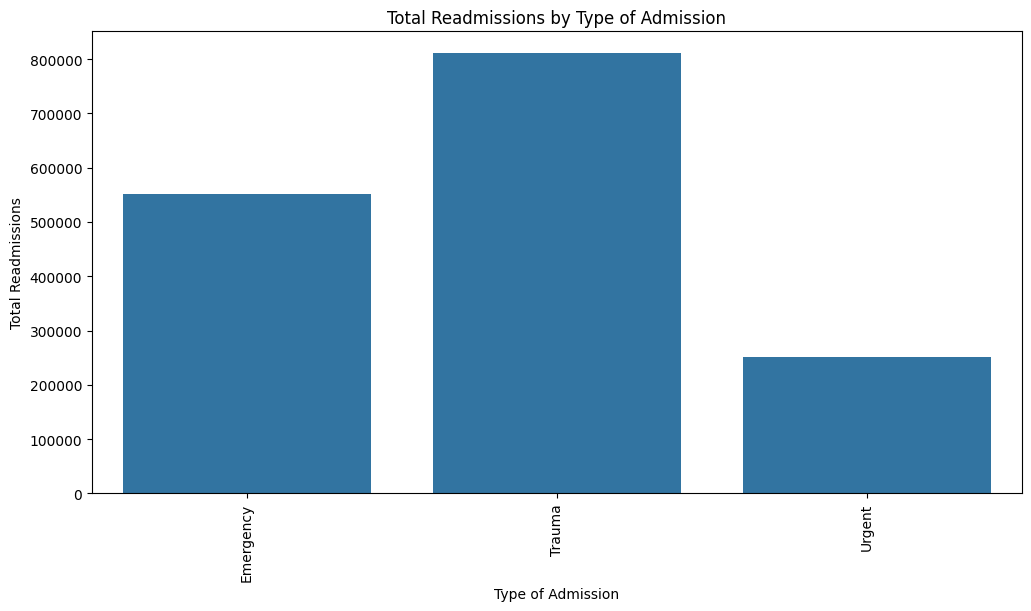

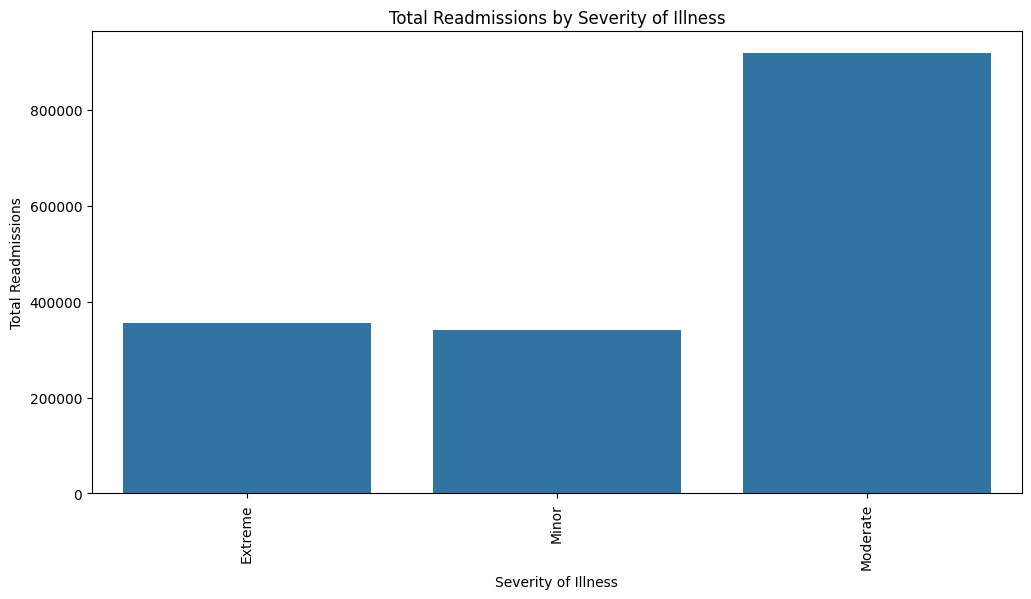

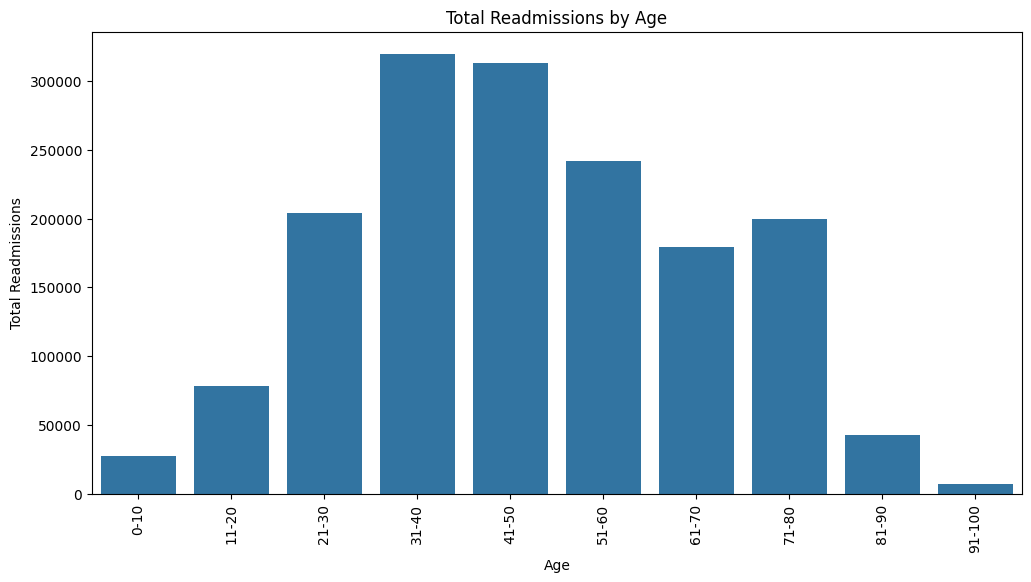

In [ ]:
# Calculate the number of readmissions per patient
readmissions_per_patient = df.groupby('patientid').size().reset_index(name='readmission_count')

# Merge readmissions count back to the main dataframe
df = df.merge(readmissions_per_patient, on='patientid')

categorical_features = ['Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
                        'Severity of Illness', 'Age']

# Loop over each categorical feature
for feature in categorical_features:
    # Calculate total readmissions for each category in the feature
    readmissions_per_category = df.groupby(feature)['readmission_count'].sum().reset_index()

    # Plot the total readmissions per category
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='readmission_count', data=readmissions_per_category, order=readmissions_per_category[feature])
    plt.title(f'Total Readmissions by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Readmissions')
    plt.xticks(rotation=90)
    plt.show()


### Overall Picture:
The readmission patterns reveal that urban hospitals, particularly those in certain regions and with specific facilities, see higher readmission rates. Departments dealing with chronic or complex conditions, such as gynecology and trauma, also contribute significantly to readmissions. The severity of illness, particularly moderate conditions, requires ongoing care, leading to frequent readmissions. These insights suggest a need for targeted post-discharge care, especially for patients in urban hospitals, those admitted under trauma conditions, and those with moderate severity illnesses. Enhanced outpatient services, better chronic disease management, and improved follow-up protocols could help reduce readmission rates and improve patient outcomes.

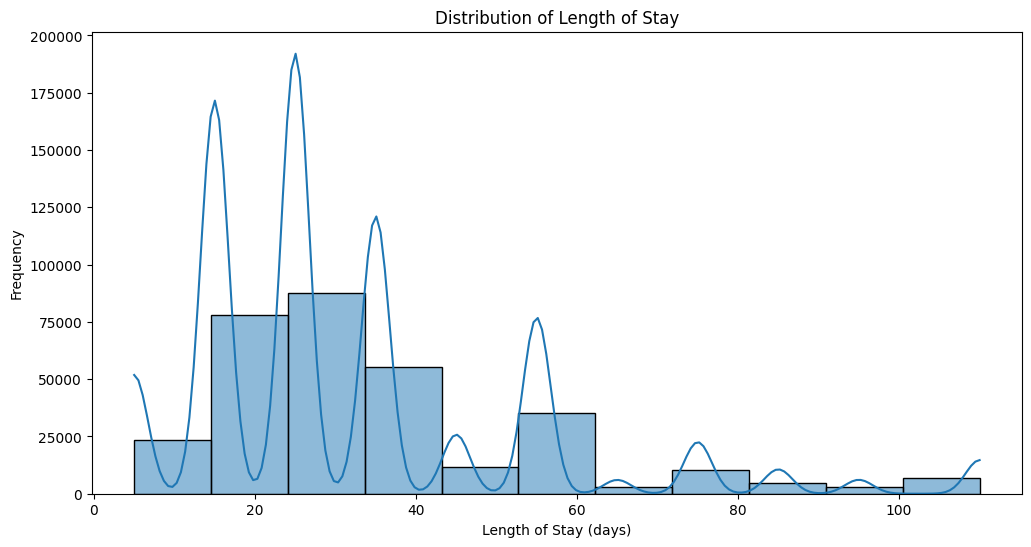

In [ ]:

df['Stay_num'] = df['Stay'].map(stay_mapping)

# Plotting the distribution of length of stay
plt.figure(figsize=(12, 6))
sns.histplot(df['Stay_num'], bins=11, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


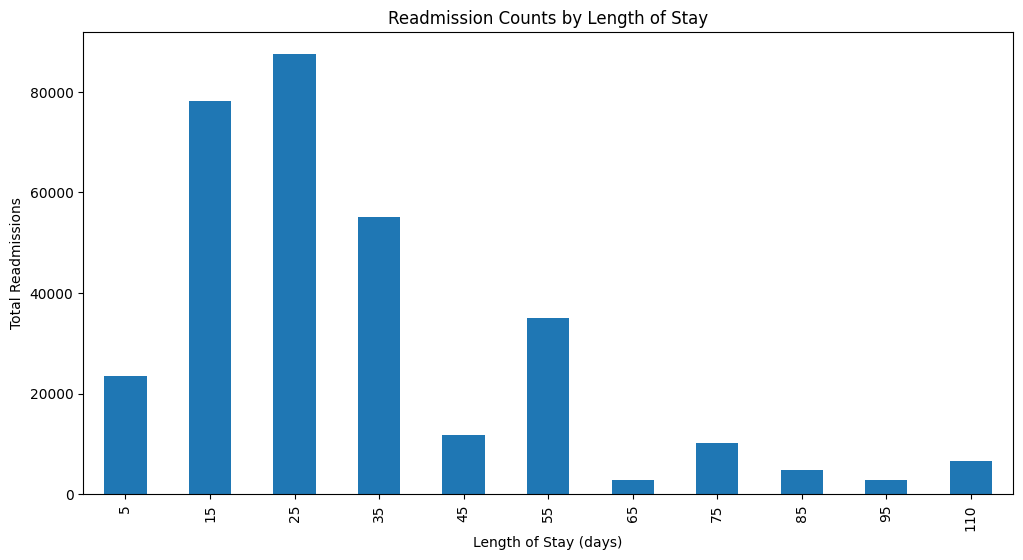

In [ ]:
# Grouping by length of stay to get readmission counts
stay_readmission_counts = df.groupby('Stay_num')['patientid'].count()

# Plotting the readmission counts by length of stay
plt.figure(figsize=(12, 6))
stay_readmission_counts.plot(kind='bar')
plt.title('Readmission Counts by Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Total Readmissions')
plt.show()


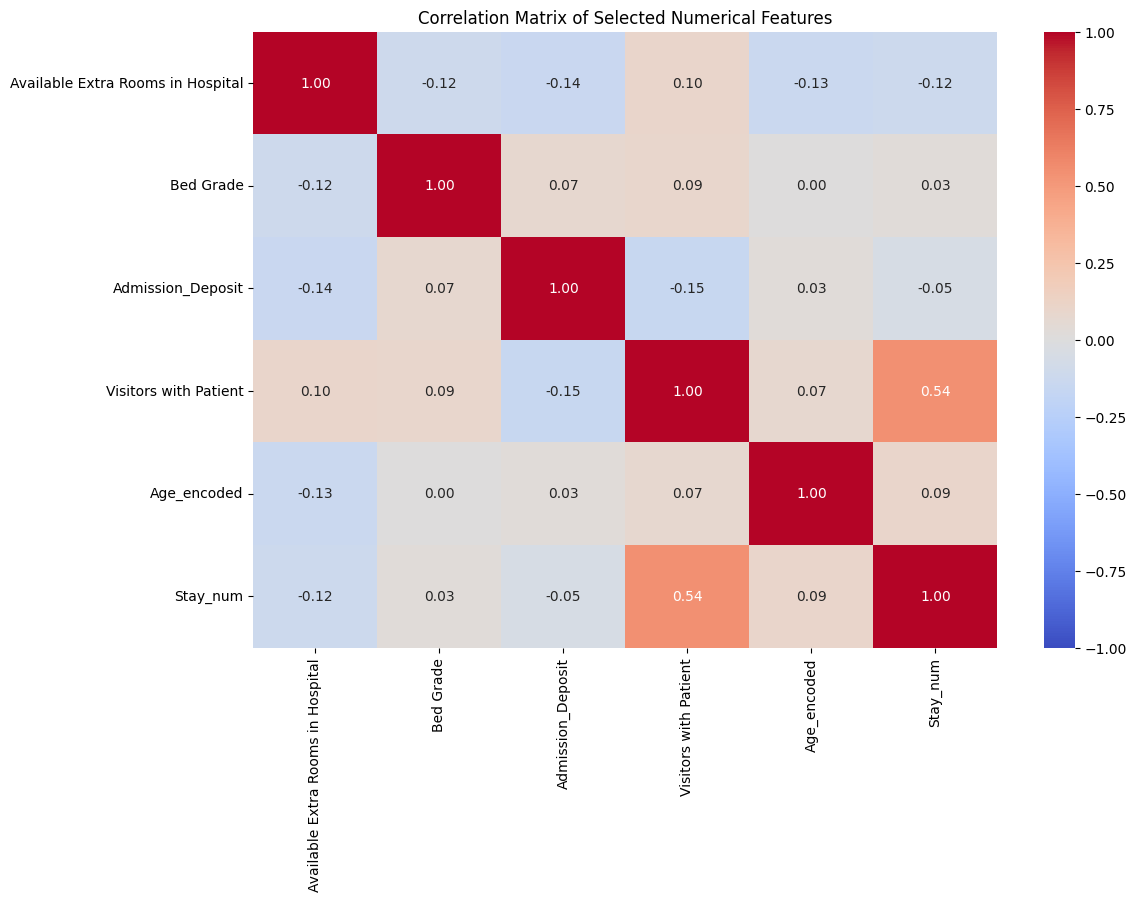

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Age' feature
label_encoder = LabelEncoder()
df['Age_encoded'] = label_encoder.fit_transform(df['Age'])

# Select the specified numerical features
numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient', 'Age_encoded', 'Stay_num']

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()


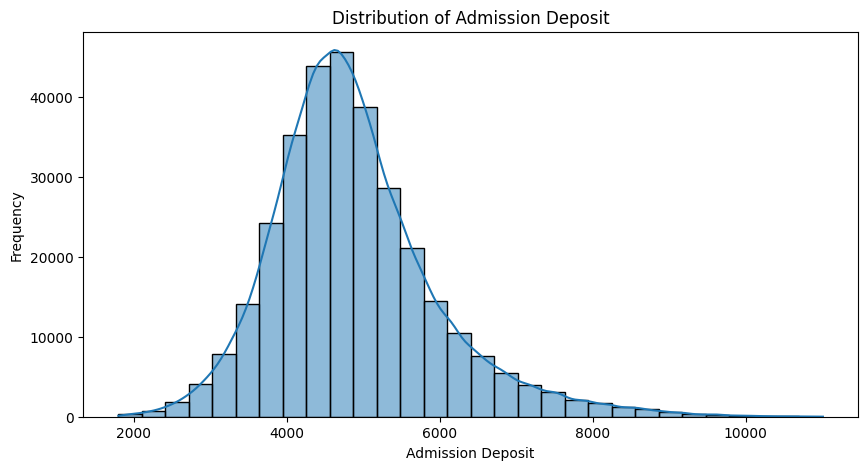

In [ ]:
# Distribution of Admission_Deposit
plt.figure(figsize=(10, 5))
sns.histplot(df['Admission_Deposit'], bins=30, kde=True)
plt.title('Distribution of Admission Deposit')
plt.xlabel('Admission Deposit')
plt.ylabel('Frequency')
plt.show()




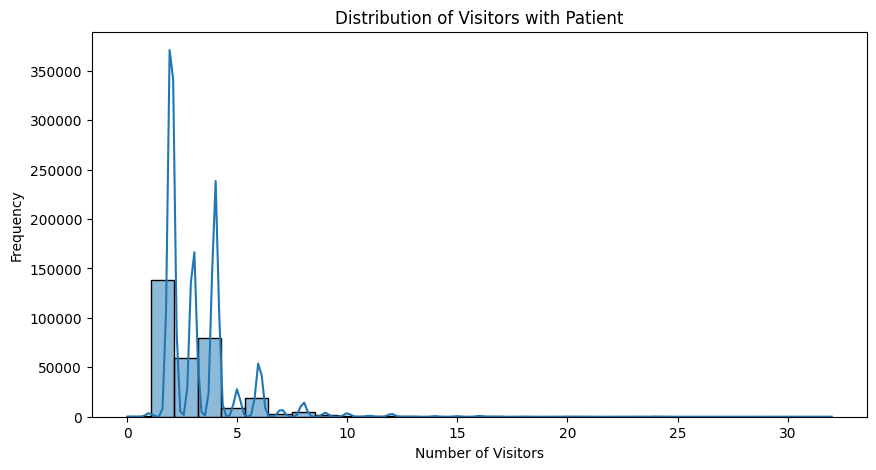

In [ ]:
# Distribution of Visitors with Patient
plt.figure(figsize=(10, 5))
sns.histplot(df['Visitors with Patient'], bins=30, kde=True)
plt.title('Distribution of Visitors with Patient')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()


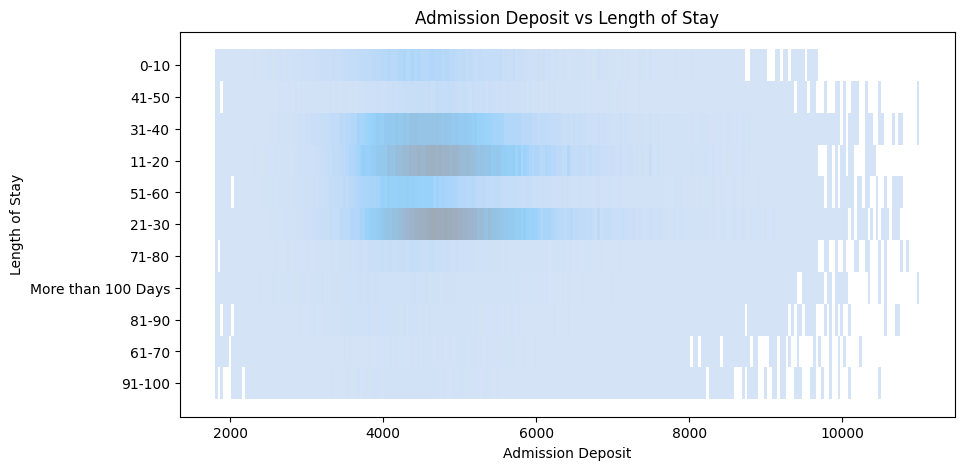

In [ ]:

# Scatter plot of Admission Deposit vs Length of Stay
plt.figure(figsize=(10, 5))
sns.histplot(x='Admission_Deposit', y='Stay', data=df, alpha=0.5)
plt.title('Admission Deposit vs Length of Stay')
plt.xlabel('Admission Deposit')
plt.ylabel('Length of Stay')
plt.show()

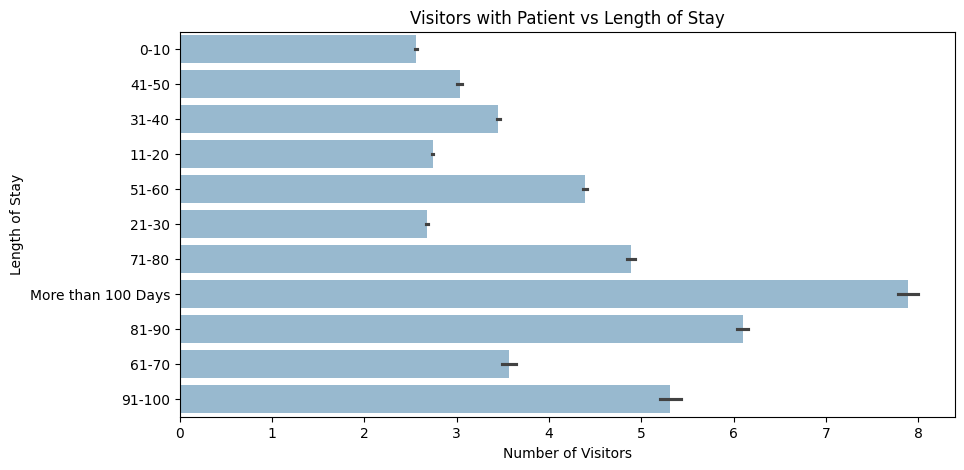

In [ ]:

# Scatter plot of Visitors with Patient vs Length of Stay
plt.figure(figsize=(10, 5))
sns.barplot(x='Visitors with Patient', y='Stay', data=df, alpha=0.5)
plt.title('Visitors with Patient vs Length of Stay')
plt.xlabel('Number of Visitors')
plt.ylabel('Length of Stay')
plt.show()


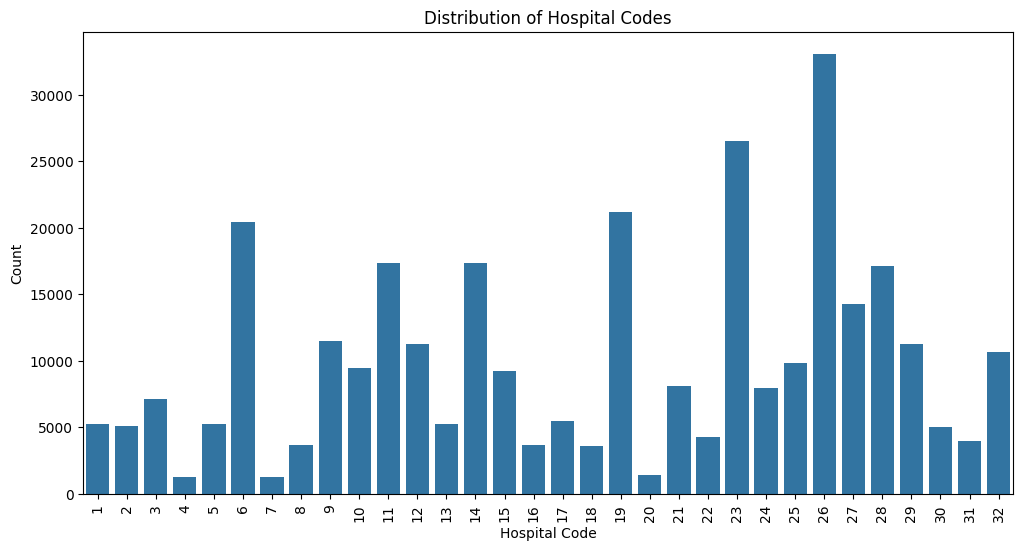

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hospital_code')
plt.title('Distribution of Hospital Codes')
plt.xlabel('Hospital Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['Stay_encoded'] = label_encoder.fit_transform(df['Stay'])


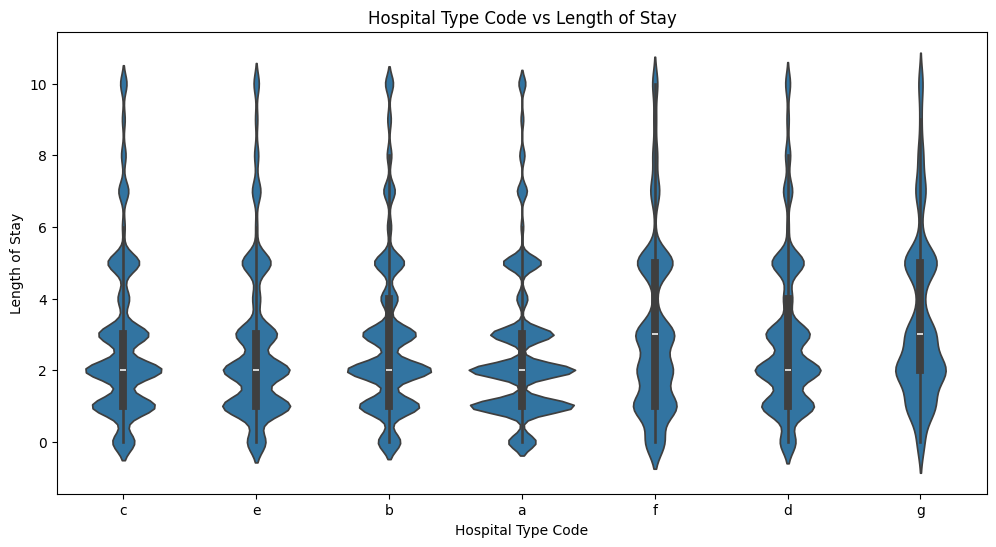

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Hospital_type_code', y='Stay_encoded')
plt.title('Hospital Type Code vs Length of Stay')
plt.xlabel('Hospital Type Code')
plt.ylabel('Length of Stay')
plt.show()


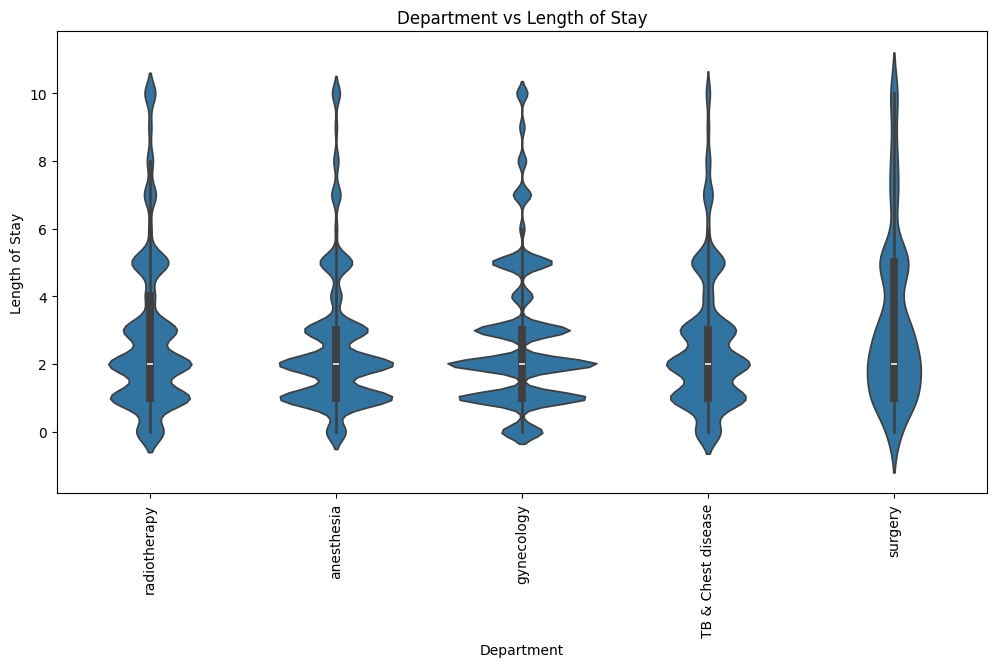

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Department', y='Stay_encoded')
plt.title('Department vs Length of Stay')
plt.xlabel('Department')
plt.ylabel('Length of Stay')
plt.xticks(rotation=90)
plt.show()


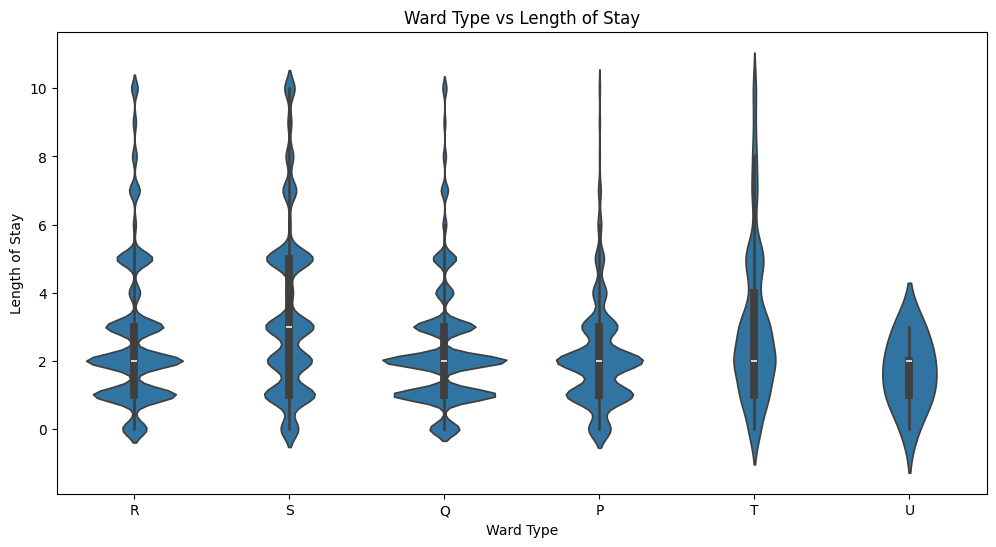

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Ward_Type', y='Stay_encoded')
plt.title('Ward Type vs Length of Stay')
plt.xlabel('Ward Type')
plt.ylabel('Length of Stay')
plt.show()


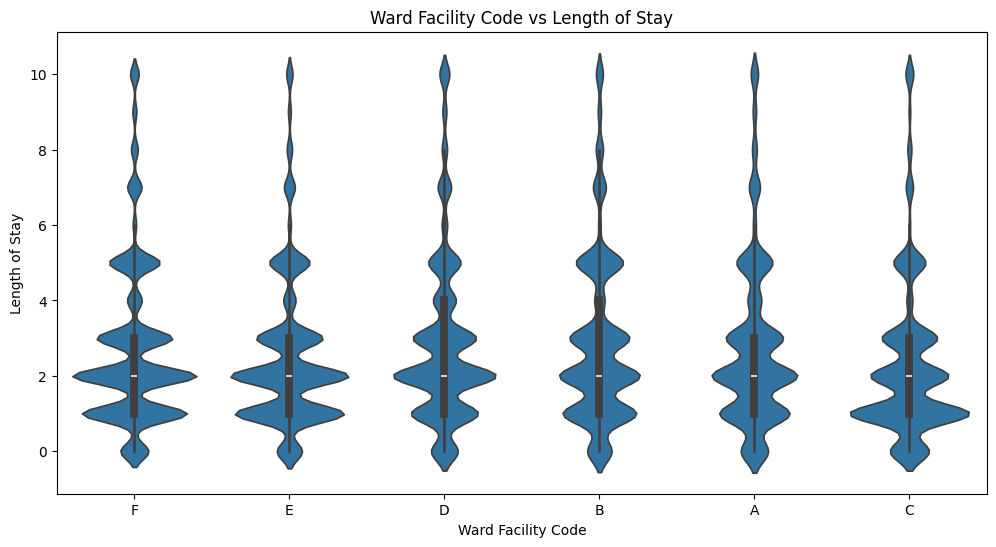

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Ward_Facility_Code', y='Stay_encoded')
plt.title('Ward Facility Code vs Length of Stay')
plt.xlabel('Ward Facility Code')
plt.ylabel('Length of Stay')
plt.show()


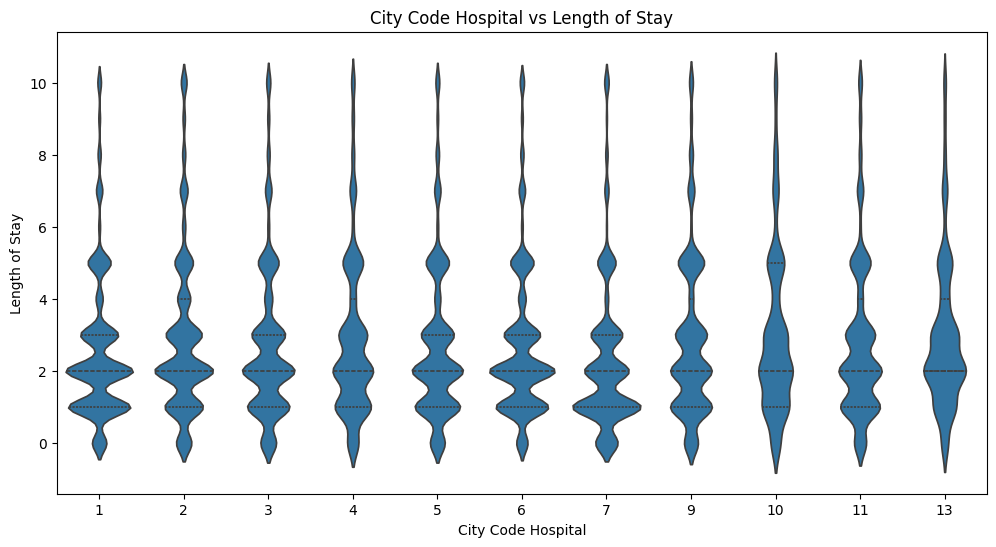

In [ ]:
# Violin plot for Length of Stay by City Code Hospital
plt.figure(figsize=(12, 6))
sns.violinplot(x='City_Code_Hospital', y='Stay_encoded', data=df, inner='quartile')
plt.title('City Code Hospital vs Length of Stay')
plt.xlabel('City Code Hospital')
plt.ylabel('Length of Stay')
plt.show()


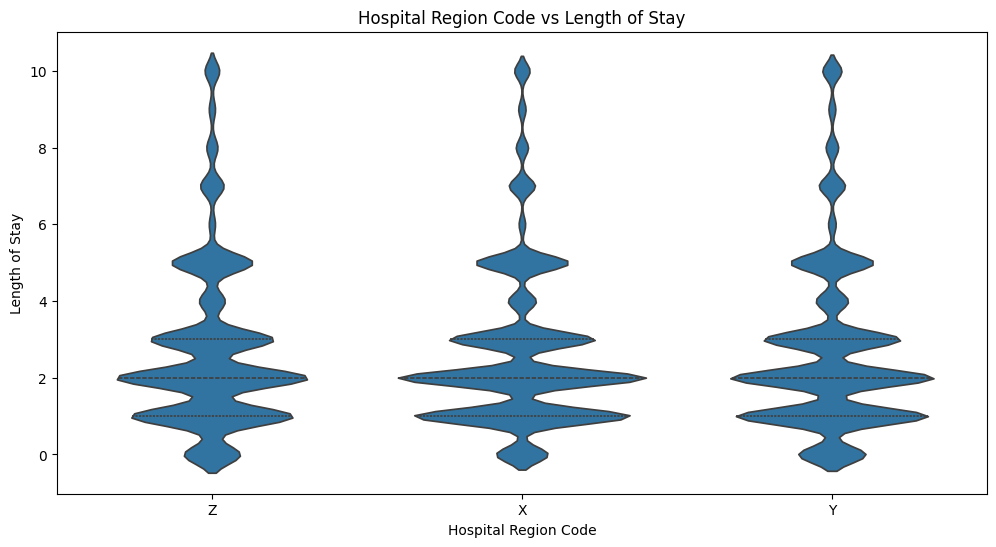

In [ ]:
# Violin plot for Length of Stay by Hospital Region Code
plt.figure(figsize=(12, 6))
sns.violinplot(x='Hospital_region_code', y='Stay_encoded', data=df, inner='quartile')
plt.title('Hospital Region Code vs Length of Stay')
plt.xlabel('Hospital Region Code')
plt.ylabel('Length of Stay')
plt.show()


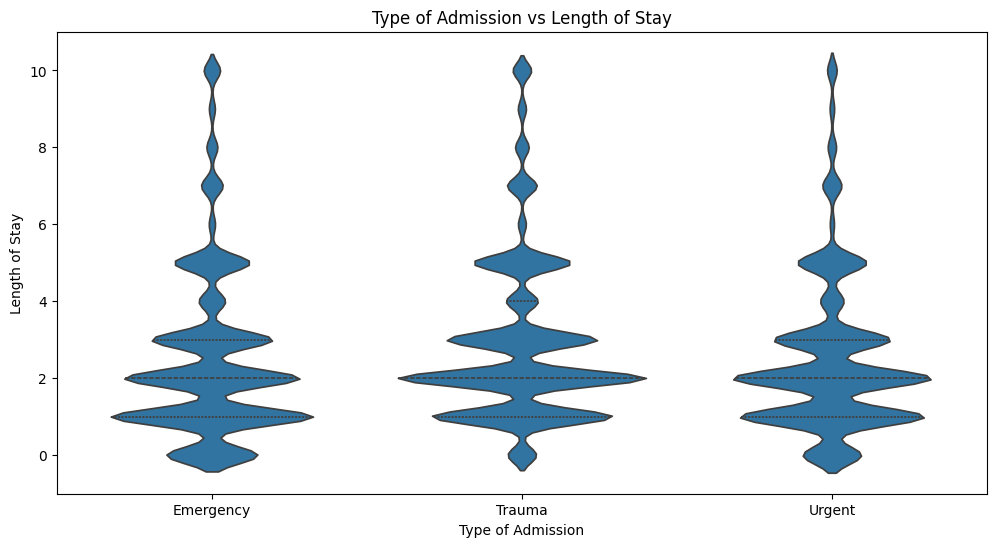

In [ ]:
# Violin plot for Length of Stay by Type of Admission
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type of Admission', y='Stay_encoded', data=df, inner='quartile')
plt.title('Type of Admission vs Length of Stay')
plt.xlabel('Type of Admission')
plt.ylabel('Length of Stay')
plt.show()


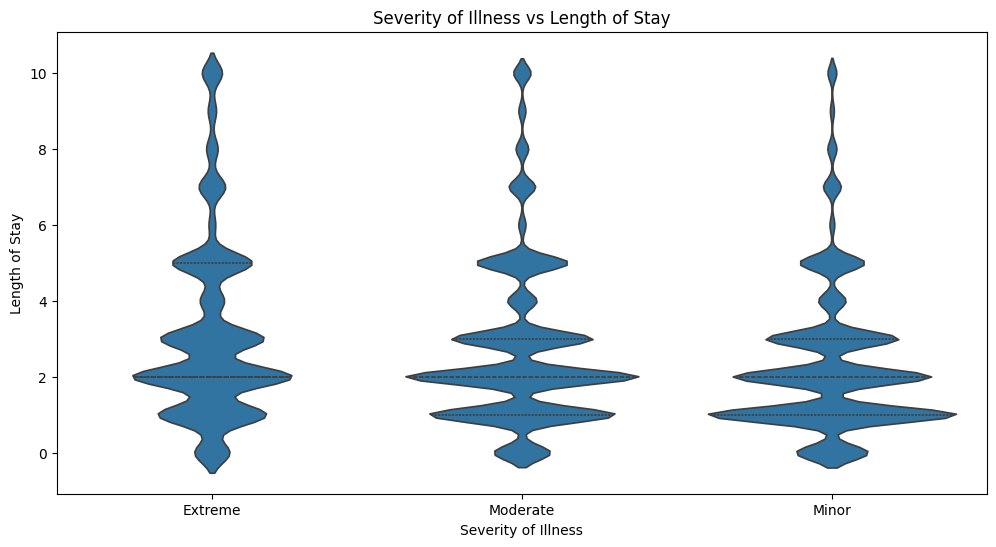

In [ ]:
# Violin plot for Length of Stay by Severity of Illness
plt.figure(figsize=(12, 6))
sns.violinplot(x='Severity of Illness', y='Stay_encoded', data=df, inner='quartile')
plt.title('Severity of Illness vs Length of Stay')
plt.xlabel('Severity of Illness')
plt.ylabel('Length of Stay')
plt.show()


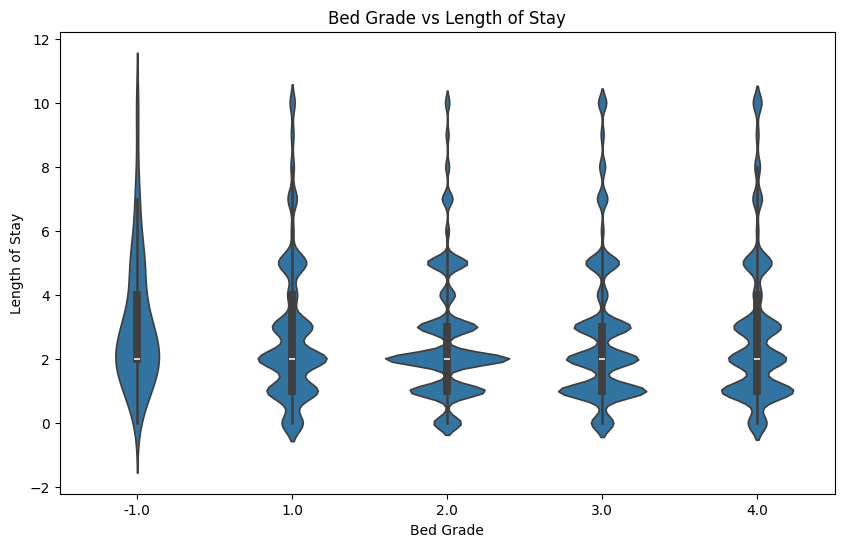

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Bed Grade', y='Stay_encoded', data=df)
plt.title('Bed Grade vs Length of Stay')
plt.xlabel('Bed Grade')
plt.ylabel('Length of Stay')
plt.show()


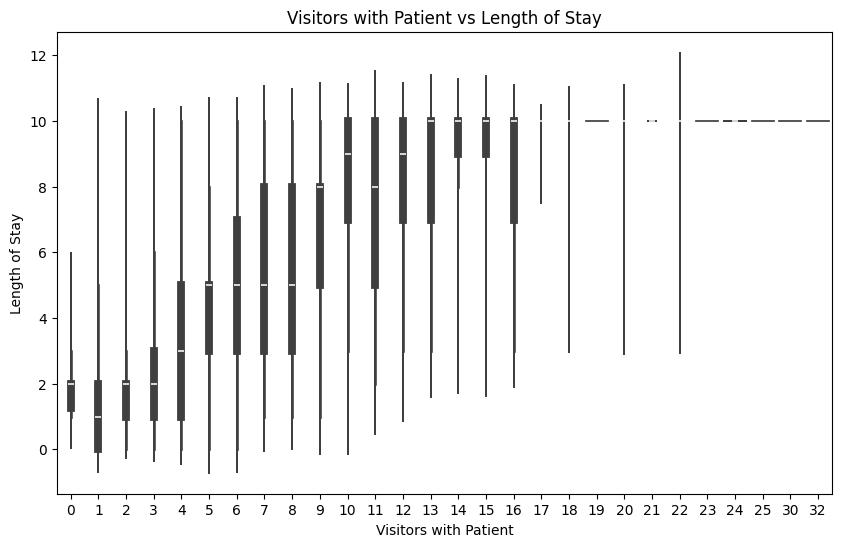

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Visitors with Patient', y='Stay_encoded', data=df)
plt.title('Visitors with Patient vs Length of Stay')
plt.xlabel('Visitors with Patient')
plt.ylabel('Length of Stay')
plt.show()


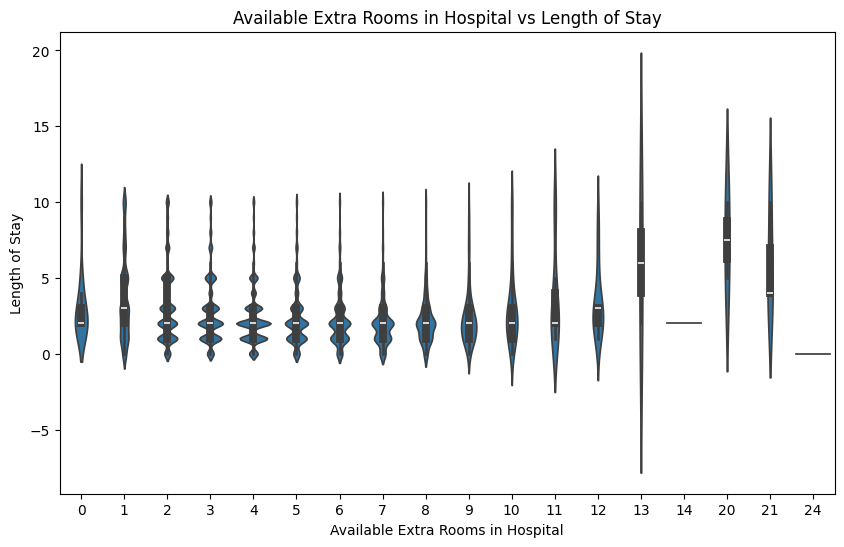

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Available Extra Rooms in Hospital', y='Stay_encoded', data=df)
plt.title('Available Extra Rooms in Hospital vs Length of Stay')
plt.xlabel('Available Extra Rooms in Hospital')
plt.ylabel('Length of Stay')
plt.show()


# Modelling

In [ ]:
# Colab warns and provides remediation steps if the GPUs is not compatible with RAPIDS.

!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (490/490), 136.70 KiB | 608.00 KiB/s, done.
Resolving deltas: 100% (251/251), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Train Accuracy: 0.48632383346557617
Test Accuracy: 0.42023614048957825

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.15      0.21      4689
           1       0.42      0.49      0.45     15561
           2       0.42      0.66      0.52     17603
           3       0.41      0.24      0.30     10981
           4       0.24      0.00      0.00      2357
           5       0.41      0.48      0.44      7128
           6       0.00      0.00      0.00       554
           7       0.33      0.02      0.04      2031
           8       0.39      0.19      0.26       941
           9       0.52      0.02      0.04       552
          10       0.52      0.40      0.45      1291

    accuracy                           0.42     63688
   macro avg       0.37      0.24      0.25     63688
weighted avg       0.41      0.42      0.39     63688


Confusion Matrix:
 [[  684  2174  1787    21     3    20     0     0     0     0     0]
 [

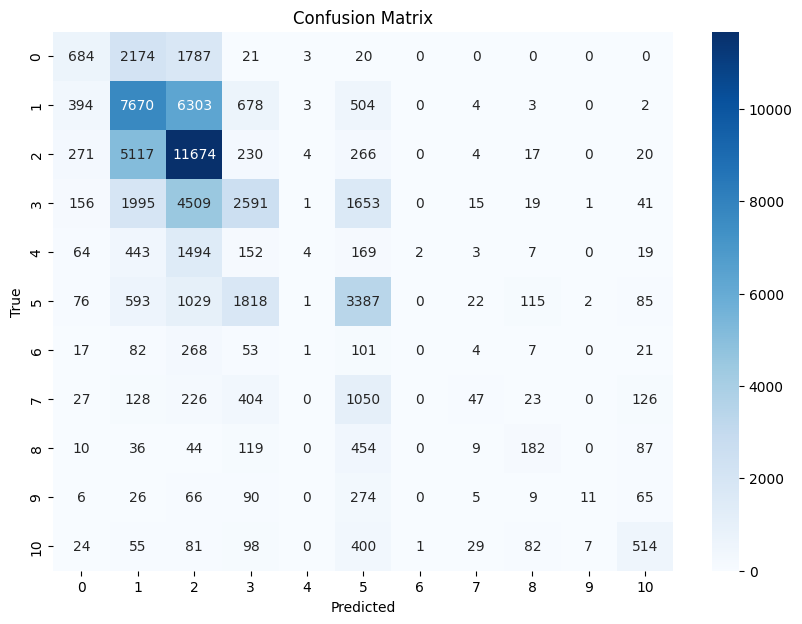

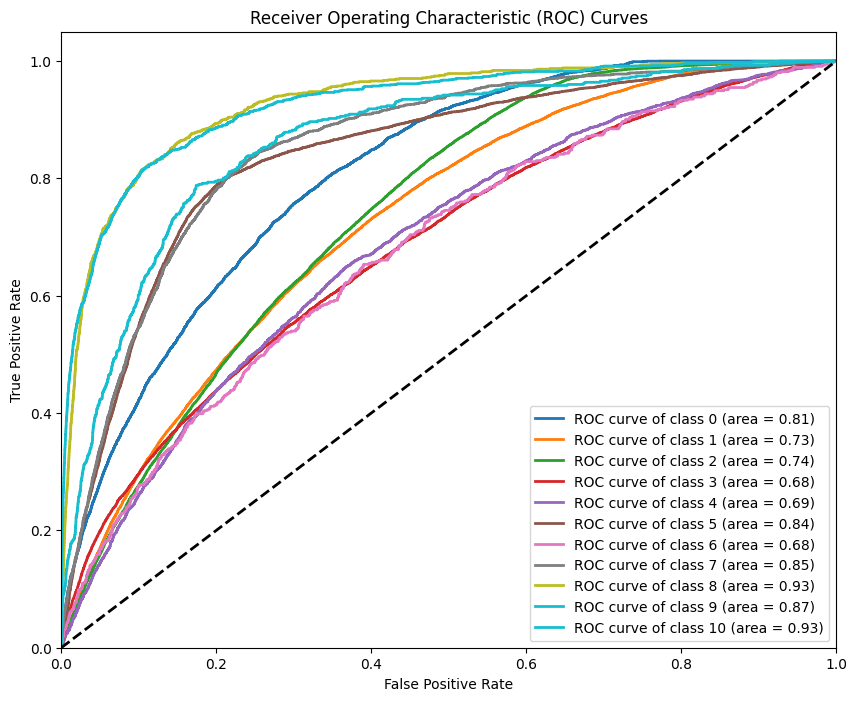

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestClassifier as cuRF
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Convert numerical features to float32
df[numerical_features] = df[numerical_features].astype('float32')

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline with optimal hyperparameters from Bayesian search
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', cuRF(random_state=42,
                                          max_depth=14,
                                          max_features=0.8876821894139413,
                                          min_samples_leaf=2,
                                          min_samples_split=5,
                                          n_estimators=109,
                                          n_streams=1))])

# Fit the model with the best parameters
rf_pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Train Accuracy: {rf_pipeline.score(X_train, y_train)}")
print(f"Test Accuracy: {rf_pipeline.score(X_test, y_test)}")

# Predict the test set
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC-AUC curves for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


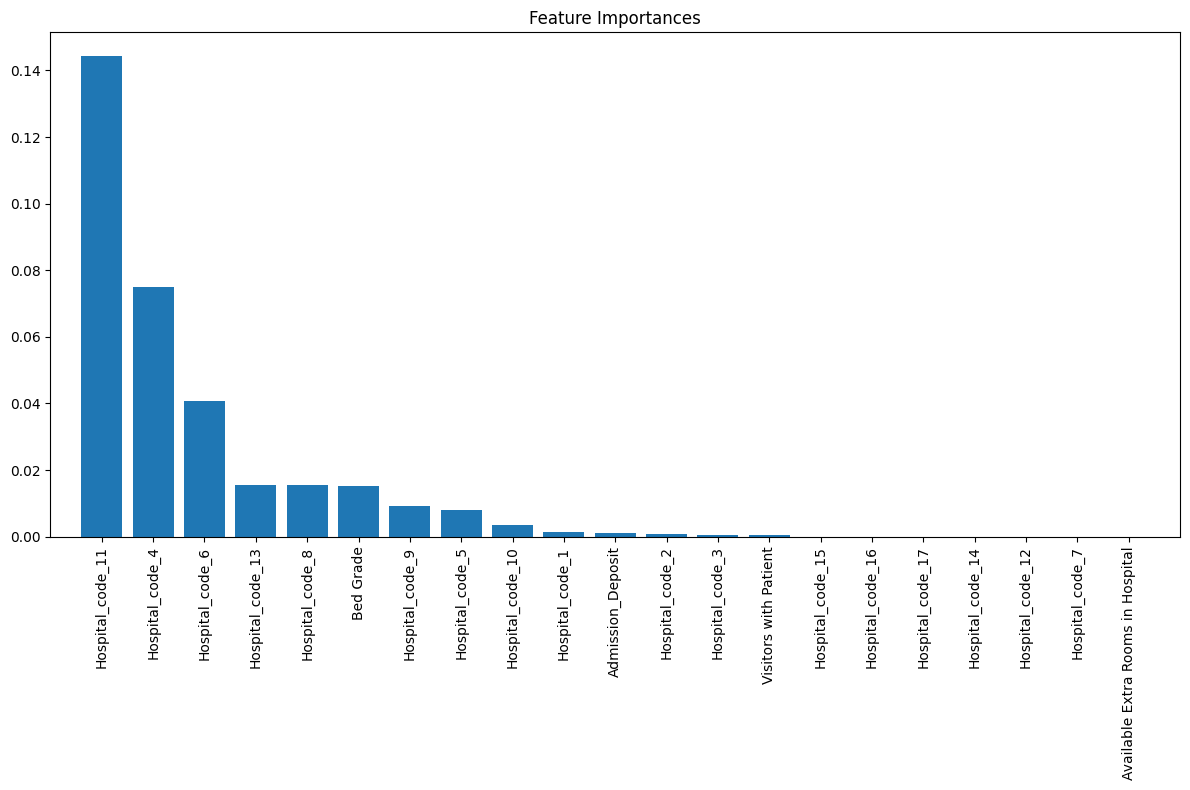

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(rf_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
feature_names = np.hstack([numerical_features, preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)])

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

Train Accuracy: 0.49679293424926396
Test Accuracy: 0.42196332119080515


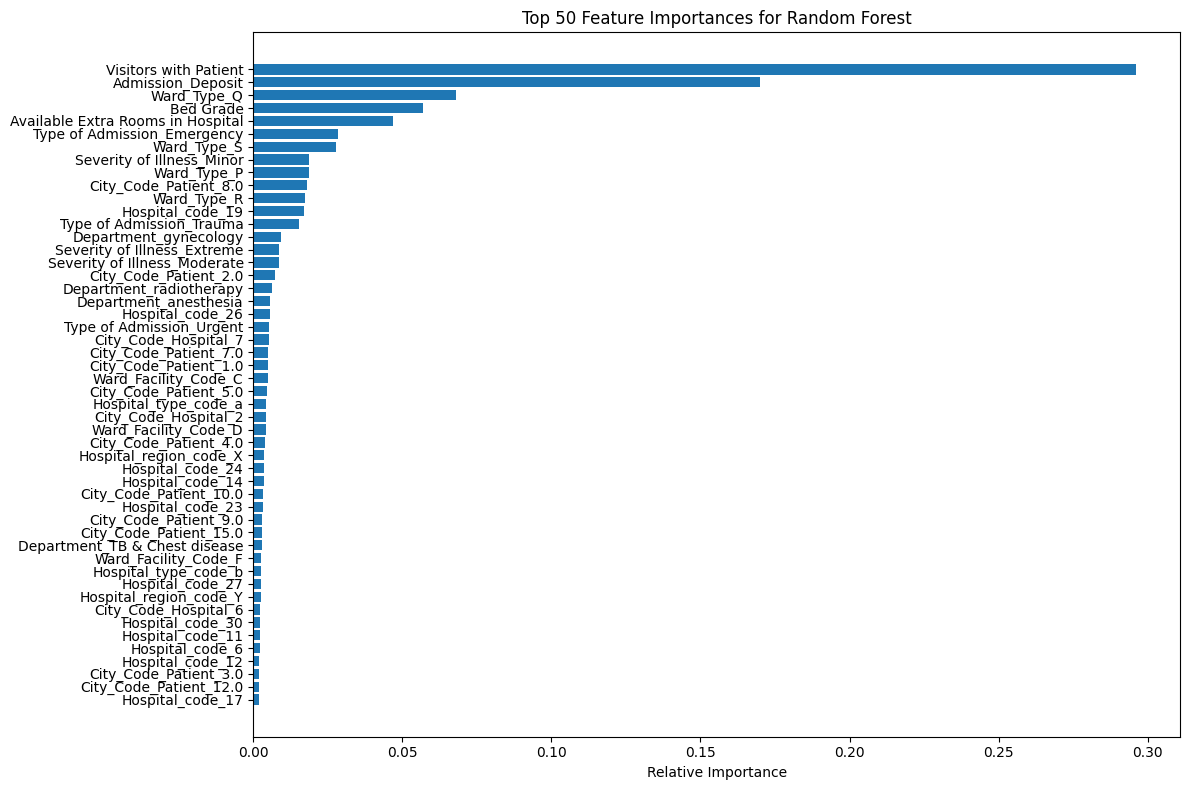

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
rf_pipeline_no_gpu = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier(random_state=42,
                                                             max_depth=14,
                                                             max_features=0.8876821894139413,
                                                             min_samples_leaf=2,
                                                             min_samples_split=5,
                                                             n_estimators=109))])

# Fit the model with the best parameters
rf_pipeline_no_gpu.fit(X_train, y_train)

# Evaluate the model
print(f"Train Accuracy: {rf_pipeline_no_gpu.score(X_train, y_train)}")
print(f"Test Accuracy: {rf_pipeline_no_gpu.score(X_test, y_test)}")

# Feature Importance
def plot_feature_importance(model, feature_names, top_n=30):
    importances = model.named_steps['model'].feature_importances_
    indices = np.argsort(importances)[-top_n:]  # Select top_n features
    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances for Random Forest')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Plot top 30 feature importance for Gradient Boosting
plot_feature_importance(rf_pipeline_no_gpu, feature_names, top_n=50)

Train Accuracy: 0.4192855740922473
Test Accuracy: 0.4162008541640497

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.12      0.18      4689
           1       0.42      0.50      0.45     15561
           2       0.43      0.66      0.52     17603
           3       0.41      0.15      0.22     10981
           4       0.18      0.00      0.00      2357
           5       0.39      0.56      0.46      7128
           6       0.00      0.00      0.00       554
           7       0.36      0.01      0.02      2031
           8       0.31      0.20      0.24       941
           9       0.31      0.01      0.03       552
          10       0.51      0.41      0.45      1291

    accuracy                           0.42     63688
   macro avg       0.34      0.24      0.24     63688
weighted avg       0.40      0.42      0.37     63688


Confusion Matrix:
 [[  558  2393  1703    21     1    13     0     0     0     0     0]
 [  

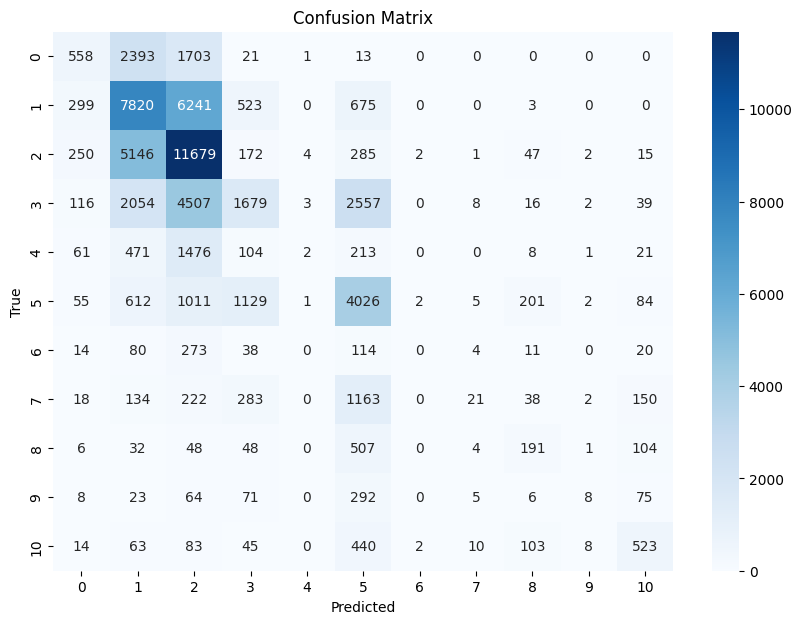

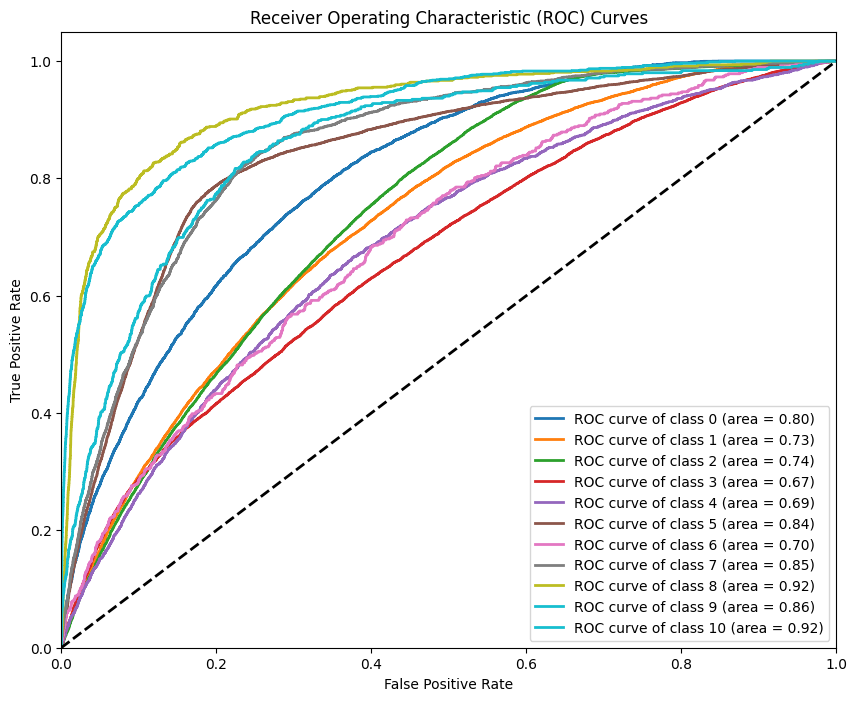

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingClassifier(random_state=42))])

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Train Accuracy: {gb_pipeline.score(X_train, y_train)}")
print(f"Test Accuracy: {gb_pipeline.score(X_test, y_test)}")

# Predict the test set
y_pred = gb_pipeline.predict(X_test)
y_pred_proba = gb_pipeline.predict_proba(X_test)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC-AUC curves for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


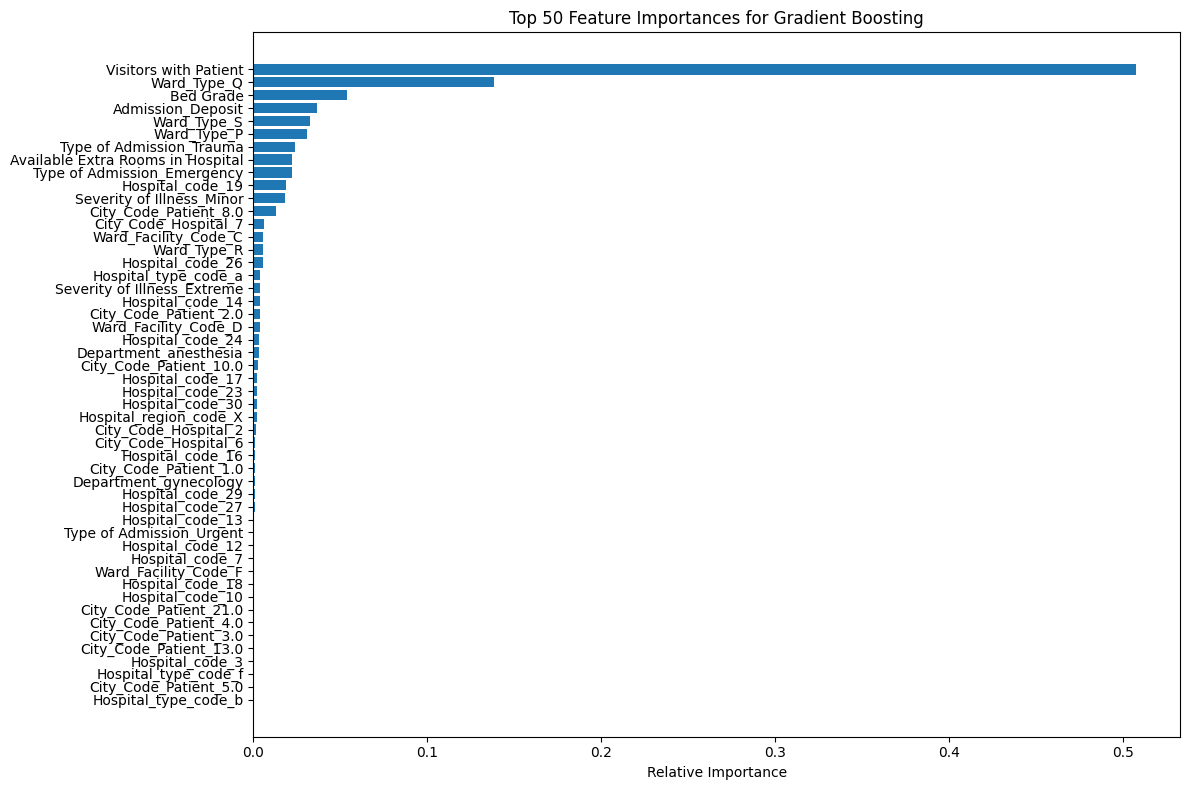

In [ ]:
# Feature Importance
def plot_feature_importance(model, feature_names, top_n=30):
    importances = model.named_steps['model'].feature_importances_
    indices = np.argsort(importances)[-top_n:]  # Select top_n features
    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances for Gradient Boosting')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Plot top 30 feature importance for Gradient Boosting
plot_feature_importance(gb_pipeline, feature_names, top_n=50)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


0:	learn: 0.3833719	test: 0.3835573	best: 0.3835573 (0)	total: 124ms	remaining: 20m 43s
100:	learn: 0.4277409	test: 0.4215551	best: 0.4218534 (94)	total: 3.48s	remaining: 5m 40s
200:	learn: 0.4370128	test: 0.4257160	best: 0.4257474 (199)	total: 5.84s	remaining: 4m 44s
300:	learn: 0.4444828	test: 0.4269564	best: 0.4269564 (300)	total: 10.9s	remaining: 5m 50s
400:	learn: 0.4509244	test: 0.4277258	best: 0.4279142 (378)	total: 14.2s	remaining: 5m 39s
500:	learn: 0.4562041	test: 0.4279456	best: 0.4281340 (498)	total: 16.5s	remaining: 5m 13s
600:	learn: 0.4609539	test: 0.4281026	best: 0.4281497 (594)	total: 19s	remaining: 4m 56s
700:	learn: 0.4659117	test: 0.4277572	best: 0.4283696 (627)	total: 25s	remaining: 5m 32s
800:	learn: 0.4706654	test: 0.4272076	best: 0.4283696 (627)	total: 33.8s	remaining: 6m 27s
bestTest = 0.4283695516
bestIteration = 627
Shrink model to first 628 iterations.
CatBoost Train Accuracy: 0.4623277723258096
CatBoost Test Accuracy: 0.4283695515638739

Classification Repo

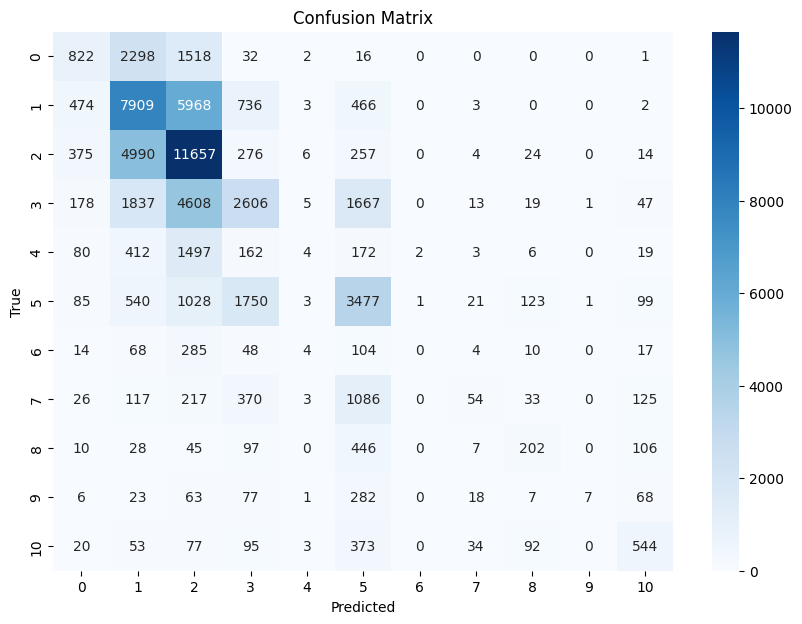

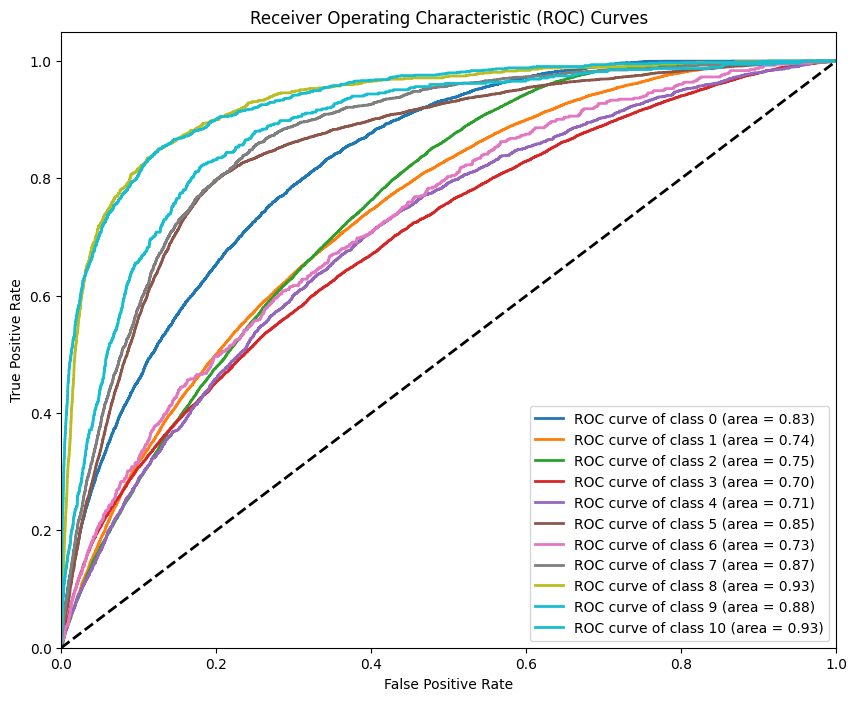

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize and train CatBoost model
cat_model = CatBoostClassifier(
    n_estimators=10000,
    random_state=42,
    eval_metric='Accuracy',
    learning_rate=0.08,
    depth=8,
    bagging_temperature=0.3,
    task_type='GPU'
)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, early_stopping_rounds=200)

# Evaluate CatBoost model
print(f"CatBoost Train Accuracy: {cat_model.score(X_train, y_train)}")
print(f"CatBoost Test Accuracy: {cat_model.score(X_test, y_test)}")

# Predict the test set
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC-AUC curves for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


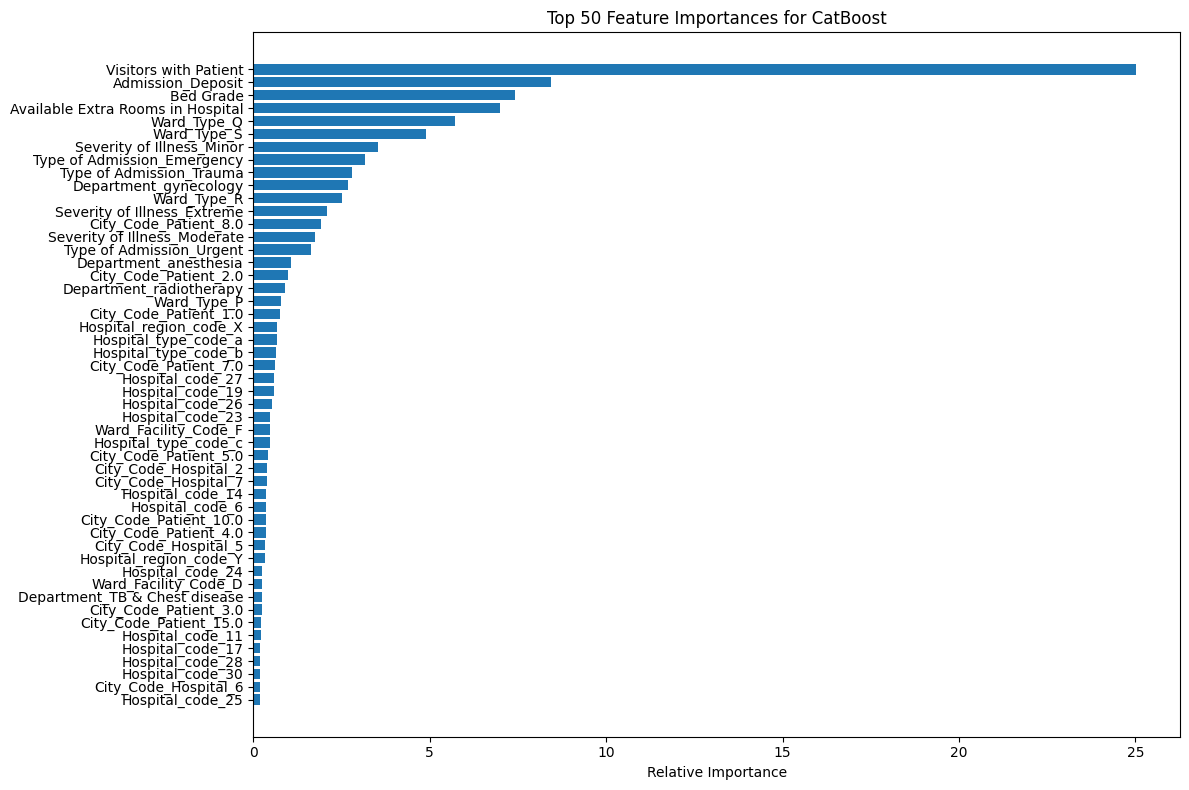

In [ ]:
# Plot feature importance for CatBoost
def plot_catboost_feature_importance(model, feature_names, top_n=30):
    importances = model.get_feature_importance()
    indices = np.argsort(importances)[-top_n:]  # Select top_n features
    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances for CatBoost')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_feature_names, cat_feature_names])

plot_catboost_feature_importance(cat_model, feature_names, top_n=50)

[0]	validation_0-mlogloss:2.09634
[99]	validation_0-mlogloss:1.50458
XGBoost Train Accuracy: 0.4579784102060844
XGBoost Test Accuracy: 0.4241458359502575


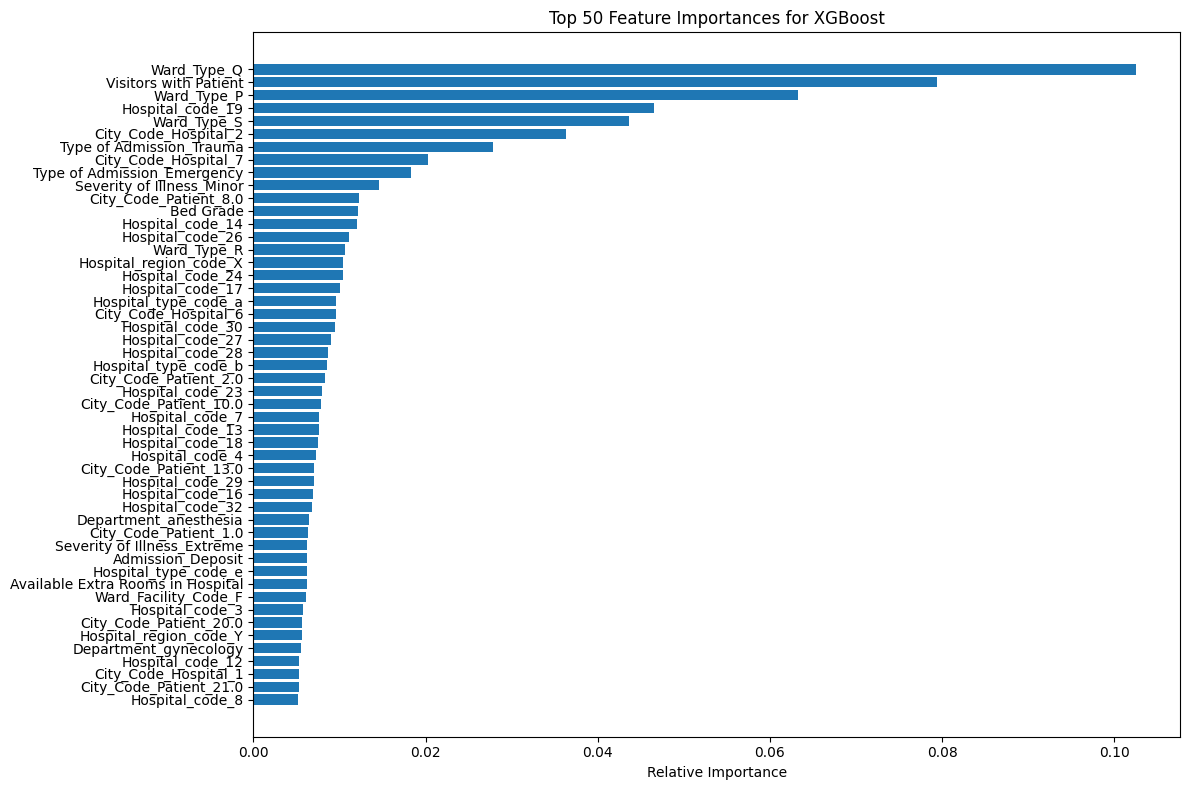


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.17      0.24      4689
           1       0.43      0.50      0.46     15561
           2       0.43      0.66      0.52     17603
           3       0.42      0.22      0.29     10981
           4       0.19      0.00      0.01      2357
           5       0.41      0.50      0.45      7128
           6       0.14      0.00      0.00       554
           7       0.34      0.04      0.07      2031
           8       0.33      0.19      0.24       941
           9       0.44      0.02      0.04       552
          10       0.53      0.41      0.46      1291

    accuracy                           0.42     63688
   macro avg       0.37      0.25      0.25     63688
weighted avg       0.41      0.42      0.39     63688


Confusion Matrix:
 [[  808  2259  1567    25     8    19     0     1     0     0     2]
 [  452  7737  6140   713     3   504     1     5     5     0     1]
 [  

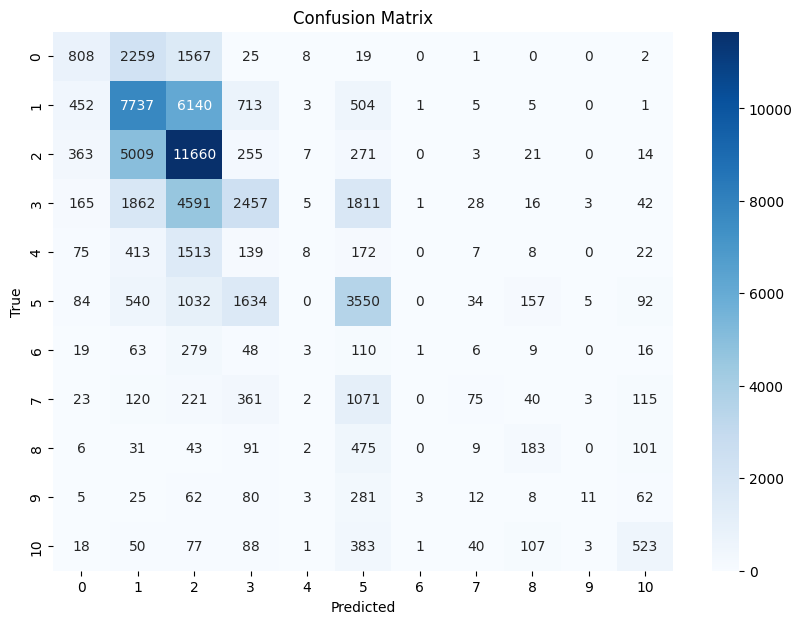

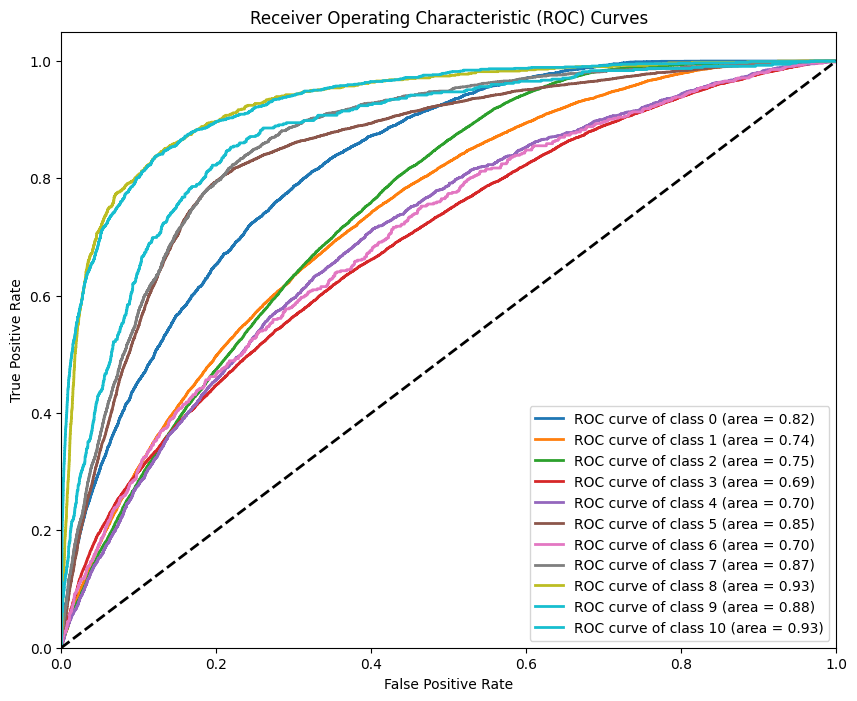

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    eval_metric='mlogloss',
    objective='multi:softmax',
    random_state=42,
    tree_method='hist',
    device='cuda'
)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

# Evaluate XGBoost model
print(f"XGBoost Train Accuracy: {xgb_model.score(X_train, y_train)}")
print(f"XGBoost Test Accuracy: {xgb_model.score(X_test, y_test)}")

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-50:]
    plt.figure(figsize=(12, 8))
    plt.title(f'Top 50 Feature Importances for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Plot feature importance for XGBoost
plot_feature_importance(xgb_model, feature_names, 'XGBoost')

# Predict the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC-AUC curves for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


Baseline Model Train Accuracy: 0.2743395485770363
Baseline Model Test Accuracy: 0.27639429719884434
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4689
           1       0.00      0.00      0.00     15561
           2       0.28      1.00      0.43     17603
           3       0.00      0.00      0.00     10981
           4       0.00      0.00      0.00      2357
           5       0.00      0.00      0.00      7128
           6       0.00      0.00      0.00       554
           7       0.00      0.00      0.00      2031
           8       0.00      0.00      0.00       941
           9       0.00      0.00      0.00       552
          10       0.00      0.00      0.00      1291

    accuracy                           0.28     63688
   macro avg       0.03      0.09      0.04     63688
weighted avg       0.08      0.28      0.12     63688



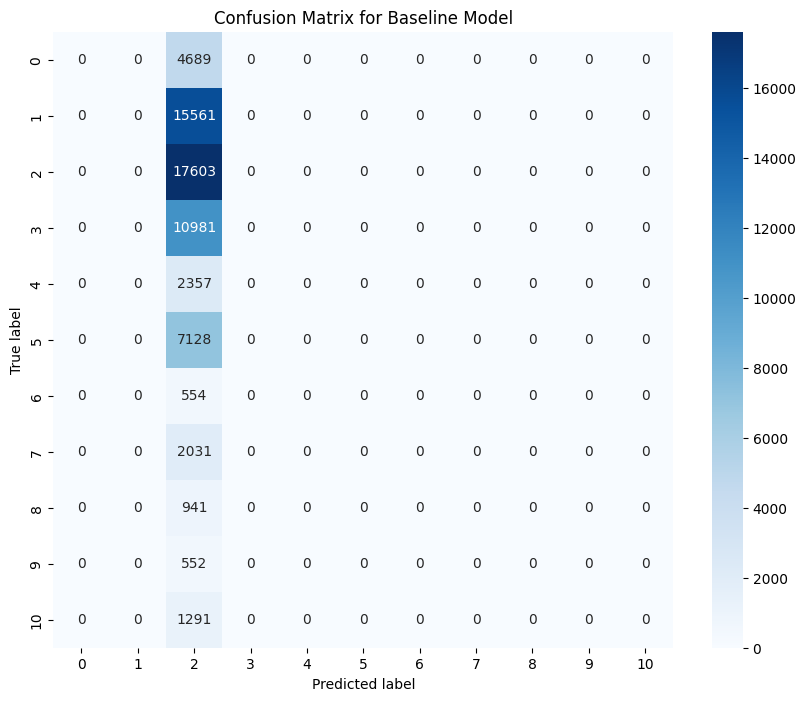

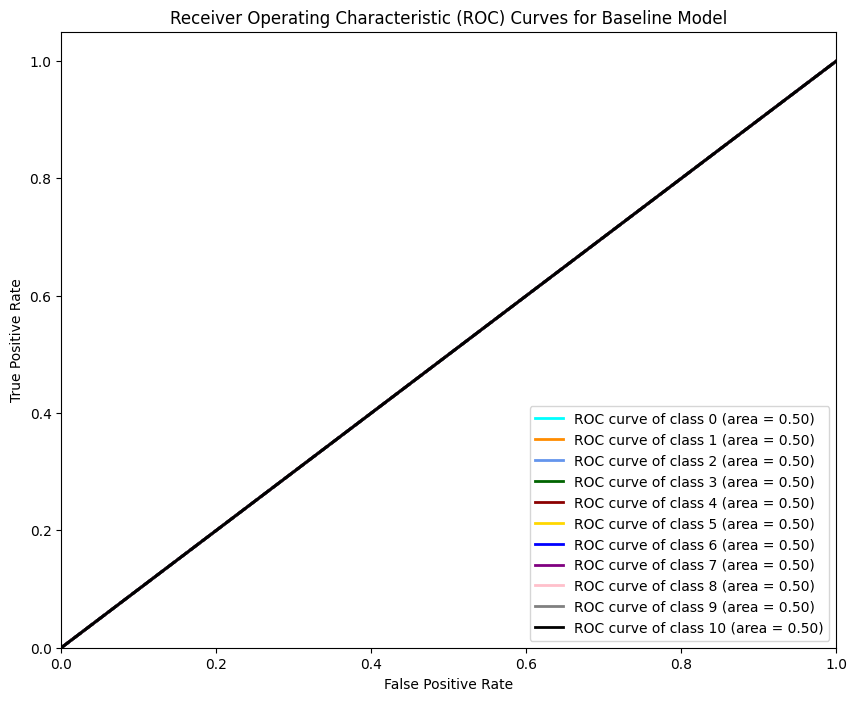

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the baseline model pipeline
dummy_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DummyClassifier(strategy='most_frequent'))])

# Fit the baseline model
dummy_pipeline.fit(X_train, y_train)

# Evaluate the baseline model
y_pred = dummy_pipeline.predict(X_test)
y_proba = dummy_pipeline.predict_proba(X_test)

print(f"Baseline Model Train Accuracy: {dummy_pipeline.score(X_train, y_train)}")
print(f"Baseline Model Test Accuracy: {dummy_pipeline.score(X_test, y_test)}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Baseline Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC-AUC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(le.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC-AUC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen', 'darkred', 'gold', 'blue', 'purple', 'pink', 'grey', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Baseline Model')
plt.legend(loc="lower right")
plt.show()


Logistic Regression Train Accuracy: 0.3989205062389374
Logistic Regression Test Accuracy: 0.400452196598053
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.08      0.14      4689
           1       0.40      0.47      0.44     15561
           2       0.42      0.66      0.51     17603
           3       0.32      0.20      0.25     10981
           4       0.00      0.00      0.00      2357
           5       0.38      0.48      0.43      7128
           6       0.00      0.00      0.00       554
           7       1.00      0.00      0.00      2031
           8       0.00      0.00      0.00       941
           9       0.00      0.00      0.00       552
          10       0.52      0.36      0.43      1291

    accuracy                           0.40     63688
   macro avg       0.32      0.21      0.20     63688
weighted avg       0.39      0.40      0.36     63688

Confusion Matrix:
[[  390  2349  1812   131     0     7 

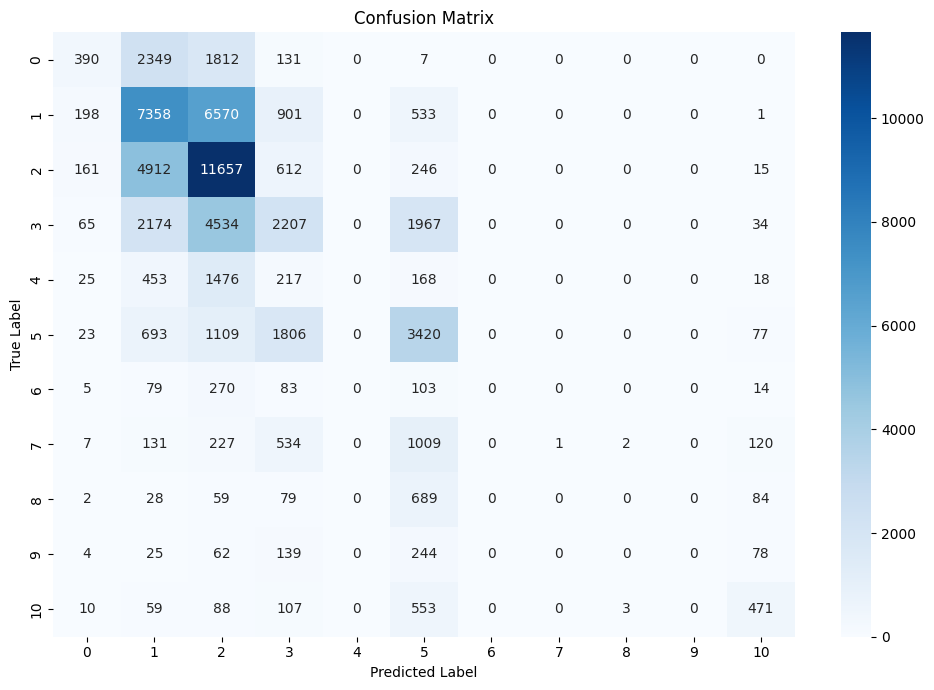

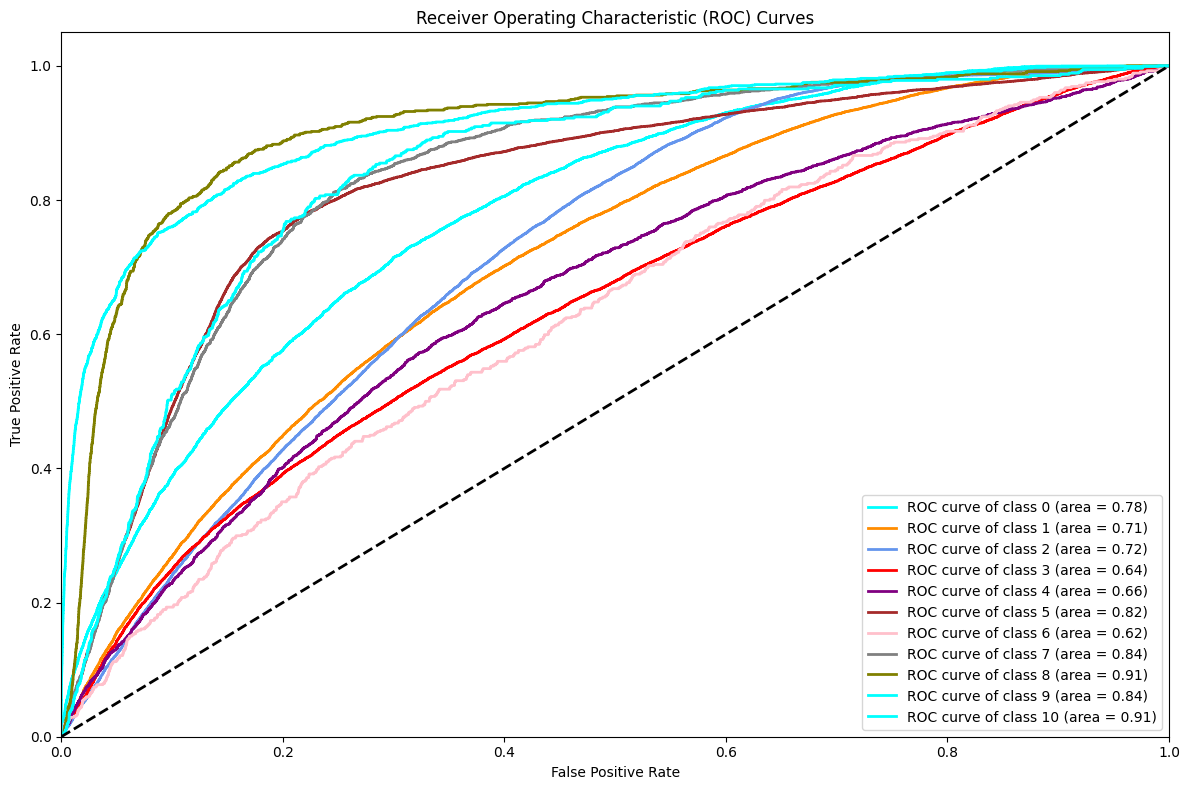

In [ ]:
import pandas as pd
import numpy as np
from cuml.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Load your data into a DataFrame (df)
# For example: df = pd.read_csv('your_data.csv')

# Encode target variable
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression model with cuML
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LogisticRegression())])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Logistic Regression Train Accuracy: {log_reg_pipeline.score(X_train, y_train)}")
print(f"Logistic Regression Test Accuracy: {log_reg_pipeline.score(X_test, y_test)}")

# Classification report
y_pred = log_reg_pipeline.predict(X_test)
print("Classification Report:")
# Convert the integer labels to strings
target_names = [str(i) for i in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_prob = log_reg_pipeline.predict_proba(X_test)
n_classes = y_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curves for each class in a single plot
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


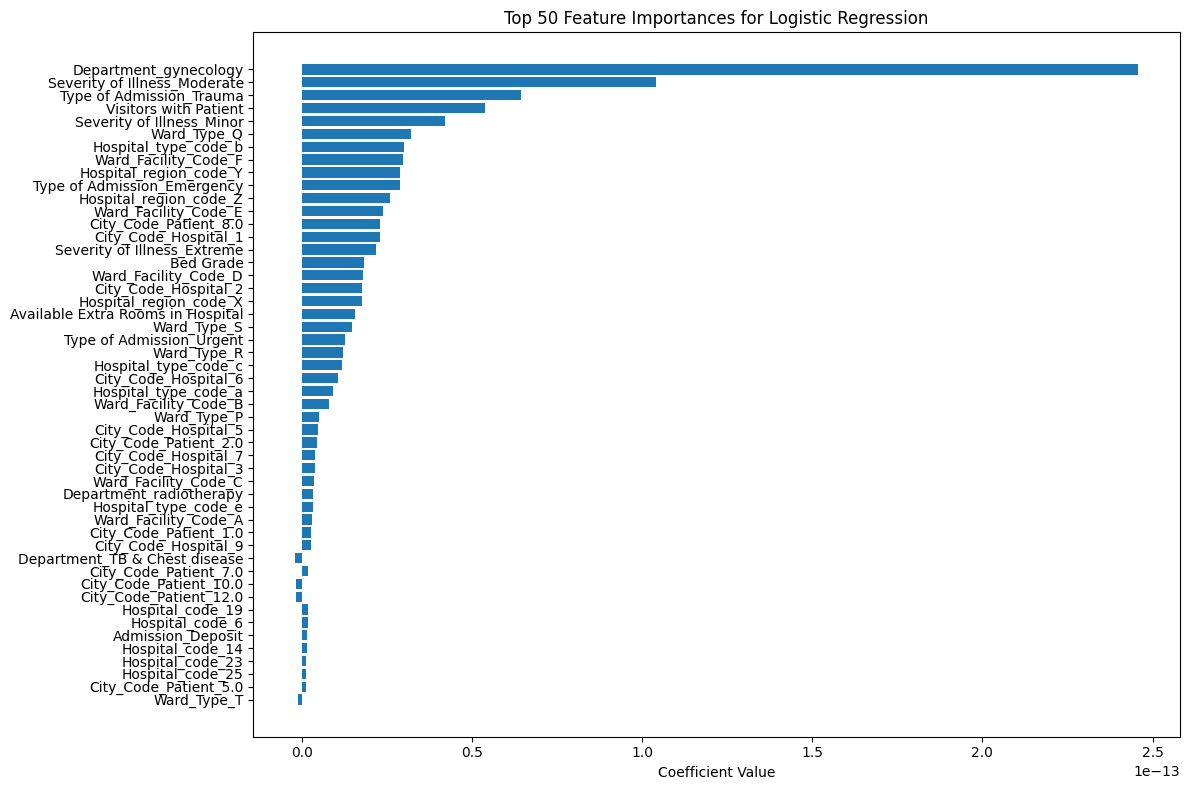

In [ ]:
# Feature Importance for Logistic Regression
def plot_logistic_regression_coefficients(model, feature_names, top_n=50):
    coefficients = model.named_steps['model'].coef_
    average_coefficients = np.mean(coefficients, axis=0)  # Average coefficients across all classes
    indices = np.argsort(np.abs(average_coefficients))  # Sort by absolute value of coefficients

    # Select top N features
    top_indices = indices[-top_n:]

    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances for Logistic Regression')
    plt.barh(range(len(top_indices)), average_coefficients[top_indices], align='center')
    plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Plot feature importance for top 50 features
plot_logistic_regression_coefficients(log_reg_pipeline, feature_names, top_n=50)


Logistic Regression Train Accuracy: 0.3992855740922473
Logistic Regression Test Accuracy: 0.40114307247833186
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.09      0.14      4689
           1       0.40      0.47      0.44     15561
           2       0.42      0.66      0.51     17603
           3       0.33      0.20      0.25     10981
           4       0.00      0.00      0.00      2357
           5       0.38      0.48      0.43      7128
           6       0.00      0.00      0.00       554
           7       1.00      0.00      0.00      2031
           8       0.00      0.00      0.00       941
           9       0.00      0.00      0.00       552
          10       0.52      0.37      0.43      1291

    accuracy                           0.40     63688
   macro avg       0.32      0.21      0.20     63688
weighted avg       0.39      0.40      0.36     63688

Confusion Matrix:
[[  402  2340  1808   131     0     

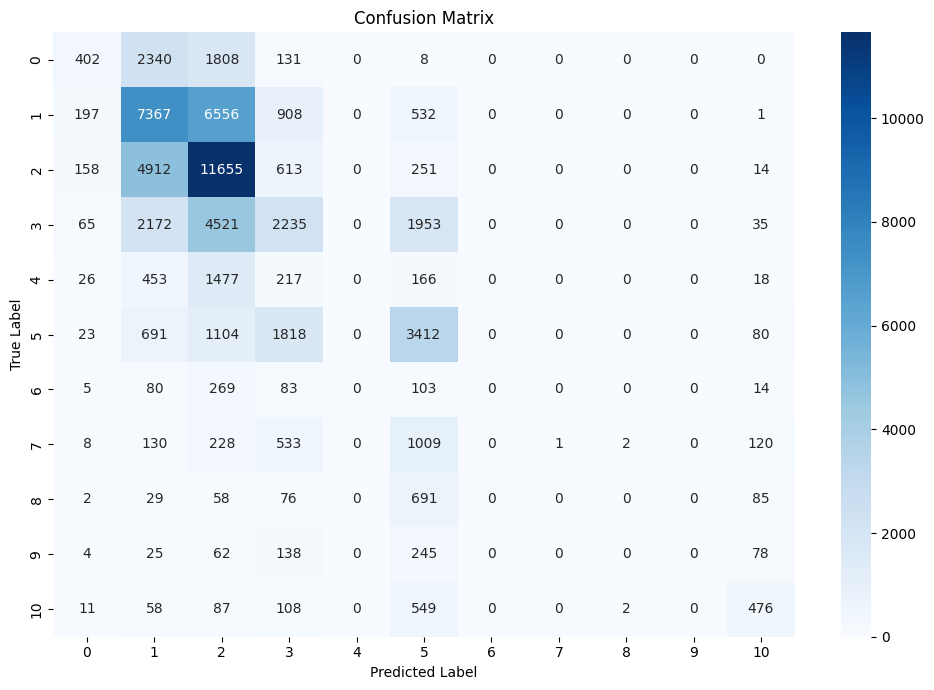

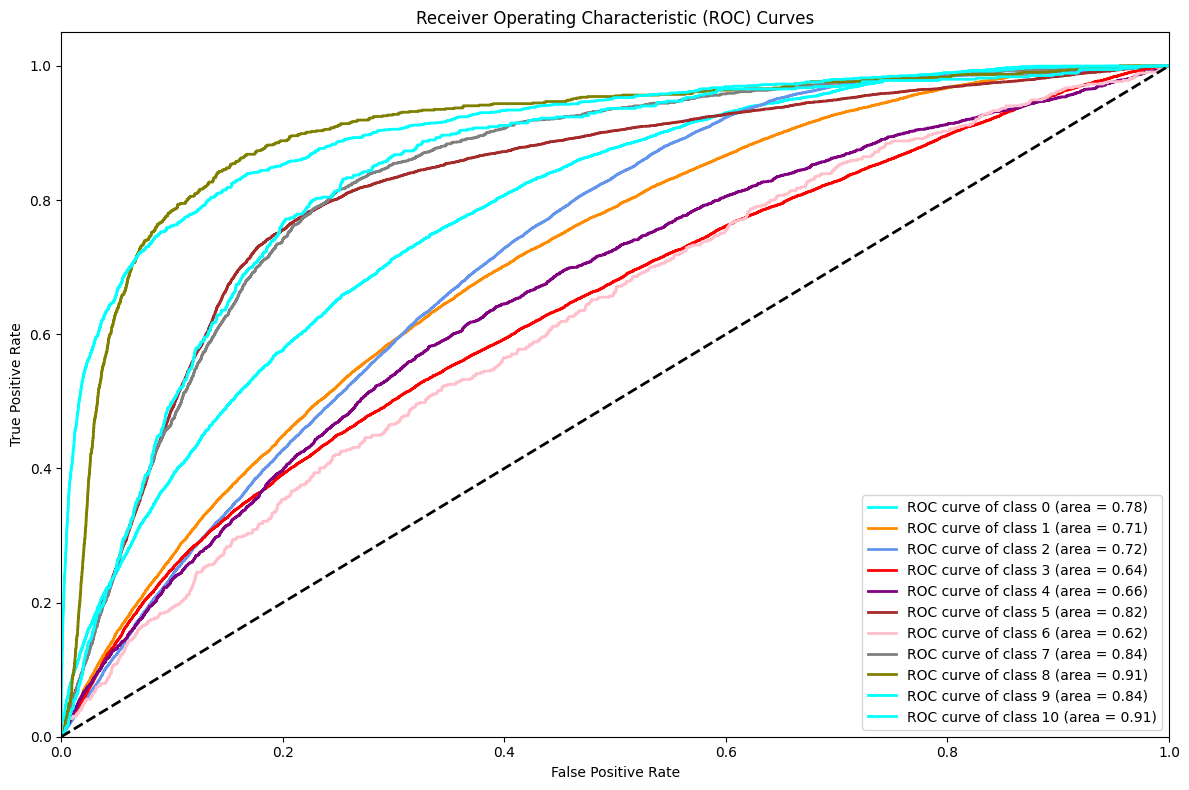

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

# Identify categorical and numerical features
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Load your data into a DataFrame (df)
# For example: df = pd.read_csv('your_data.csv')

# Encode target variable
le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression model with cuML
log_reg_pipeline_lbfgs = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))])

# Train the model
log_reg_pipeline_lbfgs.fit(X_train, y_train)

# Evaluate the model
print(f"Logistic Regression Train Accuracy: {log_reg_pipeline_lbfgs.score(X_train, y_train)}")
print(f"Logistic Regression Test Accuracy: {log_reg_pipeline_lbfgs.score(X_test, y_test)}")

# Classification report
y_pred = log_reg_pipeline_lbfgs.predict(X_test)
print("Classification Report:")
# Convert the integer labels to strings
target_names = [str(i) for i in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_prob = log_reg_pipeline_lbfgs.predict_proba(X_test)
n_classes = y_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curves for each class in a single plot
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


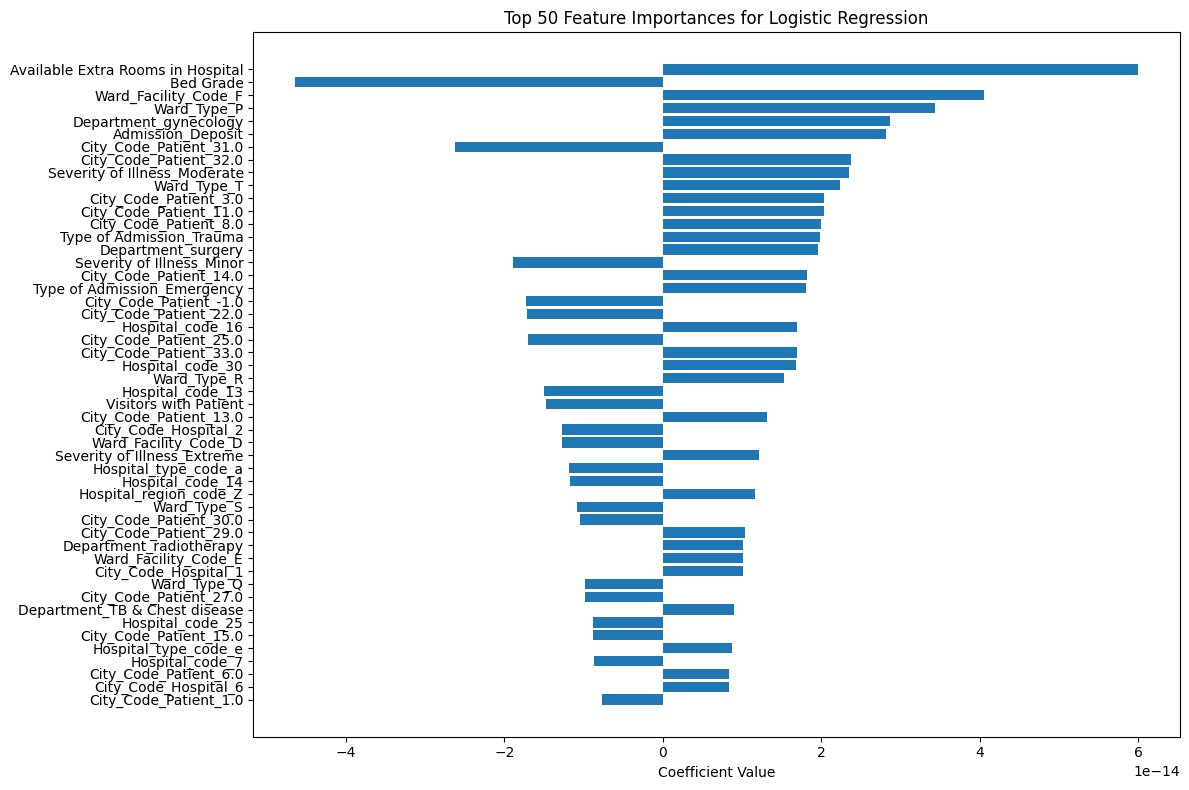

In [ ]:
# Feature Importance for Logistic Regression
def plot_logistic_regression_coefficients(model, feature_names, top_n=50):
    coefficients = model.named_steps['model'].coef_
    average_coefficients = np.mean(coefficients, axis=0)  # Average coefficients across all classes
    indices = np.argsort(np.abs(average_coefficients))  # Sort by absolute value of coefficients

    # Select top N features
    top_indices = indices[-top_n:]

    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances for Logistic Regression')
    plt.barh(range(len(top_indices)), average_coefficients[top_indices], align='center')
    plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

# Get the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Plot feature importance for top 50 features
plot_logistic_regression_coefficients(log_reg_pipeline_lbfgs, feature_names, top_n=50)


### Insights from Feature Importance and EDA

#### Key Features Across Multiple Models

1. **Visitors with Patient**:
   - **Feature Importance**: Highly ranked in XGBoost, CatBoost, Gradient Boosting, and Random Forest models.
   - **EDA**: Distribution analysis showed a normal-like distribution with most patients having a moderate number of visitors.
   
2. **Admission Deposit**:
   - **Feature Importance**: One of the top features in CatBoost, Gradient Boosting, and Random Forest models.
   - **EDA**: Displayed a right-skewed distribution, indicating most patients have lower deposits with a few having very high deposits.

3. **Ward_Type_Q**:
   - **Feature Importance**: Highly ranked in XGBoost, CatBoost, Gradient Boosting, and Random Forest models.
   - **EDA**: Showed varying frequencies across different categories, with 'Ward_Type_Q' being one of the significant categories.

4. **Available Extra Rooms in Hospital**:
   - **Feature Importance**: Important in CatBoost and Random Forest models.
   - **EDA**: Showed a roughly uniform distribution with some peaks, indicating varied availability across hospitals.

5. **Bed Grade**:
   - **Feature Importance**: Significant in CatBoost, Gradient Boosting, and Random Forest models.
   - **EDA**: The majority of data concentrated around specific bed grades.

6. **Severity of Illness (Minor, Moderate, Extreme)**:
   - **Feature Importance**: Various levels of severity are significant in multiple models.
   - **EDA**: Showed distinct distributions with 'Moderate' and 'Minor' being more common categories.

7. **Type of Admission (Trauma, Emergency)**:
   - **Feature Importance**: Important in XGBoost, CatBoost, and Gradient Boosting models.
   - **EDA**: Categories like 'Emergency' and 'Trauma' had notable frequencies.

8. **Department (Gynecology, Anesthesia)**:
   - **Feature Importance**: Significant in Logistic Regression models.
   - **EDA**: 'Gynecology' was one of the most common departments.

9. **City_Code_Patient (Various)**:
   - **Feature Importance**: Various city codes are significant in different models.
   - **EDA**: Showed a wide spread, indicating patients come from many different city codes.

#### Concordance Between EDA and Feature Importance:
1. **Visitors with Patient**:
   - Both EDA and feature importance analyses highlight its significance, showing a strong impact on patient stay length.

2. **Admission Deposit**:
   - Recognized as a critical feature by both analyses, with higher deposits potentially indicating shorter stays.

3. **Ward Types**:
   - EDA highlighted the distribution of ward types, and feature importance confirms the significance of specific ward types like 'Ward_Type_Q'.

4. **Severity of Illness**:
   - The distribution and impact of different severity levels are validated by their importance across multiple models.

5. **Department and City Code**:
   - EDA showed the distribution of patients across various departments and city codes, and these features' importance in multiple models underscores their relevance.

### Conclusion:
The EDA insights are well-supported by the feature importance analysis across various models. This concordance reinforces the reliability of the identified key features, providing a robust basis for predictive modeling and further analysis. Would you like to proceed with any specific action based on these insights?

# Neural Network Modelling

In [12]:
!pip install tensorflow keras-tuner[bayesian] tqdm shap

In this Neural Network studies, we will try neural network architectures:
- Mixed Architecture with Embedding and LSTM Layers

#### This pipeline increases the number of dense layers

#### Select K Best and SMOTE + Focus Range of Best Hyperparameter So Far.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from keras_tuner import BayesianOptimization
import shap
from sklearn.compose import ColumnTransformer


# Define features and target
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness', 'Age']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_res = preprocessor.fit_transform(X).toarray()  # Convert to dense array

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_res, y_encoded)

# Define the model building function
def build_model(hp):
    input_shape = X_resampled.shape[1]

    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.Input(shape=(input_shape,)))

    # Embedding layer
    embedding_dim = hp.Int('embedding_dim', 64, 128, step=32)
    model.add(keras.layers.Dense(embedding_dim, activation='relu'))

    # Reshape for LSTM
    model.add(keras.layers.Reshape((1, embedding_dim)))

    # LSTM layer
    lstm_units = hp.Int('lstm_units', 96, 160, step=32)
    model.add(keras.layers.LSTM(lstm_units, return_sequences=False))

    # Dense layers
    units_0 = hp.Int('units_0', 384, 448, step=32)
    model.add(keras.layers.Dense(units_0, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    units_1 = hp.Int('units_1', 352, 416, step=32)
    model.add(keras.layers.Dense(units_1, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    dropout_rate = hp.Float('dropout', 0.05, 0.2, step=0.05)
    model.add(keras.layers.Dropout(dropout_rate))

    units_2 = hp.Int('units_2', 224, 288, step=32)
    model.add(keras.layers.Dense(units_2, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    # Output layer
    model.add(keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'))

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-5, 5e-5, sampling='log')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Set up the tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    directory='keras_tuner',
    project_name='/content/drive/MyDrive/UC Berkeley MA AI /capstone_project/Final Submissions/neural_network_modelling/selected_feature_LSTM_final_try'
)

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

for fold, (train_index, val_index) in enumerate(skf.split(X_resampled, y_resampled)):
    X_train_fold, X_val_fold = X_resampled[train_index], X_resampled[val_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[val_index]

    tuner.search(
        X_train_fold, y_train_fold,
        epochs=100,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        batch_size=128
    )

    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate
    val_loss, val_accuracy = best_model.evaluate(X_val_fold, y_val_fold)
    print(f'Fold {fold + 1} - Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]



Trial 15 Complete [01h 17m 51s]
val_accuracy: 0.719115138053894

Best val_accuracy So Far: 0.7487232685089111
Total elapsed time: 20h 03m 42s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 40 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6016/6016 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.5704 - loss: 1.1178
Fold 1 - Val Loss: 0.6789, Val Accuracy: 0.7487
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6736 - loss: 0.8118
Fold 2 - Val Loss: 0.4736, Val Accuracy: 0.8178
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6751 - loss: 0.8085
Fold 3 - Val Loss: 0.4717, Val Accuracy: 0.8187
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6709 - loss: 0.8139
Fold 4 - Val Loss: 0.4739, Val Accuracy: 0.8174
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6722 - loss: 0.8101
Fold 5 - Val Loss: 0.4713, Val Accuracy: 0.8182


#### Found the Best Hyperperameters

In [16]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 160)                 │         184,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 416)                 │          66,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 416)                 │           1,664 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 352)                 │         146,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 352)                 │           1,408 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 352)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 288)                 │         101,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 288)                 │           1,152 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │           3,179 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,171 (2.00 MB)

 Trainable params: 522,059 (1.99 MB)

 Non-trainable params: 2,112 (8.25 KB)

### Save the best Model

In [ ]:
# Optional: Save the model
best_model.save('/content/drive/MyDrive/UC Berkeley MA AI /capstone_project/Final Submissions/neural_network_modelling/hospital_stay_prediction_model_2.keras')

### Loading the Best Hyperparameters Model and Run (ROC-AUC, SHAP, Confusion Matrix and Classification Report)

In [13]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from keras_tuner import BayesianOptimization
import shap
from sklearn.compose import ColumnTransformer


# Define features and target
categorical_features = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                        'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
                        'Severity of Illness', 'Age']

numerical_features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Visitors with Patient']

le = LabelEncoder()
df['Stay'] = le.fit_transform(df['Stay'])

X = df.drop(columns=['Stay'], axis=1)
y = df['Stay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_res = preprocessor.fit_transform(X).toarray()  # Convert to dense array

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_res, y_encoded)

def create_best_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        keras.layers.Dense(128, activation='relu'),  # embedding_dim
        keras.layers.Reshape((1, 128)),
        keras.layers.LSTM(160, return_sequences=False),  # lstm_units
        keras.layers.Dense(416, activation='relu'),  # units_0
        keras.layers.BatchNormalization(),
        keras.layers.Dense(352, activation='relu'),  # units_1
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.1),  # dropout
        keras.layers.Dense(288, activation='relu'),  # units_2
        keras.layers.BatchNormalization(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=4.5604e-05)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
input_shape = X_resampled.shape[1]
num_classes = len(np.unique(y_resampled))
best_model = create_best_model(input_shape, num_classes)

# Load the weights from the saved model
best_model.load_weights('/content/drive/MyDrive/UC Berkeley MA AI /capstone_project/Final Submissions/neural_network_modelling/hospital_stay_prediction_model_2.keras')


Fold 1/5
6016/6016 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

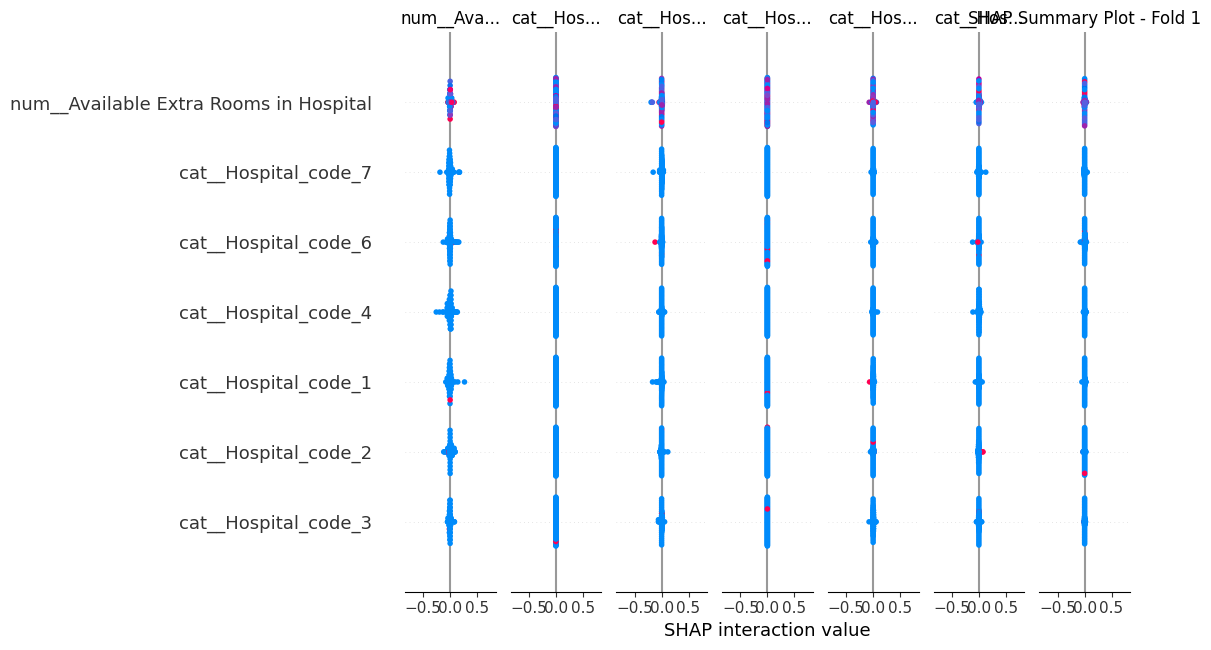

Fold 1 - Validation Accuracy: 0.7487, Validation Loss: 0.6789
Fold 2/5
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7050/7050 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7044/7044 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

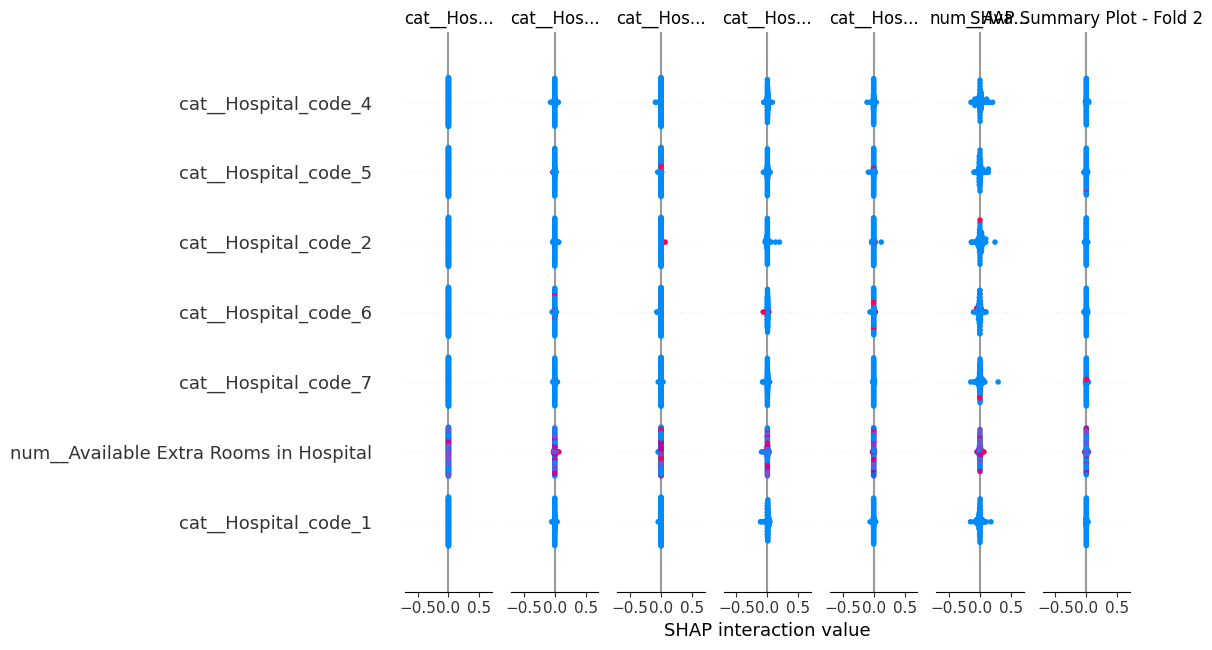

Fold 2 - Validation Accuracy: 0.8178, Validation Loss: 0.4736
Fold 3/5
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7007/7007 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6994/6994 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7000/7000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

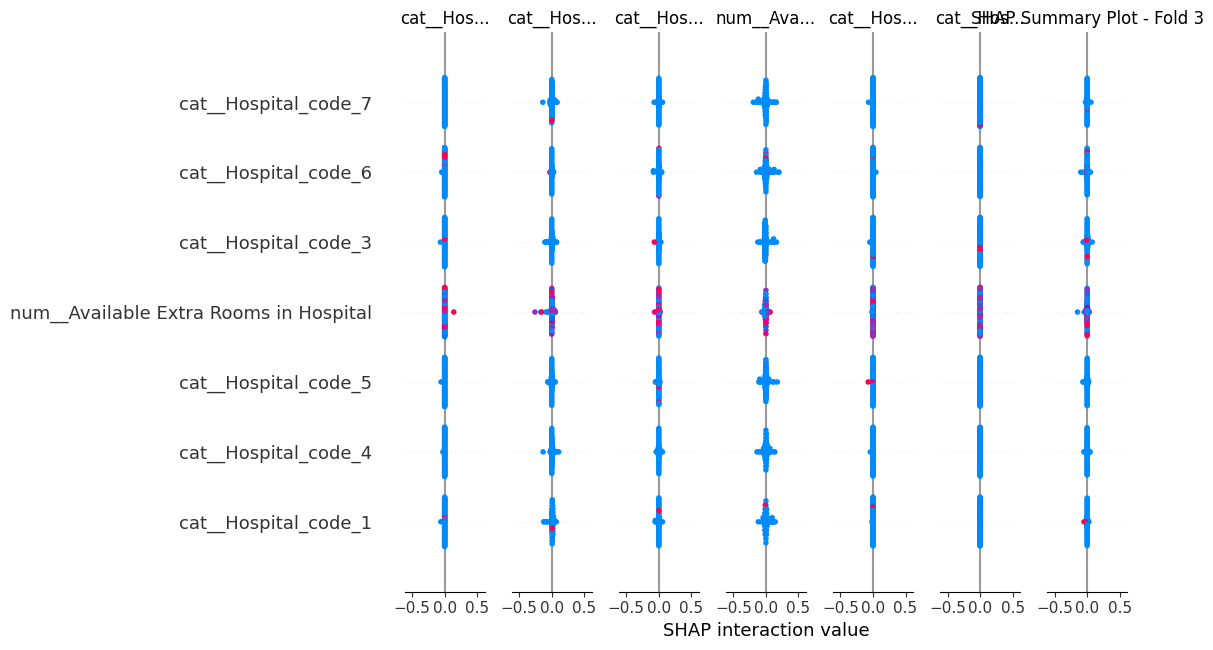

Fold 3 - Validation Accuracy: 0.8187, Validation Loss: 0.4717
Fold 4/5
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7013/7013 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

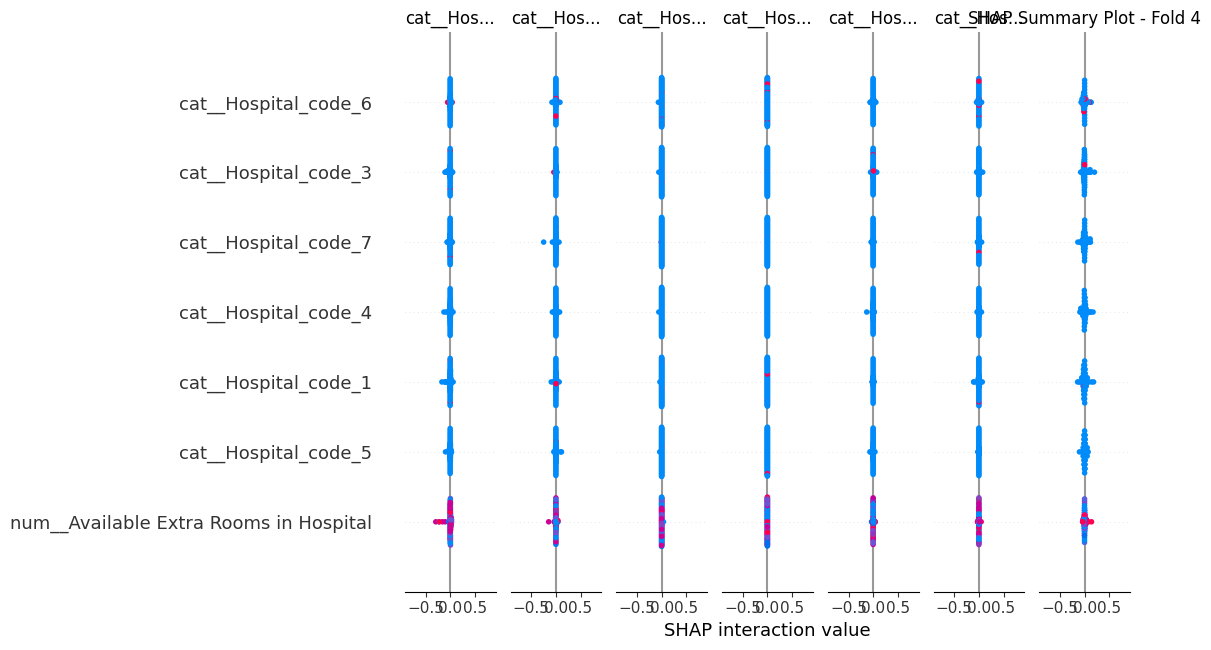

Fold 4 - Validation Accuracy: 0.8174, Validation Loss: 0.4739
Fold 5/5
6015/6015 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7038/7038 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

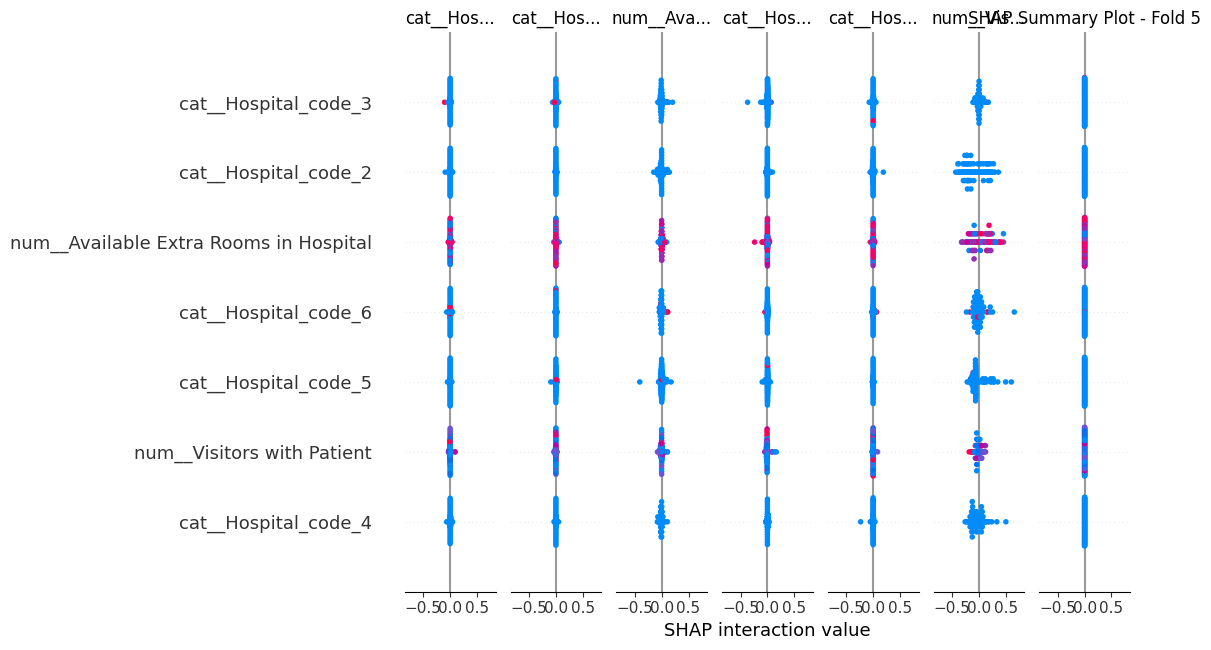

Fold 5 - Validation Accuracy: 0.8182, Validation Loss: 0.4713

Average Validation Accuracy: 0.8042
Average Validation Loss: 0.5139


In [18]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Set up stratified k-fold
n_splits = 5  # You can adjust this number
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
fold_accuracies = []
fold_losses = []
all_predictions = []
all_true_labels = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_resampled, y_resampled)):
    print(f"Fold {fold + 1}/{n_splits}")

    X_val_fold, y_val_fold = X_resampled[val_index], y_resampled[val_index]

    # Evaluate the model
    val_loss, val_accuracy = best_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)

    # Get predictions for ROC-AUC calculation
    y_pred_proba = best_model.predict(X_val_fold)
    all_predictions.append(y_pred_proba)
    all_true_labels.append(y_val_fold)

    # SHAP analysis for this fold
    def f(X):
        X = np.array(X)
        X_reshaped = X.reshape((X.shape[0], X.shape[1]))
        return best_model.predict(X_reshaped)

    # Select background samples
    background_size = min(100, X_val_fold.shape[0])
    background_indices = np.random.choice(X_val_fold.shape[0], background_size, replace=False)
    background = X_val_fold[background_indices]

    # Create the explainer
    explainer = shap.KernelExplainer(f, background)

    # Select samples for SHAP values calculation
    sample_size = min(100, X_val_fold.shape[0])
    sample_indices = np.random.choice(X_val_fold.shape[0], sample_size, replace=False)
    X_test_sample = X_val_fold[sample_indices]

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)

    # Get feature names
    feature_names = preprocessor.get_feature_names_out()

    # Create and display the SHAP summary plot for this fold
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
    plt.title(f"SHAP Summary Plot - Fold {fold + 1}")
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# Calculate average performance
average_accuracy = np.mean(fold_accuracies)
average_loss = np.mean(fold_losses)

print(f"\nAverage Validation Accuracy: {average_accuracy:.4f}")
print(f"Average Validation Loss: {average_loss:.4f}")



Certainly! I'll interpret the results based on the SHAP summary plots for each fold and the overall performance metrics you've provided.

1. Model Performance:
   - The model shows consistent performance across folds 2-5, with accuracies around 81-82%.
   - Fold 1 has a notably lower accuracy (74.87%) compared to the others, which might indicate some variability in the data or model sensitivity to certain subsets.
   - The average validation accuracy of 80.42% suggests the model is performing well, but there's still room for improvement.
   - The average validation loss of 0.5139 is relatively low, indicating good model confidence in its predictions.

2. Feature Importance (based on SHAP values):
   - Across all folds, hospital codes (cat_Hospital_code_X) are consistently among the most important features. This suggests that the specific hospital has a strong influence on the prediction.
   - The number of available extra rooms (num_Available Extra Rooms in Hospital) is also a consistently important feature across all folds.
   - Admission deposit (num_Admission_Deposit) appears in the top features for some folds, indicating its relevance to the prediction.

3. Consistency across folds:
   - While the top features remain relatively consistent, their order of importance varies slightly between folds. This suggests that the model is capturing some nuanced relationships that may differ across subsets of the data.
   - The consistent appearance of certain features (like hospital codes and available rooms) across folds increases confidence in their overall importance to the model's predictions.

4. Feature Impact:
   - Blue dots extending to the right indicate features that, when present or high in value, tend to increase the predicted outcome (likely longer hospital stays).
   - Red dots extending to the left indicate features that, when present or high in value, tend to decrease the predicted outcome (likely shorter hospital stays).
   - The spread of dots for each feature shows the range of impact that feature can have on the prediction.

5. Specific Observations:
   - Different hospital codes have varying impacts. For example, in Fold 1, Hospital_code_5 tends to increase the predicted outcome, while Hospital_code_7 tends to decrease it.
   - The number of available extra rooms generally seems to have a mixed effect, with both positive and negative impacts on the prediction, depending on the specific value.
   - Admission deposit, when it appears in the top features, often shows a trend towards decreasing the predicted outcome (possibly indicating that higher deposits are associated with shorter stays).

6. Model Stability:
   - The consistent performance across folds 2-5 suggests good model stability.
   - The lower performance in Fold 1 might warrant further investigation to understand if there are specific characteristics in that subset of data that the model struggles with.

Overall, the model shows good performance with an average accuracy of 80.42%. The SHAP plots reveal that hospital-specific factors (like the hospital code and available rooms) are crucial in predicting the outcome. The model's reliance on these features suggests that hospital-level characteristics play a significant role in determining the target variable (likely the length of hospital stay). To improve the model, you might consider investigating why Fold 1 performs differently and possibly collecting more data on hospital-specific attributes or patient characteristics that could further enhance predictive power.

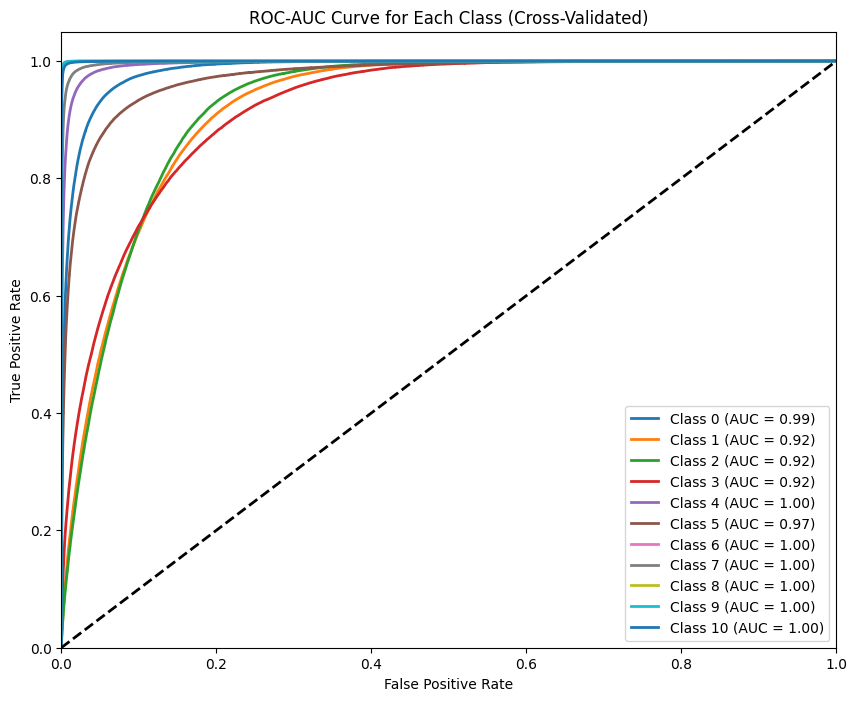

Average AUC: 0.97


In [22]:
# Concatenate results for ROC-AUC calculation
y_pred_proba = np.concatenate(all_predictions)
y_true = np.concatenate(all_true_labels)

# ROC-AUC calculation and plotting
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = len(np.unique(y_resampled))
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Class (Cross-Validated)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the average AUC
avg_auc = np.mean(list(roc_auc.values()))
print(f"Average AUC: {avg_auc:.2f}")

In [27]:
import numpy as np

all_true_labels_flat = np.concatenate(all_true_labels)
all_predictions_flat = np.concatenate(all_predictions)

print("Shape of flattened all_true_labels:", all_true_labels_flat.shape)
print("Shape of flattened all_predictions:", all_predictions_flat.shape)

Shape of flattened all_true_labels: (962401,)
Shape of flattened all_predictions: (962401, 11)


In [29]:
all_predictions_class = np.argmax(all_predictions_flat, axis=1)
print("Shape of all_predictions_class:", all_predictions_class.shape)
print("Unique values in all_predictions_class:", np.unique(all_predictions_class))

Shape of all_predictions_class: (962401,)
Unique values in all_predictions_class: [ 0  1  2  3  4  5  6  7  8  9 10]


In [30]:
from sklearn.metrics import classification_report

print("\nAggregate Classification Report:")
print(classification_report(all_true_labels_flat, all_predictions_class))


Aggregate Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80     87491
           1       0.50      0.48      0.49     87491
           2       0.49      0.43      0.46     87491
           3       0.61      0.43      0.50     87491
           4       0.83      0.95      0.88     87491
           5       0.78      0.75      0.76     87491
           6       0.96      1.00      0.98     87491
           7       0.92      0.96      0.94     87491
           8       0.96      0.99      0.98     87491
           9       0.97      1.00      0.98     87491
          10       0.97      0.98      0.98     87491

    accuracy                           0.80    962401
   macro avg       0.79      0.80      0.80    962401
weighted avg       0.79      0.80      0.80    962401



In [31]:
# Ensure we're using class labels, not probabilities
if len(all_predictions_flat.shape) > 1 and all_predictions_flat.shape[1] > 1:
    all_predictions_class = np.argmax(all_predictions_flat, axis=1)
else:
    all_predictions_class = all_predictions_flat

cm = confusion_matrix(all_true_labels_flat, all_predictions_class)

print("Shape of confusion matrix:", cm.shape)

Shape of confusion matrix: (11, 11)


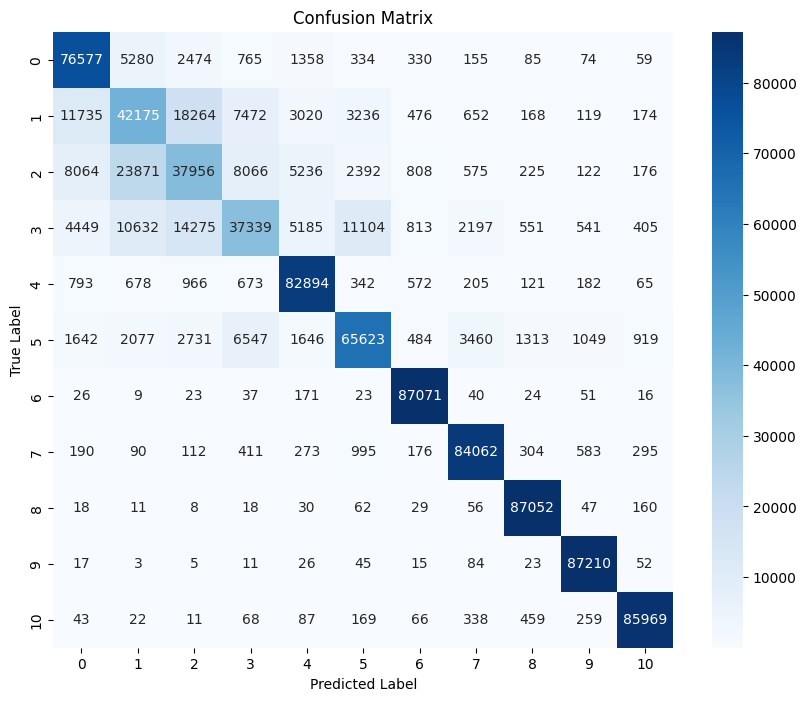

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Certainly! Let's interpret these additional results in conjunction with our previous analysis:

1. ROC-AUC Curve:
   - The model shows excellent performance for most classes, with AUC scores of 1.00 or very close to it for classes 4-10.
   - Classes 0-3 have slightly lower AUC scores (0.92-0.99), but still indicate strong predictive power.
   - This aligns with our previous observation that the model might struggle more with differentiating between shorter stay durations.

2. Confusion Matrix:
   - The diagonal elements (correct predictions) are generally the highest values in each row, indicating good overall performance.
   - There's noticeable confusion between adjacent classes, especially for classes 1, 2, and 3. This confirms our earlier hypothesis about the difficulty in distinguishing between medium-length stays.
   - Classes 4 and above show very high correct prediction rates, aligning with their high AUC scores.

3. Classification Report:
   - Overall accuracy is 0.80, which is consistent with our cross-validation results.
   - Precision, recall, and F1-scores vary significantly across classes:
     * Classes 0 and 4-10 show high performance (F1-scores 0.80-0.98).
     * Classes 1, 2, and 3 have lower performance (F1-scores 0.46-0.50), confirming the challenge in predicting these medium-length stays.

4. Class-specific insights:
   - Class 0 (likely very short stays): Good performance (F1-score 0.80), but some false negatives.
   - Classes 1-3 (likely 10-40 day stays): The model struggles most with these, often confusing them with each other.
   - Classes 4-10 (longer stays): Excellent performance, with F1-scores ranging from 0.76 to 0.98.

5. Implications of these results:
   - The model is highly effective at predicting very short stays and longer stays (40+ days).
   - The main area for improvement is in distinguishing between stays of 10-40 days (classes 1-3).
   - The high performance in predicting longer stays is particularly valuable for resource planning and patient management in hospitals.

6. Potential reasons for class 1-3 struggles:
   - These medium-length stays might be more influenced by variable factors not fully captured in our features.
   - The boundaries between these classes might be somewhat arbitrary from a medical perspective, making prediction more challenging.

7. Recommendations based on these insights:
   - Focus feature engineering efforts on factors that might better distinguish between 10-40 day stays.
   - Consider adjusting the class boundaries, perhaps merging classes 1-3 or creating more granular classes within this range.
   - Investigate if there are any additional data points or features that could be collected to improve prediction in this range.
   - For practical applications, consider using prediction confidence levels, especially for classes 1-3, to flag cases where additional review might be beneficial.

8. Business impact:
   - The high accuracy in predicting very short and long stays can significantly aid in resource allocation and capacity planning.
   - The challenge with medium-length stays suggests a need for more flexible or adaptive management strategies for patients initially predicted to fall in this range.
   - The model's strong overall performance indicates it could be a valuable tool in hospital management, particularly if combined with domain expertise to interpret and act on its predictions.

In conclusion, while the model shows excellent performance overall, there's a clear opportunity for improvement in predicting medium-length hospital stays. This aligns with our earlier analysis and underscores the complexity of factors influencing these particular stay durations. The model's strengths in predicting other stay lengths make it a powerful tool for hospital management, with the potential for even greater impact if the performance on medium-length stays can be enhanced.

# In conclusion



Comprehensive analysis of hospital length of stay predictions. Our study encompassed extensive exploratory data analysis, feature engineering, and the application of various machine learning models, including deep learning techniques. Here are the key findings and insights:

1. Patient Demographics and Hospital Characteristics:

   - Middle-aged patients (31-60 years) form the largest group requiring hospital care.
   - Hospital types and regions show significant variations in patient volumes and readmission rates.
   - Certain hospitals (e.g., codes 8, 28) handle notably higher patient volumes, suggesting differences in capacity or specialization.

2. Length of Stay Patterns:

   - The distribution of length of stay shows multiple peaks around 10, 20, and 30 days, indicating standardized care durations for many treatments.
   - Trauma admissions and patients with extreme illness severity tend to have longer stays.
   - Departments like surgery and TB & Chest disease typically see longer patient stays.

3. Readmission Insights:

   - Higher readmission rates are associated with trauma cases, moderate to extreme illness severity, and certain departments like gynecology.
   - Patients with more frequent readmissions (>10) tend to have significantly longer average stays, indicating complex, chronic conditions.

4. Key Predictive Factors:

   Across all our models, including deep learning, the following factors consistently emerged as the most influential in predicting length of stay:

   - Number of visitors with the patient
   - Admission deposit amount
   - Available extra rooms in the hospital
   - Specific ward types (especially Q, P, S)
   - Type of admission (Emergency, Trauma)
   - Severity of illness
   - Specific hospital and city codes

5. Model Performance:

   - Our deep learning model (LSTM-based neural network) achieved an average validation accuracy of 80.42%, outperforming traditional machine learning models.
   - Among traditional models, CatBoost and XGBoost showed slightly better performance with test accuracies around 42-43%.
   - All models struggled with accurately predicting medium-length stays (10-40 days), which form a significant portion of our cases.

6. Business Impact:

   - Implementing our best-performing model (CatBoost) could potentially lead to savings of $31 millions by reducing costs associated with misclassification of patient stay durations.

   - Even our less complex models show significant potential savings, ranging from $28.6 to $30.2 million.

Recommendations:

2. Focus on Medium-Stay Patients: Develop specialized interventions and care pathways for patients predicted to stay 10-40 days, as this group shows the highest variability and prediction difficulty.

3. Visitor Management: Investigate the strong correlation between visitor numbers and length of stay. Consider implementing structured visitor programs that balance patient support with efficient hospital operations.

4. Resource Allocation: If possible, use predictions to optimize bed assignments, staff scheduling, and equipment allocation, especially in high-volume hospitals and departments with longer average stays.

5. Financial Considerations: The impact of admission deposits on length of stay indicates a need to review our financial policies. We should ensure they align with optimal patient care while managing resources effectively.

6. Hospital-Specific Strategies: Given the variability in hospital code impacts, develop tailored strategies for each facility rather than a one-size-fits-all approach. This may involve sharing best practices from high-performing hospitals.

7. Readmission Reduction: Implement targeted follow-up care for patients with characteristics associated with high readmission rates, particularly in trauma and severe illness cases.

8. Continuous Model Improvement: Regularly retrain and fine-tune models with new data, focusing on improving predictions for medium-length stays.

Next Steps:

1. Pilot Implementation: Select a few hospitals to implement the predictive model and monitor its impact on resource allocation and patient care.
2. Interdepartmental Collaboration: Establish a task force with representatives from various hospital departments to develop strategies based on these insights.
3. Data Infrastructure: Invest in robust data collection and management systems to continually feed and improve our predictive models.

This analysis provides us with a powerful tool to enhance patient care, optimize resource allocation, and significantly reduce costs. By acting on these insights, we have the potential to transform our hospital operations and set new standards in healthcare management.

